In [263]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline
#Import Libraries
from scipy.stats import f
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings("ignore")
import statsmodels.api as sm
import statistics
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)

### Problem-1. Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

[Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]


### Problem-1 -A 

In [264]:
df_Salary = pd.read_csv('SalaryData.csv')

In [265]:
df_Salary.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [266]:
df_Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [267]:
df_Salary.describe()

Salary
count     40.00
mean  162186.88
std    64860.41
min    50103.00
25%    99897.50
50%   169100.00
75%   214440.75
max   260151.00

In [268]:
df_Salary['Education'] = pd.Categorical(df_Salary['Education'])
df_Salary['Occupation'] = pd.Categorical(df_Salary['Occupation'])


In [269]:
df_Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 824.0 bytes


###              1.1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

###               Hypothesis for conducting one-way ANOVA for Education Level as a Factor

#### Null hypothesis  H0 :  The mean Salary received is same across different Education levels i.e. Doctorate, Bachelors and HS-grad
#### Alternate hypothesis Ha : The mean Salary received is different in at-least one category of Education than others where Education category as  provided in data set are ' Doctorate', ' Bachelors'  and ' HS-grad'

###               Hypothesis for conducting one-way ANOVA for Occupation Level as a Factor

#### Null hypothesis  H0 :  The mean Salary received is same across different Occupation levels ' Adm-clerical', ' Sales', ' Prof-specialty' and ' Exec-managerial'
#### Alternate hypothesis Ha : The mean Salary received is different in at-least one category of Occupation levels  which are ' Adm-clerical', ' Sales', ' Prof-specialty' and ' Exec-managerial'

###              1.2  Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [270]:
formula = 'Salary ~ Education'
model =  ols(formula,df_Salary).fit()
aov_table = anova_lm(model)
print(aov_table)

             df          sum_sq        mean_sq     F  PR(>F)
Education  2.00 102695466735.89 51347733367.94 30.96    0.00
Residual  37.00  61372559274.49  1658717818.23   nan     nan


In [271]:
import scipy.stats as stats
stats.f.ppf(q=.95,dfn=2, dfd=37) #F-critical

3.251923846387207

#### Since the p-value (0.00 ) is less than the level of significance(0.05), we reject the null hypothesis and conclude 
#### that there is a difference in the mean salary received by the education levels by atleast one level of Education. 
#### Mean Salary paid to Education levels ' Doctorate', ' Bachelors' and ' HS-grad' varies.
#### The decision is again supported by the F Value  of (30.96) which is fairly high as well the F-Critical Value of 3.251923846387207



###              1.3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [272]:
formula = 'Salary ~ Occupation'
model = ols(formula,df_Salary).fit()
aov_table = anova_lm(model)
print(aov_table)

              df          sum_sq       mean_sq    F  PR(>F)
Occupation  3.00  11258782926.47 3752927642.16 0.88    0.46
Residual   36.00 152809243083.91 4244701196.78  nan     nan


In [273]:
import scipy.stats as stats
stats.f.ppf(q=.95,dfn=3, dfd=36) #F-critical

2.86626555094018

#### Since the p-value (0.46 ) is Greater than the level of significance(0.05), we fail to reject the null hypothesis and conclude 
#### that there is no a difference in the mean salary received by any one of the Occupations. 
#### Mean Salary paid to Occupations ' Adm-clerical', ' Sales', ' Prof-specialty' and ' Exec-managerial' remains same.
#### The decision is again supported by the F Value  of (0.88) which is fairly low as well the F-Critical Value of 2.86626555094018

###             1.4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

#### We Performed a one-way ANOVA on Salary with respect to Education(Question 1.2). The null hypothesis is REJECTED based on the ANOVA results. Data shows that the mean salary to " HS-GRAD"  differs significantly



### Problem-1 -B

#### 1.5. The Student News Service at Clear Mountain State University (CMSU) has decided to gather What is the interaction between two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

[hint: use the ‘pointplot’ function from the ‘seaborn’ function]


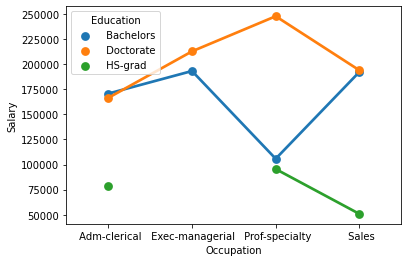

In [274]:
sns.pointplot(x='Occupation', y='Salary', data=df_Salary, hue='Education',ci=None);

In [275]:
formula = 'Salary ~  C(Education):C(Occupation)'
model = ols(formula, df_Salary).fit()
aov_table = anova_lm(model)
(aov_table)

df          sum_sq        mean_sq     F  PR(>F)
C(Education):C(Occupation) 11.00 143801936828.37 13072903348.03 18.38    0.00
Residual                   29.00  20621020503.03   711069672.52   nan     nan

### Point chart as well as P=Value of variance analysis shows a really high degree of interaction between Education and Occupation impacting the Salary. 
### 'HS-Grad' at every occupation earn less than 'Doctorate' or 'Bachelors'.
### 'Doctorate' at every occupation earn More than 'HS-Grad' or 'Bachelors'.
### 'Bachelors' at every occupation earn More than 'HS-Grad'.
### There is no evidence that The Salaries are independent of combination of 'Education' and 'Occupation'.

### 1.6. Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?


###               Hypothesis for conducting Two-way ANOVA for Education Level as a Factor / Treatment

   #### Null hypothesis  H0 :  The mean Salary received is same across different Education levels i.e. Doctorate, Bachelors and HS-grad
   #### Alternate hypothesis Ha : The mean Salary received is different in at-least one category of Education than others where Education category as  provided in data set are ' Doctorate', ' Bachelors'  and ' HS-grad'
    

###               Hypothesis for conducting Two-way ANOVA for Occupation Level as a Factor / Treatment

   #### Null hypothesis  H0 :  The mean Salary received is same across different Occupation levels ' Adm-clerical', ' Sales', ' Prof-specialty' and ' Exec-managerial'
   #### Alternate hypothesis Ha : The mean Salary received is different in at-least one category of Occupation levels  which are ' Adm-clerical', ' Sales', ' Prof-specialty' and ' Exec-managerial'
   
   
 ###               Hypothesis for conducting Two-way ANOVA for Interaction between  Factors Education and Occupation to understand impact on Salary

   #### Null hypothesis  H0 :  There is no impact of Interaction between factors Education and Occupation on Salary
   #### Alternate hypothesis Ha : There is  impact of Interaction between factors Education and Occupation on Salary


In [276]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df_Salary).fit()
aov_table = anova_lm(model)
(aov_table)

df          sum_sq        mean_sq     F  PR(>F)
C(Education)                2.00 102695466735.89 51347733367.94 72.21    0.00
C(Occupation)               3.00   5519946053.36  1839982017.79  2.59    0.07
C(Education):C(Occupation)  6.00  36349090964.89  6058181827.48  8.52    0.00
Residual                   29.00  20621020503.03   711069672.52   nan     nan

### A 2-Way ANOVA was run on a sample of 40 individuals to examine the effect of Education and Occupation on Salary.  There was a significant interaction as the P-Value of 0.00 < 0.05 between the effects of Education and Occupation on Salary. Simple main effects analysis showed that Occupation has no significant effect on Salary as the P-Value of 0.07 > 0.05 , but the treatment level(Education) has significant effect on Salary as the P-Value of 0.00 < 0.05

### 1.7. Explain the business implications of performing ANOVA for this particular case study.

one way anova is used to determine if there is any statistically significant  
differences between means of two or more independent (Unrelated) groups. Ideally minumum 3.
In current situation for Education levels when we perfomed this analysis it revealed that that there 
is difference in the mean of Salary received by Education levels 'Doctorate', 'Bachelors' and 'HS-grad'.
This outcome of test is logically correct as it is expected that Salaries will vary for staff with varied Education levels.

one way anova is used to determine if there is any statistically significant  
differences between means of two or more independent (Unrelated) groups. Ideally minumum 3.
In current situation for Occupation levels when we perfomed this analysis it revealed that that there 
is No difference in the mean of Salary received by Occupation levels 'Adm-clerical', 'Exec-managerial','Prof-specialty' and 'Sales'.
This outcome of test is logically correct as it is expected that Salaries Spend will be similarfor staff employeed with different Departments.
IN order to strengthen each of the department Equally.


Two Way is extension of One way ANOVA that examines the influence of two different categorical independent variables on
one continous dependent variable.
A 2-Way ANOVA was run on a sample of 40 individuals to examine the effect of Education and Occupation on Salary.  
1) Simple main effects analysis showed that Occupation has no significant effect on Salary as the P-Value 
of 0.07 > 0.05; which is logically correct as Each occupation has staff with varied Education background and they are paid
differently summing up to similar payout per occupation.

2) There was a significant interaction as the P-Value of 0.00 < 0.05 between the effects of Education and Occupation 
on Salary. This is logically correct since the Education levels within same occupation are paid differently.

3) Treatment level(Education) has significant effect on Salary as the P-Value of 0.00 < 0.05.
This is logically correct since the Education levels within same occupation are expected to be paid differently.

### Problem-2. The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [277]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.19.2
1.1.3
0.11.0


In [278]:
Edu = pd.read_csv('Education - Post 12th Standard.csv')

In [279]:
Edu.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78      18.10           12    7041         60  
1        30      12.20           16   10527         56  
2        66      12.90           30    8735         54  
3        97       7.70           37   19016         59  
4        72      11.90            2   10922         15

In [280]:
Edu.tail()

Names   Apps  Accept  Enroll  Top10perc  \
772         Worcester State College   2197    1515     543          4   
773               Xavier University   1959    1805     695         24   
774  Xavier University of Louisiana   2097    1915     695         34   
775                 Yale University  10705    2453    1317         95   
776    York College of Pennsylvania   2989    1855     691         28   

     Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  \
772         26         3089         2029      6797        3900    500   
773         47         2849         1107     11520        4960    600   
774         61         2793          166      6900        4200    617   
775         99         5217           83     19840        6510    630   
776         63         2988         1726      4990        3560    500   

     Personal  PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
772      1200   60        60      21.00           14    4469         40  
773      1250   73        75      13.30           31    9189         83  
774       781   67        75      14.40           20    8323         49  
775      2115   96        96       5.80           49   40386         99  
776      1250   75        75      18.10           28    4509         99

In [281]:
print("no. of rows: ",Edu.shape[0], "\n""no. of columns: ",Edu.shape[1])

no. of rows:  777 
no. of columns:  18


## Data Dictionary View

1)      Names: Names of various university and colleges
2)      Apps: Number of applications received
3)      Accept: Number of applications accepted
4)      Enroll: Number of new students enrolled
5)      Top10perc: Percentage of new students from top 10% of Higher Secondary class
6)      Top25perc: Percentage of new students from top 25% of Higher Secondary class
7)      F.Undergrad: Number of full-time undergraduate students
8)      P.Undergrad: Number of part-time undergraduate students
9)      Outstate: Number of students for whom the particular college or university is Out-of-state tuition
10)   Room.Board: Cost of Room and board
11)   Books: Estimated book costs for a student
12)   Personal: Estimated personal spending for a student
13)   PhD: Percentage of faculties with Ph.D.’s
14)   Terminal: Percentage of faculties with terminal degree
15)   S.F.Ratio: Student/faculty ratio
16)   perc.alumni: Percentage of alumni who donate
17)   Expend: The Instructional expenditure per student
18)   Grad.Rate: Graduation rate

#### 2.1.Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

### Data Pre-processing

### Treat BAD Data

In [282]:
Edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

####                 Data types are in line with the supporting data dictionary, Presense of no Bad Data is noticed

### Treat Anomalies

####                 There are apparently no noticable Anamolies, with the definition of Existing Business rules that are available

### Treat Missing Values

In [283]:
Edu.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

####                 There are no Missing values in the supplied DataSet

### Checking for Duplicates

In [284]:
# Are there any duplicates
dups = Edu.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


####                 There are no Missing values in the supplied DataSet

### Data Visualization

#### Univariate Analysis

In [285]:
Edu_univariant=Edu.describe().T
Edu_univariant_detailed=Edu_univariant
Edu_univariant_detailed['CV']=Edu_univariant_detailed['std']/Edu_univariant_detailed['mean']
Edu_univariant_detailed['Q1 - Min']= Edu_univariant_detailed['25%'] -Edu_univariant_detailed['min']
Edu_univariant_detailed['Max - 75%']= Edu_univariant_detailed['max'] -Edu_univariant_detailed['75%']
Edu_univariant_detailed['Q2 - Min']= Edu_univariant_detailed['50%'] -Edu_univariant_detailed['min']
Edu_univariant_detailed['Max - 50%']= Edu_univariant_detailed['max'] -Edu_univariant_detailed['50%']
Edu_univariant_detailed['Q2 - Q1']= Edu_univariant_detailed['50%'] -Edu_univariant_detailed['25%']
Edu_univariant_detailed['Q3 - Q2']= Edu_univariant_detailed['75%'] -Edu_univariant_detailed['50%']
Edu_univariant_detailed

count     mean     std     min     25%     50%      75%      max  \
Apps        777.00  3001.64 3870.20   81.00  776.00 1558.00  3624.00 48094.00   
Accept      777.00  2018.80 2451.11   72.00  604.00 1110.00  2424.00 26330.00   
Enroll      777.00   779.97  929.18   35.00  242.00  434.00   902.00  6392.00   
Top10perc   777.00    27.56   17.64    1.00   15.00   23.00    35.00    96.00   
Top25perc   777.00    55.80   19.80    9.00   41.00   54.00    69.00   100.00   
F.Undergrad 777.00  3699.91 4850.42  139.00  992.00 1707.00  4005.00 31643.00   
P.Undergrad 777.00   855.30 1522.43    1.00   95.00  353.00   967.00 21836.00   
Outstate    777.00 10440.67 4023.02 2340.00 7320.00 9990.00 12925.00 21700.00   
Room.Board  777.00  4357.53 1096.70 1780.00 3597.00 4200.00  5050.00  8124.00   
Books       777.00   549.38  165.11   96.00  470.00  500.00   600.00  2340.00   
Personal    777.00  1340.64  677.07  250.00  850.00 1200.00  1700.00  6800.00   
PhD         777.00    72.66   16.33    8.00   62.00   75.00    85.00   103.00   
Terminal    777.00    79.70   14.72   24.00   71.00   82.00    92.00   100.00   
S.F.Ratio   777.00    14.09    3.96    2.50   11.50   13.60    16.50    39.80   
perc.alumni 777.00    22.74   12.39    0.00   13.00   21.00    31.00    64.00   
Expend      777.00  9660.17 5221.77 3186.00 6751.00 8377.00 10830.00 56233.00   
Grad.Rate   777.00    65.46   17.18   10.00   53.00   65.00    78.00   118.00   

              CV  Q1 - Min  Max - 75%  Q2 - Min  Max - 50%  Q2 - Q1  Q3 - Q2  
Apps        1.29    695.00   44470.00   1477.00   46536.00   782.00  2066.00  
Accept      1.21    532.00   23906.00   1038.00   25220.00   506.00  1314.00  
Enroll      1.19    207.00    5490.00    399.00    5958.00   192.00   468.00  
Top10perc   0.64     14.00      61.00     22.00      73.00     8.00    12.00  
Top25perc   0.35     32.00      31.00     45.00      46.00    13.00    15.00  
F.Undergrad 1.31    853.00   27638.00   1568.00   29936.00   715.00  2298.00  
P.Undergrad 1.78     94.00   20869.00    352.00   21483.00   258.00   614.00  
Outstate    0.39   4980.00    8775.00   7650.00   11710.00  2670.00  2935.00  
Room.Board  0.25   1817.00    3074.00   2420.00    3924.00   603.00   850.00  
Books       0.30    374.00    1740.00    404.00    1840.00    30.00   100.00  
Personal    0.51    600.00    5100.00    950.00    5600.00   350.00   500.00  
PhD         0.22     54.00      18.00     67.00      28.00    13.00    10.00  
Terminal    0.18     47.00       8.00     58.00      18.00    11.00    10.00  
S.F.Ratio   0.28      9.00      23.30     11.10      26.20     2.10     2.90  
perc.alumni 0.54     13.00      33.00     21.00      43.00     8.00    10.00  
Expend      0.54   3565.00   45403.00   5191.00   47856.00  1626.00  2453.00  
Grad.Rate   0.26     43.00      40.00     55.00      53.00    12.00    13.00

## Edu['Apps']   5 Number Analysis

In [286]:
Edu_univariant_detailed.loc['Apps']

count         777.00
mean         3001.64
std          3870.20
min            81.00
25%           776.00
50%          1558.00
75%          3624.00
max         48094.00
CV              1.29
Q1 - Min      695.00
Max - 75%   44470.00
Q2 - Min     1477.00
Max - 50%   46536.00
Q2 - Q1       782.00
Q3 - Q2      2066.00
Name: Apps, dtype: float64

### Edu['Apps'] review of 5 number Summary Suggests that -

  ##### Disribution is  Right skewed  -
        (Q1 - Min) which is 695.00  <  Max - Q3 which is 44470.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 1477.00 <  (Max - Q2) which is 46536.00
        (Q2 - Q1 ) which is 782.00 < (Q3 - Q2 ) which is 2066.00
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='Apps', ylabel='Density'>

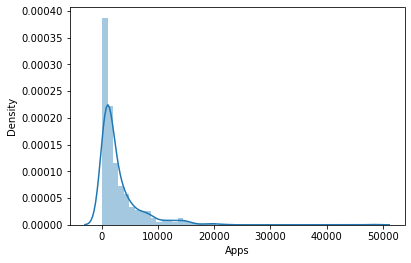

In [287]:
sns.distplot(Edu['Apps'])

### Histogram Review for Edu['Apps'] Shows -
#### 1) 1 Peaks
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

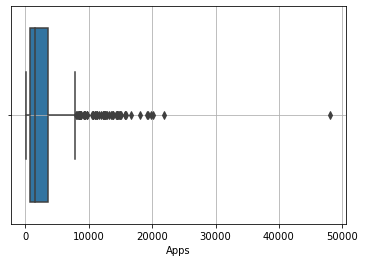

In [288]:
sns.boxplot(x=Edu['Apps']) 
plt.grid()

### Edu['Apps'] review of Boxplot Suggests that -

#### 1) There are Many outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Edu['Apps']  Empirical Rule

In [289]:
x_1std= Edu['Apps'].mean() + (1 * Edu['Apps'].std())
y_1std= Edu['Apps'].mean() - (1 * Edu['Apps'].std())
x_2std= Edu['Apps'].mean() + (2 * Edu['Apps'].std())
y_2std= Edu['Apps'].mean() - (2 * Edu['Apps'].std())
x_3std= Edu['Apps'].mean() + (3 * Edu['Apps'].std())
y_3std= Edu['Apps'].mean() - (3 * Edu['Apps'].std())

Sample_size=len(Edu['Apps'])

is_between11 = Edu['Apps'].between(Edu['Apps'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['Apps'].between(y_1std,Edu['Apps'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['Apps'].between(Edu['Apps'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['Apps'].between(y_2std,Edu['Apps'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['Apps'].between(Edu['Apps'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['Apps'].between(y_3std,Edu['Apps'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  264.18 where as they are  137
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  547
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  189
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  547
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  215
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  547


### Edu['Apps'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Edu['Apps'] mean,median and mode

In [290]:
a=Edu['Apps'].mean()
b=Edu['Apps'].median()
c=Edu['Apps'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 3001.6383526383524 Median = 1558.0 Mode = 703.0


### Edu['Apps'] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Number of applications received range from 81 to 48094

75% of the institutes have received less than 3624 applications.

From above figure, we can say that the Applications received across institutes is right skewed

Average Number of applications received is 3001.64 which is much higher than the median value 1558.00 indicating that the ditribution is right tailed. 

There are Outliers towards higher side which indicates there are few institutes that have received outstandig response in terms of number of applications.

## Edu['Accept']   5 Number Analysis

In [291]:
Edu_univariant_detailed.loc['Accept']

count         777.00
mean         2018.80
std          2451.11
min            72.00
25%           604.00
50%          1110.00
75%          2424.00
max         26330.00
CV              1.21
Q1 - Min      532.00
Max - 75%   23906.00
Q2 - Min     1038.00
Max - 50%   25220.00
Q2 - Q1       506.00
Q3 - Q2      1314.00
Name: Accept, dtype: float64

### Edu['Accept'] review of 5 number Summary Suggests that -

  ##### Disribution is  Right skewed  -
        (Q1 - Min) which is 532.000  <  Max - Q3 which is 23906.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 1038.00 <  (Max - Q2) which is 25220.00
        (Q2 - Q1 ) which is  506.00 < (Q3 - Q2 ) which is  1314.00
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='Accept', ylabel='Density'>

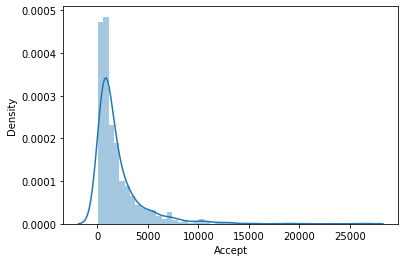

In [292]:
sns.distplot(Edu['Accept'])

### Histogram Review for Edu['Accept'] Shows -
#### 1) 1 Peak
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

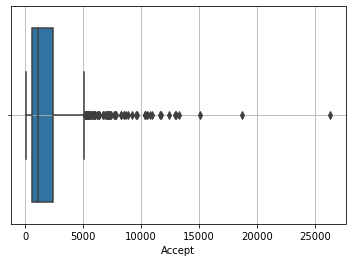

In [293]:
sns.boxplot(x=Edu['Accept']) 
plt.grid()

### Edu['Accept'] review of Boxplot Suggests that -

#### 1) There are Many outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Edu['Accept']  Empirical Rule

In [294]:
x_1std= Edu['Accept'].mean() + (1 * Edu['Accept'].std())
y_1std= Edu['Accept'].mean() - (1 * Edu['Accept'].std())
x_2std= Edu['Accept'].mean() + (2 * Edu['Accept'].std())
y_2std= Edu['Accept'].mean() - (2 * Edu['Accept'].std())
x_3std= Edu['Accept'].mean() + (3 * Edu['Accept'].std())
y_3std= Edu['Accept'].mean() - (3 * Edu['Accept'].std())

Sample_size=len(Edu['Accept'])

is_between11 = Edu['Accept'].between(Edu['Accept'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['Accept'].between(y_1std,Edu['Accept'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['Accept'].between(Edu['Accept'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['Accept'].between(y_2std,Edu['Accept'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['Accept'].between(Edu['Accept'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['Accept'].between(y_3std,Edu['Accept'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  264.18 where as they are  143
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  544
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  193
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  544
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  215
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  544


### Edu['Accept'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Edu['Accept']mean,median and mode

In [295]:
a=Edu['Accept'].mean()
b=Edu['Accept'].median()
c=Edu['Accept'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 2018.8043758043757 Median = 1110.0 Mode = 452.0


### Edu[ 'Accept' ] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Number of applications Accepted range from 72 to 26330

75% of the institutes have Accepted less than 2424 applications.

From above figure, we can say that the Applications Accepted across institutes is right skewed

Average Number of applications Accepted is 2018.80 which is much higher than the median value 1110.00 indicating that the ditribution is right tailed. 

There are Outliers towards higher side which indicates there are few institutes that have accepted more applications and have more capacity.

## Edu['Enroll']   5 Number Analysis

In [296]:
Edu_univariant_detailed.loc['Enroll']

count        777.00
mean         779.97
std          929.18
min           35.00
25%          242.00
50%          434.00
75%          902.00
max         6392.00
CV             1.19
Q1 - Min     207.00
Max - 75%   5490.00
Q2 - Min     399.00
Max - 50%   5958.00
Q2 - Q1      192.00
Q3 - Q2      468.00
Name: Enroll, dtype: float64

### Edu['Enroll'] review of 5 number Summary Suggests that -

  ##### Disribution is  Right skewed  -
        (Q1 - Min) which is 207.00  <  Max - Q3 which is  5490.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 399.00 <  (Max - Q2) which is 5958.00
        (Q2 - Q1 ) which is  192.00 < (Q3 - Q2 ) which is  468.00
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='Enroll', ylabel='Density'>

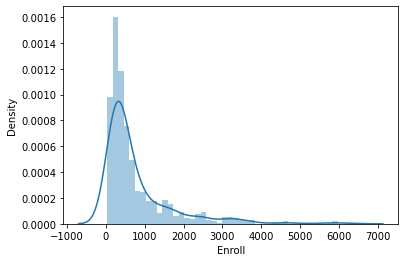

In [297]:
sns.distplot(Edu['Enroll'])

### Histogram Review for Edu['Enroll'] Shows -
#### 1) 1 Peak
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

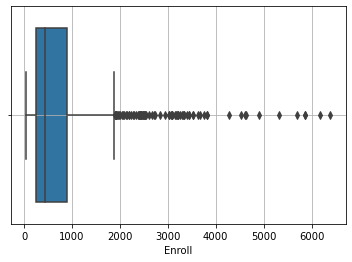

In [298]:
sns.boxplot(x=Edu['Enroll']) 
plt.grid()

### Edu['Enroll'] review of Boxplot Suggests that -

#### 1) There are Many outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Edu['Enroll']  Empirical Rule

In [299]:
x_1std= Edu['Enroll'].mean() + (1 * Edu['Enroll'].std())
y_1std= Edu['Enroll'].mean() - (1 * Edu['Enroll'].std())
x_2std= Edu['Enroll'].mean() + (2 * Edu['Enroll'].std())
y_2std= Edu['Enroll'].mean() - (2 * Edu['Enroll'].std())
x_3std= Edu['Enroll'].mean() + (3 * Edu['Enroll'].std())
y_3std= Edu['Enroll'].mean() - (3 * Edu['Enroll'].std())

Sample_size=len(Edu['Enroll'])

is_between11 = Edu['Enroll'].between(Edu['Enroll'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['Enroll'].between(y_1std,Edu['Enroll'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['Enroll'].between(Edu['Enroll'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['Enroll'].between(y_2std,Edu['Enroll'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['Enroll'].between(Edu['Enroll'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['Enroll'].between(y_3std,Edu['Enroll'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  264.18 where as they are  128
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  559
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  176
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  559
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  202
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  559


### Edu['Enroll'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Edu['Enroll']mean,median and mode

In [300]:
a=Edu['Enroll'].mean()
b=Edu['Enroll'].median()
c=Edu['Enroll'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 779.972972972973 Median = 434.0 Mode = 236.0


### Edu[ 'Enroll' ] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Number of students enrolled range from 35.00 to 6392.00 which is much less than accepted. THis means the institutes will still have capacity.

75% of the institutes have  less than 902  Enrollments.

From above figure, we can say that the Enrollments across institutes is right skewed whic means there are More institutes with lower number of Enrollments

Average Number of  Enrollments is 779.97 which is much higher than the median value 434.00 indicating that the ditribution is right tailed. 

There are Outliers towards higher side which indicates there are few institutes that have Enrolled more applications and have more capacity.

## Edu['Top10perc']   5 Number Analysis

In [301]:
Edu_univariant_detailed.loc['Top10perc']

count       777.00
mean         27.56
std          17.64
min           1.00
25%          15.00
50%          23.00
75%          35.00
max          96.00
CV            0.64
Q1 - Min     14.00
Max - 75%    61.00
Q2 - Min     22.00
Max - 50%    73.00
Q2 - Q1       8.00
Q3 - Q2      12.00
Name: Top10perc, dtype: float64

### Edu['Top10perc] review of 5 number Summary Suggests that -

  ##### Disribution is  Right skewed  -
        (Q1 - Min) which is 14.00  <  Max - Q3 which is  61.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 8.00 <  (Max - Q2) which is 73.00
        (Q2 - Q1 ) which is  192.00 < (Q3 - Q2 ) which is  12.00
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='Top10perc', ylabel='Density'>

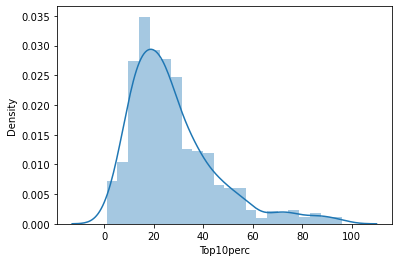

In [302]:
sns.distplot(Edu['Top10perc'])

### Histogram Review for Edu['Top10perc'] Shows -
#### 1) 1 Peak
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

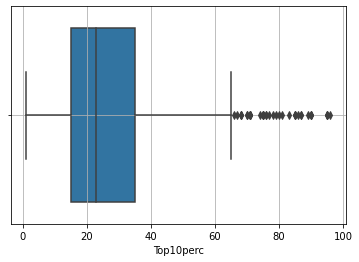

In [303]:
sns.boxplot(x=Edu['Top10perc']) 
plt.grid()

### Edu['Top10perc'] review of Boxplot Suggests that -

#### 1) There are Many outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Edu['Top10perc']  Empirical Rule

In [304]:
x_1std= Edu['Top10perc'].mean() + (1 * Edu['Top10perc'].std())
y_1std= Edu['Top10perc'].mean() - (1 * Edu['Top10perc'].std())
x_2std= Edu['Top10perc'].mean() + (2 * Edu['Top10perc'].std())
y_2std= Edu['Top10perc'].mean() - (2 * Edu['Top10perc'].std())
x_3std= Edu['Top10perc'].mean() + (3 * Edu['Top10perc'].std())
y_3std= Edu['Top10perc'].mean() - (3 * Edu['Top10perc'].std())

Sample_size=len(Edu['Top10perc'])

is_between11 = Edu['Top10perc'].between(Edu['Top10perc'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['Top10perc'].between(y_1std,Edu['Top10perc'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['Top10perc'].between(Edu['Top10perc'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['Top10perc'].between(y_2std,Edu['Top10perc'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['Top10perc'].between(Edu['Top10perc'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['Top10perc'].between(y_3std,Edu['Top10perc'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  264.18 where as they are  194
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  417
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  261
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  476
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  285
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  476


### Edu['Top10perc'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Edu['Top10perc']mean,median and mode

In [305]:
a=Edu['Top10perc'].mean()
b=Edu['Top10perc'].median()
c=Edu['Top10perc'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 27.55855855855856 Median = 23.0 Mode = 20.0


### Edu[ 'Top10perc' ] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Number of Percentage of new students from top 10% of Higher Secondary class,  range from 1.00 to 96.00 

75% of the institutes have  less than 35  new students from top 10% of Higher Secondary class.

From above figure, we can say that the new students from top 10% of Higher Secondary class across institutes is right skewed whic means there are More institutes with lower number of new students from top 10% of Higher Secondary class

Average Number of new students from top 10% of Higher Secondary class is 27.56 which is higher than the median value 23.00 indicating that the ditribution is right tailed. 

There are Outliers towards higher side which indicates there are few institutes that have Enrolled new students from top 10% of Higher Secondary class.

## Edu['Top25perc']   5 Number Analysis

In [306]:
Edu_univariant_detailed.loc['Top25perc']

count       777.00
mean         55.80
std          19.80
min           9.00
25%          41.00
50%          54.00
75%          69.00
max         100.00
CV            0.35
Q1 - Min     32.00
Max - 75%    31.00
Q2 - Min     45.00
Max - 50%    46.00
Q2 - Q1      13.00
Q3 - Q2      15.00
Name: Top25perc, dtype: float64

### Edu['Top25perc] review of 5 number Summary Suggests that -


  ##### Disribution is  Almost Normal  -
  
        (Q1 - Min) which is 32.00  approximately equal to  Max - Q3 which is  31.00
        
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 45.00 approximately equal to    (Max - Q2) which is 46.00
        (Q2 - Q1 ) which is  13.00 approximately equal to  (Q3 - Q2 ) which is  15.00
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='Top25perc', ylabel='Density'>

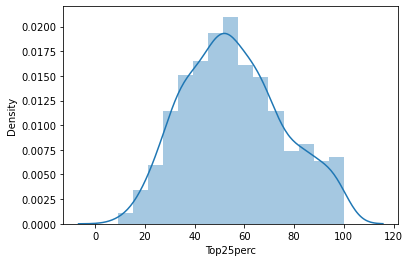

In [307]:
sns.distplot(Edu['Top25perc'])

##### Histogram Review for Edu['Top25perc'] Shows -
#### 1) 1 Peak
#### 2) Approximate Normal Distribution
#### 3) It Shows a close to perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

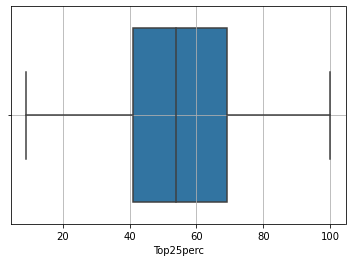

In [308]:
sns.boxplot(x=Edu['Top25perc']) 
plt.grid()

## Edu['Top25perc'] review of Boxplot Suggests that -

#### 1) There are No outliers
#### 2) Distribution is Approximate Normal

## Edu['Top25perc']  Empirical Rule

In [309]:
x_1std= Edu['Top25perc'].mean() + (1 * Edu['Top25perc'].std())
y_1std= Edu['Top25perc'].mean() - (1 * Edu['Top25perc'].std())
x_2std= Edu['Top25perc'].mean() + (2 * Edu['Top25perc'].std())
y_2std= Edu['Top25perc'].mean() - (2 * Edu['Top25perc'].std())
x_3std= Edu['Top25perc'].mean() + (3 * Edu['Top25perc'].std())
y_3std= Edu['Top25perc'].mean() - (3 * Edu['Top25perc'].std())

Sample_size=len(Edu['Top25perc'])

is_between11 = Edu['Top25perc'].between(Edu['Top25perc'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['Top25perc'].between(y_1std,Edu['Top25perc'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['Top25perc'].between(Edu['Top25perc'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['Top25perc'].between(y_2std,Edu['Top25perc'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['Top25perc'].between(Edu['Top25perc'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['Top25perc'].between(y_3std,Edu['Top25perc'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  264.18 where as they are  230
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  285
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  342
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  406
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  365
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  412


## Edu['Top25perc'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is almost symetrical
#### 1) '2 standard deviation' from Mean is almost symetrical
#### 1) '3 standard deviation' from Mean is almost symetrical

##  Edu['Top25perc']mean,median and mode

In [310]:
a=Edu['Top25perc'].mean()
b=Edu['Top25perc'].median()
c=Edu['Top25perc'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 55.7966537966538 Median = 54.0 Mode = 57.5


## Edu[ 'Top25perc' ] review of Mean, Median and Mode suggests that -

#### In this case Mean = Median = Mode hence the distribution is Approximate Normal

#### Insights:

Number of Percentage of new students from top 25% of Higher Secondary class,  range from 9.00 to 100.00 

75% of the institutes have  less than 69  new students from top 25% of Higher Secondary class.

From above figure, we can say that the new students from top 25% of Higher Secondary class across institutes are spread normally across the listed university.
o
Average Number of new students from top 25% of Higher Secondary class is 55.80 which is approximately equal to median value 54.00 indicating that the ditribution is approximately normal. 

There are no Outliers  which indicates there are no institutes that have Enrolled higher / lower number of students from top 25% of Higher Secondary class.

## Edu['F.Undergrad']   5 Number Analysis

In [311]:
Edu_univariant_detailed.loc['F.Undergrad']

count         777.00
mean         3699.91
std          4850.42
min           139.00
25%           992.00
50%          1707.00
75%          4005.00
max         31643.00
CV              1.31
Q1 - Min      853.00
Max - 75%   27638.00
Q2 - Min     1568.00
Max - 50%   29936.00
Q2 - Q1       715.00
Q3 - Q2      2298.00
Name: F.Undergrad, dtype: float64

### Edu['F.Undergrad] review of 5 number Summary Suggests that -

  ##### Disribution is  Right  skewed  -
        (Q1 - Min) which is 853.00 < Max - Q3 which is  27638.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 1568.00 <  (Max - Q2) which is 29936.00
        (Q2 - Q1 ) which is  715.00 < (Q3 - Q2 ) which is 2298.00
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='F.Undergrad', ylabel='Density'>

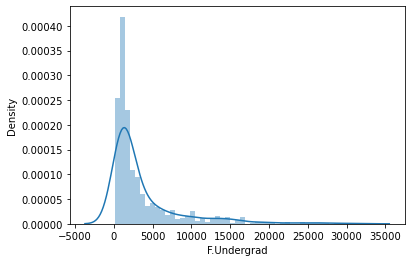

In [312]:
sns.distplot(Edu['F.Undergrad'])

### Histogram Review for Edu['F.Undergrad'] Shows -
#### 1) 1 Peak
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

   ##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-   

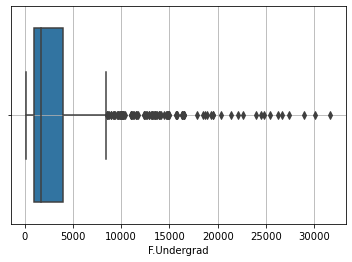

In [313]:
sns.boxplot(x=Edu['F.Undergrad']) 
plt.grid()

### Edu['F.Undergrad'] review of Boxplot Suggests that -

#### 1) There are Many outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Edu['F.Undergrad']  Empirical Rule

In [314]:
x_1std= Edu['F.Undergrad'].mean() + (1 * Edu['F.Undergrad'].std())
y_1std= Edu['F.Undergrad'].mean() - (1 * Edu['F.Undergrad'].std())
x_2std= Edu['F.Undergrad'].mean() + (2 * Edu['F.Undergrad'].std())
y_2std= Edu['F.Undergrad'].mean() - (2 * Edu['F.Undergrad'].std())
x_3std= Edu['F.Undergrad'].mean() + (3 * Edu['F.Undergrad'].std())
y_3std= Edu['F.Undergrad'].mean() - (3 * Edu['F.Undergrad'].std())

Sample_size=len(Edu['F.Undergrad'])

is_between11 = Edu['F.Undergrad'].between(Edu['F.Undergrad'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['F.Undergrad'].between(y_1std,Edu['F.Undergrad'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['F.Undergrad'].between(Edu['F.Undergrad'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['F.Undergrad'].between(y_2std,Edu['F.Undergrad'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['F.Undergrad'].between(Edu['F.Undergrad'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['F.Undergrad'].between(y_3std,Edu['F.Undergrad'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  264.18 where as they are  114
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  568
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  160
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  568
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  189
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  568


### Edu['F.Undergrad'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Edu['F.Undergrad']mean,median and mode

In [315]:
a=Edu['F.Undergrad'].mean()
b=Edu['F.Undergrad'].median()
c=Edu['F.Undergrad'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 3699.907335907336 Median = 1707.0 Mode = 1084.857142857143


### Edu[ 'F.Undergrad' ] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Number of full-time undergraduate students,  range from 139.00 to 31643.00 

75% of the institutes have  less than  4005 students full-time undergraduate.

From above figure, we can say that the new full-time undergraduate students institutes is right skewed which means there are More institutes with lower number of full-time undergraduate students

Average Number of full-time undergraduate students is 3699.91 which is higher than the median value 1707.00 indicating that the ditribution is right tailed. 

There are Outliers towards higher side which indicates there are few institutes with full-time undergraduate students.

## Edu['	P.Undergrad ']   5 Number Analysis

In [316]:
Edu_univariant_detailed.loc['P.Undergrad']


count         777.00
mean          855.30
std          1522.43
min             1.00
25%            95.00
50%           353.00
75%           967.00
max         21836.00
CV              1.78
Q1 - Min       94.00
Max - 75%   20869.00
Q2 - Min      352.00
Max - 50%   21483.00
Q2 - Q1       258.00
Q3 - Q2       614.00
Name: P.Undergrad, dtype: float64

### Edu[' P.Undergrad'] review of 5 number Summary Suggests that -

  ##### Disribution is  Right  skewed  -
        (Q1 - Min) which is 94.00 < Max - Q3 which is  20869.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 352.00 <  (Max - Q2) which is 21483.00
        (Q2 - Q1 ) which is  258.00 < (Q3 - Q2 ) which is 614.00
        


   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -   

<AxesSubplot:xlabel='P.Undergrad', ylabel='Density'>

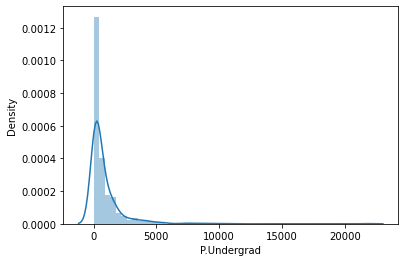

In [317]:
sns.distplot(Edu['P.Undergrad'])


### Histogram Review for Edu['P.Undergrad'] Shows -
#### 1) 1 Peak
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-

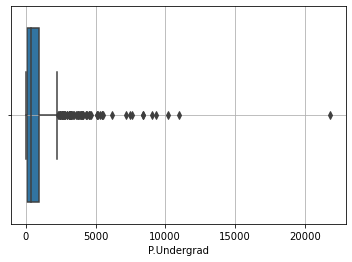

In [318]:
sns.boxplot(x=Edu['P.Undergrad']) 
plt.grid()


### Edu['P.Undergrad'] review of Boxplot Suggests that -

#### 1) There are Many outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Edu['P.Undergrad']  Empirical Rule


In [319]:
x_1std= Edu['P.Undergrad'].mean() + (1 * Edu['P.Undergrad'].std())
y_1std= Edu['P.Undergrad'].mean() - (1 * Edu['P.Undergrad'].std())
x_2std= Edu['P.Undergrad'].mean() + (2 * Edu['P.Undergrad'].std())
y_2std= Edu['P.Undergrad'].mean() - (2 * Edu['P.Undergrad'].std())
x_3std= Edu['P.Undergrad'].mean() + (3 * Edu['P.Undergrad'].std())
y_3std= Edu['P.Undergrad'].mean() - (3 * Edu['P.Undergrad'].std())

Sample_size=len(Edu['P.Undergrad'])

is_between11 = Edu['P.Undergrad'].between(Edu['P.Undergrad'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['P.Undergrad'].between(y_1std,Edu['P.Undergrad'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['P.Undergrad'].between(Edu['P.Undergrad'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['P.Undergrad'].between(y_2std,Edu['P.Undergrad'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['P.Undergrad'].between(Edu['P.Undergrad'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['P.Undergrad'].between(y_3std,Edu['P.Undergrad'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)


Number of Mean + 1 Sigma occurances should be  264.18 where as they are  154
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  558
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  188
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  558
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  205
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  558


### Edu['P.Undergrad'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed)
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed)

##  Edu['	P.Undergrad']  mean,median and mode


In [320]:
a=Edu['P.Undergrad'].mean()
b=Edu['P.Undergrad'].median()
c=Edu['P.Undergrad'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 855.2985842985843 Median = 353.0 Mode = 30.0


### Edu[ 'P.Undergrad' ] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Number of Part-time undergraduate students,  range from  1.00 to 21836.00 

75% of the institutes have  less than  967.00 students part-time undergraduate.

From above figure, we can say that the new Part-time undergraduate students pe institutes is right skewed which means there are More institutes with lower Count of full-time undergraduate students.

Average Number of Patr-time undergraduate students is 855.30 which is higher than the median value 353.00 indicating that the ditribution is right tailed. 

There are Outliers towards higher side which indicates there are few institutes with relativelyhigher count of  part-time undergraduate students

## Edu['Outstate']   5 Number Analysis



In [321]:
Edu_univariant_detailed.loc['Outstate']

count         777.00
mean        10440.67
std          4023.02
min          2340.00
25%          7320.00
50%          9990.00
75%         12925.00
max         21700.00
CV              0.39
Q1 - Min     4980.00
Max - 75%    8775.00
Q2 - Min     7650.00
Max - 50%   11710.00
Q2 - Q1      2670.00
Q3 - Q2      2935.00
Name: Outstate, dtype: float64

### Edu['Outstate'] review of 5 number Summary Suggests that -

  ##### Disribution is  Right  skewed  -
        (Q1 - Min) which is 4980.00 < Max - Q3 which is  8775.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 7650.00 <  (Max - Q2) which is 11710.00
        (Q2 - Q1 ) which is  2670.00 < (Q3 - Q2 ) which is 2935.00
        


##### Let's review the Histogram as second level of verification to Confirm the Skewness -   		



<AxesSubplot:xlabel='Outstate', ylabel='Density'>

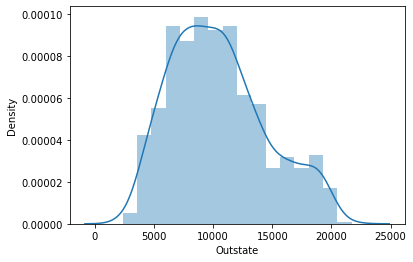

In [322]:
sns.distplot(Edu['Outstate'])

### Histogram Review for Edu['Outstate'] Shows -
#### 1) 1 Peak
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-


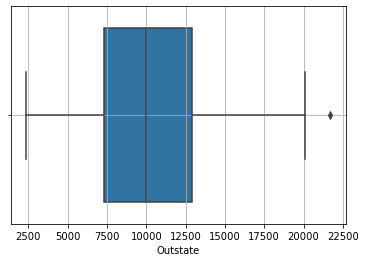

In [323]:
sns.boxplot(x=Edu['Outstate']) 
plt.grid()


### Edu['Outstate'] review of Boxplot Suggests that -

#### 1) There is Only one outlier
#### 2) Distribution is RightSkewed due to longer Right Whisker, though there are not any significant outliers.

## Edu['Outstate']  Empirical Rule

In [324]:
x_1std= Edu['Outstate'].mean() + (1 * Edu['Outstate'].std())
y_1std= Edu['Outstate'].mean() - (1 * Edu['Outstate'].std())
x_2std= Edu['Outstate'].mean() + (2 * Edu['Outstate'].std())
y_2std= Edu['Outstate'].mean() - (2 * Edu['Outstate'].std())
x_3std= Edu['Outstate'].mean() + (3 * Edu['Outstate'].std())
y_3std= Edu['Outstate'].mean() - (3 * Edu['Outstate'].std())

Sample_size=len(Edu['Outstate'])

is_between11 = Edu['Outstate'].between(Edu['Outstate'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['Outstate'].between(y_1std,Edu['Outstate'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['Outstate'].between(Edu['Outstate'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['Outstate'].between(y_2std,Edu['Outstate'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['Outstate'].between(Edu['Outstate'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['Outstate'].between(y_3std,Edu['Outstate'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  264.18 where as they are  232
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  297
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  321
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  416
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  360
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  417


### Edu['Outstate'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed), But the degree of Assymetry is not so significant. 
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed), But the degree of Assymetry is not so significant. 
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed), But the degree of Assymetry is not so significant. 

##  Edu['Outstate']  mean,median and mode


In [325]:
a=Edu['Outstate'].mean()
b=Edu['Outstate'].median()
c=Edu['Outstate'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 10440.66924066924 Median = 9990.0 Mode = 6550.0


### Edu[ 'Outstate' ] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Number of students for whom the particular college or university is Out-of-state tuition,  range from  2340.00 to 21700.00

75% of the institutes have  less than  12925.00 students for whom the particular college or university is Out-of-state tuition.

From above figure, we can say that the students for whom the particular college or university is Out-of-state tuition institutes is right skewed which means there are More institutes with lower Count of such students

Average  Number of students for whom the particular college or university is Out-of-state tuition is 10440.67 which is higher than the median value 9990.00 indicating that the ditribution is right tailed. though the gap is marginal.

## Edu['Room.Board']   5 Number Analysis



In [326]:
Edu_univariant_detailed.loc['Room.Board']

count        777.00
mean        4357.53
std         1096.70
min         1780.00
25%         3597.00
50%         4200.00
75%         5050.00
max         8124.00
CV             0.25
Q1 - Min    1817.00
Max - 75%   3074.00
Q2 - Min    2420.00
Max - 50%   3924.00
Q2 - Q1      603.00
Q3 - Q2      850.00
Name: Room.Board, dtype: float64

### Edu['Room.Board'] review of 5 number Summary Suggests that -

  ##### Disribution is  Right  skewed  -
        (Q1 - Min) which is 1817.00 < Max - Q3 which is  3074.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 2420.00 <  (Max - Q2) which is 3924.00
        (Q2 - Q1 ) which is  603.00 < (Q3 - Q2 ) which is 850.00
        


##### Let's review the Histogram as second level of verification to Confirm the Skewness -   		

<AxesSubplot:xlabel='Room.Board', ylabel='Density'>

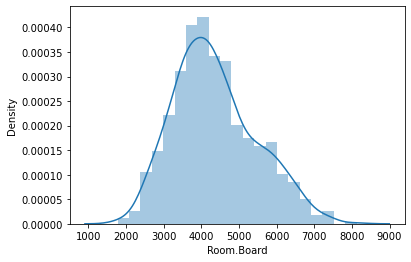

In [327]:
sns.distplot(Edu['Room.Board'])

### Histogram Review for Edu['Room.Board'] Shows -
#### 1) 1 Peak
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

#### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-

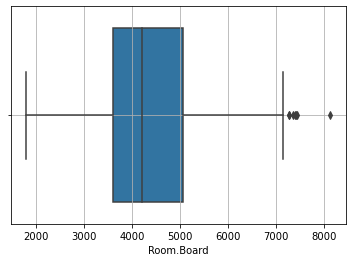

In [328]:
sns.boxplot(x=Edu['Room.Board']) 
plt.grid()


### Edu['Room.Board'] review of Boxplot Suggests that -

#### 1) There are few outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker, though there are not any significant outliers.

## Edu['Room.Board']  Empirical Rule

In [329]:
x_1std= Edu['Room.Board'].mean() + (1 * Edu['Room.Board'].std())
y_1std= Edu['Room.Board'].mean() - (1 * Edu['Room.Board'].std())
x_2std= Edu['Room.Board'].mean() + (2 * Edu['Room.Board'].std())
y_2std= Edu['Room.Board'].mean() - (2 * Edu['Room.Board'].std())
x_3std= Edu['Room.Board'].mean() + (3 * Edu['Room.Board'].std())
y_3std= Edu['Room.Board'].mean() - (3 * Edu['Room.Board'].std())

Sample_size=len(Edu['Room.Board'])

is_between11 = Edu['Room.Board'].between(Edu['Room.Board'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['Room.Board'].between(y_1std,Edu['Room.Board'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['Room.Board'].between(Edu['Room.Board'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['Room.Board'].between(y_2std,Edu['Room.Board'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['Room.Board'].between(Edu['Room.Board'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['Room.Board'].between(y_3std,Edu['Room.Board'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)


Number of Mean + 1 Sigma occurances should be  264.18 where as they are  207
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  315
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  321
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  428
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  344
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  432


### Edu['Room.Board'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed). 
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed). 
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed). 

##  Edu['Room.Board']  mean,median and mode

In [330]:
a=Edu['Room.Board'].mean()
b=Edu['Room.Board'].median()
c=Edu['Room.Board'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 4357.526383526383 Median = 4200.0 Mode = 4100.0


### Edu[ 'Room.Board' ] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Cost of Room and board within the listed institutes  ranges from  1780.00 to 8124.00

75% of the institutes have  less than  5050.00 Cost of Room and board 

From above figure, we can say that the Cost of Room and board across institutes is right skewed which means there are More institutes with lower cost for this parameter

Average Cost of Room and board college or university  is 4357.53 which is higher than the median value 4200.00 indicating that the ditribution is right tailed. though the gap is marginal.

## Edu['Books']   5 Number Analysis



In [331]:
Edu_univariant_detailed.loc['Books']

count        777.00
mean         549.38
std          165.11
min           96.00
25%          470.00
50%          500.00
75%          600.00
max         2340.00
CV             0.30
Q1 - Min     374.00
Max - 75%   1740.00
Q2 - Min     404.00
Max - 50%   1840.00
Q2 - Q1       30.00
Q3 - Q2      100.00
Name: Books, dtype: float64

### Edu['Books'] review of 5 number Summary Suggests that -

  ##### Disribution is  Right  skewed  -
        (Q1 - Min) which is 374.00 < Max - Q3 which is  1740.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 404.00 <  (Max - Q2) which is 1840.00
        (Q2 - Q1 ) which is  30.00 < (Q3 - Q2 ) which is 100.00
        


##### Let's review the Histogram as second level of verification to Confirm the Skewness -   		

<AxesSubplot:xlabel='Books', ylabel='Density'>

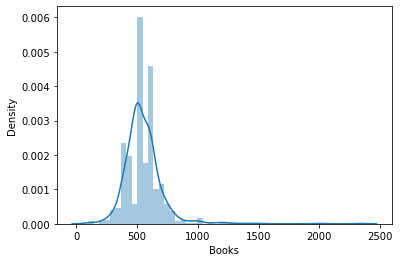

In [332]:
sns.distplot(Edu['Books'])

### Histogram Review for Edu['Books'] Shows -
#### 1) 1 Peak
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-

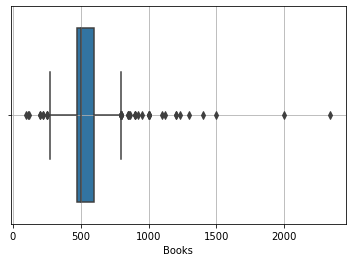

In [333]:
sns.boxplot(x=Edu['Books']) 
plt.grid()


### Edu['Books'] review of Boxplot Suggests that -

#### 1) There are many outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker.

## Edu['Books']  Empirical Rule

In [334]:
x_1std= Edu['Books'].mean() + (1 * Edu['Books'].std())
y_1std= Edu['Books'].mean() - (1 * Edu['Books'].std())
x_2std= Edu['Books'].mean() + (2 * Edu['Books'].std())
y_2std= Edu['Books'].mean() - (2 * Edu['Books'].std())
x_3std= Edu['Books'].mean() + (3 * Edu['Books'].std())
y_3std= Edu['Books'].mean() - (3 * Edu['Books'].std())

Sample_size=len(Edu['Books'])

is_between11 = Edu['Books'].between(Edu['Books'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['Books'].between(y_1std,Edu['Books'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['Books'].between(Edu['Books'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['Books'].between(y_2std,Edu['Books'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['Books'].between(Edu['Books'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['Books'].between(y_3std,Edu['Books'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)


Number of Mean + 1 Sigma occurances should be  264.18 where as they are  294
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  378
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  333
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  418
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  344
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  423


### Edu['Books'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed). 
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed). 
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed). 

##  Edu['Books']  mean,median and mode

In [335]:
a=Edu['Books'].mean()
b=Edu['Books'].median()
c=Edu['Books'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 549.3809523809524 Median = 500.0 Mode = 500.0


### Edu[ 'Books' ] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Cost of Books within the listed institutes  ranges from  96.00 to 2340.00

75% of the institutes have  less than   600.00 Cost of Books 

From above figure, we can say that the Cost of Books across institutes is right skewed which means there are More institutes with lower / reasonable Cost of Books

Average Cost of Room and board college or university  is 549.38 which is slightly higher than the median value 500.00 indicating that the ditribution is right tailed, though the gap is marginal.

## Edu['Personal']   5 Number Analysis


In [336]:
Edu_univariant_detailed.loc['Personal']


count        777.00
mean        1340.64
std          677.07
min          250.00
25%          850.00
50%         1200.00
75%         1700.00
max         6800.00
CV             0.51
Q1 - Min     600.00
Max - 75%   5100.00
Q2 - Min     950.00
Max - 50%   5600.00
Q2 - Q1      350.00
Q3 - Q2      500.00
Name: Personal, dtype: float64

### Edu['Personal'] review of 5 number Summary Suggests that -

  ##### Disribution is  Right  skewed  -
        (Q1 - Min) which is 600.00 < Max - Q3 which is  5100.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 950.00 <  (Max - Q2) which is 5600.00
        (Q2 - Q1 ) which is  350.00 < (Q3 - Q2 ) which is 500.00
        


##### Let's review the Histogram as second level of verification to Confirm the Skewness -   		



<AxesSubplot:xlabel='Personal', ylabel='Density'>

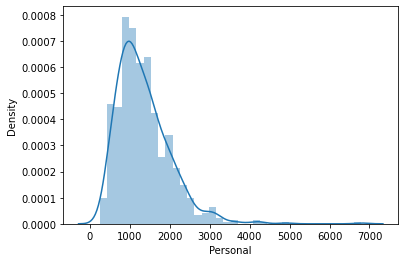

In [337]:
sns.distplot(Edu['Personal'])

### Histogram Review for Edu['Personal'] Shows -
#### 1) 1 Peak
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-


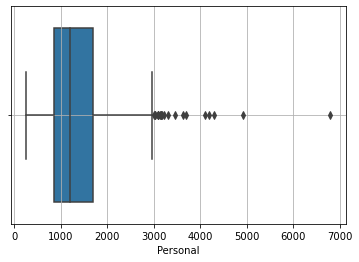

In [338]:
sns.boxplot(x=Edu['Personal']) 
plt.grid()


### Edu['Personal'] review of Boxplot Suggests that -

#### 1) There are many outliers
#### 2) Distribution is RightSkewed due to longer Right Whisker.

## Edu['Personal']  Empirical Rule


In [339]:
x_1std= Edu['Personal'].mean() + (1 * Edu['Personal'].std())
y_1std= Edu['Personal'].mean() - (1 * Edu['Personal'].std())
x_2std= Edu['Personal'].mean() + (2 * Edu['Personal'].std())
y_2std= Edu['Personal'].mean() - (2 * Edu['Personal'].std())
x_3std= Edu['Personal'].mean() + (3 * Edu['Personal'].std())
y_3std= Edu['Personal'].mean() - (3 * Edu['Personal'].std())

Sample_size=len(Edu['Personal'])

is_between11 = Edu['Personal'].between(Edu['Personal'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['Personal'].between(y_1std,Edu['Personal'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['Personal'].between(Edu['Personal'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['Personal'].between(y_2std,Edu['Personal'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['Personal'].between(Edu['Personal'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['Personal'].between(y_3std,Edu['Personal'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  264.18 where as they are  229
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  355
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  300
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  447
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  322
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  447


### Edu['Personal'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed). 
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed). 
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed). 

##  Edu['Personal']  mean,median and mode


In [340]:
a=Edu['Personal'].mean()
b=Edu['Personal'].median()
c=Edu['Personal'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 1340.6422136422136 Median = 1200.0 Mode = 1000.0


### Edu[ 'Personal' ] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Estimated personal spending for a student within the listed institutes  ranges from  250.00 to 6800.00

75% of the students spend less than   1700.00 on personal needs 

From above figure, we can say that the personal spend across institutes is right skewed which means there are More institutes where students can study by spending less on personal needs.

Average personal spend is 1340.64 which is slightly higher than the median value  1200.00 indicating that the ditribution is right tailed, though the gap is marginal.

## Edu['PhD']   5 Number Analysis

In [341]:
Edu_univariant_detailed.loc['PhD']


count       777.00
mean         72.66
std          16.33
min           8.00
25%          62.00
50%          75.00
75%          85.00
max         103.00
CV            0.22
Q1 - Min     54.00
Max - 75%    18.00
Q2 - Min     67.00
Max - 50%    28.00
Q2 - Q1      13.00
Q3 - Q2      10.00
Name: PhD, dtype: float64

### Edu['PhD'] review of 5 number Summary Suggests that -

  ##### Disribution is  Left  skewed  -
        (Q1 - Min) which is 54.00 > Max - Q3 which is  18.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 67.00 >  (Max - Q2) which is 28.00
        (Q2 - Q1 ) which is  13.00 > (Q3 - Q2 ) which is 10.00

##### Let's review the Histogram as second level of verification to Confirm the Skewness -

<AxesSubplot:xlabel='PhD', ylabel='Density'>

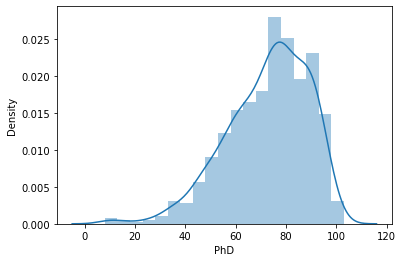

In [342]:
sns.distplot(Edu['PhD'])


### Histogram Review for Edu['PhD'] Shows -
#### 1) 1 Peak
#### 2) Left Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-		

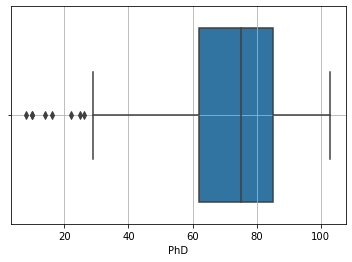

In [343]:
sns.boxplot(x=Edu['PhD']) 
plt.grid()

### Edu['PhD'] review of Boxplot Suggests that -

#### 1) There are many outliers lower than Q1
#### 2) Distribution is Left Skewed due to longer Left Whisker.

## Edu['PhD']  Empirical Rule


In [344]:
x_1std= Edu['PhD'].mean() + (1 * Edu['PhD'].std())
y_1std= Edu['PhD'].mean() - (1 * Edu['PhD'].std())
x_2std= Edu['PhD'].mean() + (2 * Edu['PhD'].std())
y_2std= Edu['PhD'].mean() - (2 * Edu['PhD'].std())
x_3std= Edu['PhD'].mean() + (3 * Edu['PhD'].std())
y_3std= Edu['PhD'].mean() - (3 * Edu['PhD'].std())

Sample_size=len(Edu['PhD'])

is_between11 = Edu['PhD'].between(Edu['PhD'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['PhD'].between(y_1std,Edu['PhD'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['PhD'].between(Edu['PhD'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['PhD'].between(y_2std,Edu['PhD'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['PhD'].between(Edu['PhD'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['PhD'].between(y_3std,Edu['PhD'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  264.18 where as they are  301
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  208
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  443
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  304
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  443
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  328


### Edu['PhD'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Left Skewed). 
#### 1) '2 standard deviation' from Mean is assymetrical (Left Skewed). 
#### 1) '3 standard deviation' from Mean is assymetrical (Left Skewed). 

##  Edu['PhD']  mean,median and mode

In [345]:
a=Edu['PhD'].mean()
b=Edu['PhD'].median()
c=Edu['PhD'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 72.66023166023166 Median = 75.0 Mode = 77.0


### Edu[ 'Left' ] review of Mean, Median and Mode suggests that -

#### In this case Mean < Median< Mode hence the distribution is Left Skewed

## Edu['Terminal']   5 Number Analysis

In [346]:
Edu_univariant_detailed.loc['Terminal']

count       777.00
mean         79.70
std          14.72
min          24.00
25%          71.00
50%          82.00
75%          92.00
max         100.00
CV            0.18
Q1 - Min     47.00
Max - 75%     8.00
Q2 - Min     58.00
Max - 50%    18.00
Q2 - Q1      11.00
Q3 - Q2      10.00
Name: Terminal, dtype: float64

### Edu['Terminal'] review of 5 number Summary Suggests that -

  ##### Disribution is  Left  skewed  -
        (Q1 - Min) which is 47.00 > Max - Q3 which is  8.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 58.00 >  (Max - Q2) which is 18.00
        (Q2 - Q1 ) which is  11.00 > (Q3 - Q2 ) which is 10.00

##### Let's review the Histogram as second level of verification to Confirm the Skewness -   		

<AxesSubplot:xlabel='Terminal', ylabel='Density'>

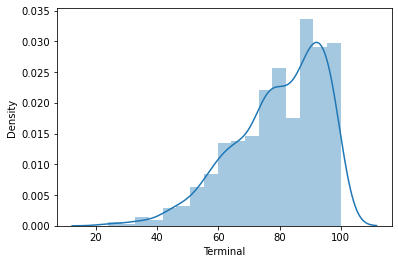

In [87]:
sns.distplot(Edu['Terminal'])

### Histogram Review for Edu['Terminal'] Shows -
#### 1) 1 Peak
#### 2) Left Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-		


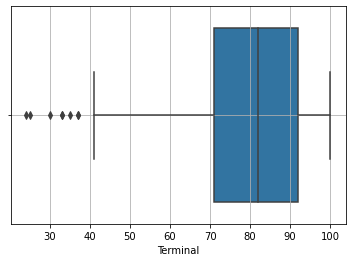

In [88]:
sns.boxplot(x=Edu['Terminal']) 
plt.grid()


### Edu['Terminal'] review of Boxplot Suggests that -

#### 1) There are many outliers lower than Q1
#### 2) Distribution is Left Skewed due to longer Left Whisker.

## Edu['Terminal']  Empirical Rule


In [89]:
x_1std= Edu['Terminal'].mean() + (1 * Edu['Terminal'].std())
y_1std= Edu['Terminal'].mean() - (1 * Edu['Terminal'].std())
x_2std= Edu['Terminal'].mean() + (2 * Edu['Terminal'].std())
y_2std= Edu['Terminal'].mean() - (2 * Edu['Terminal'].std())
x_3std= Edu['Terminal'].mean() + (3 * Edu['Terminal'].std())
y_3std= Edu['Terminal'].mean() - (3 * Edu['Terminal'].std())

Sample_size=len(Edu['Terminal'])

is_between11 = Edu['Terminal'].between(Edu['Terminal'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['Terminal'].between(y_1std,Edu['Terminal'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['Terminal'].between(Edu['Terminal'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['Terminal'].between(y_2std,Edu['Terminal'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['Terminal'].between(Edu['Terminal'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['Terminal'].between(y_3std,Edu['Terminal'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  264.18 where as they are  308
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  210
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  437
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  308
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  437
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  334


### Edu['Terminal'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Left Skewed). 
#### 1) '2 standard deviation' from Mean is assymetrical (Left Skewed). 
#### 1) '3 standard deviation' from Mean is assymetrical (Left Skewed). 

##  Edu['Terminal']  mean,median and mode

In [90]:
a=Edu['Terminal'].mean()
b=Edu['Terminal'].median()
c=Edu['Terminal'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 79.70270270270271 Median = 82.0 Mode = 96.0


### Edu[ 'Terminal' ] review of Mean, Median and Mode suggests that -

#### In this case Mean < Median< Mode hence the distribution is Left Skewed

## Edu['S.F.Ratio']   5 Number Analysis

In [91]:
Edu_univariant_detailed.loc['S.F.Ratio']

count       777.00
mean         14.09
std           3.96
min           2.50
25%          11.50
50%          13.60
75%          16.50
max          39.80
CV            0.28
Q1 - Min      9.00
Max - 75%    23.30
Q2 - Min     11.10
Max - 50%    26.20
Q2 - Q1       2.10
Q3 - Q2       2.90
Name: S.F.Ratio, dtype: float64

### Edu['S.F.Ratio'] review of 5 number Summary Suggests that -

  ##### Disribution is  Right  skewed  -
        (Q1 - Min) which is 9.00 < Max - Q3 which is  23.30
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 11.10 <  (Max - Q2) which is 26.20
        (Q2 - Q1 ) which is  2.10 < (Q3 - Q2 ) which is 2.90

<AxesSubplot:xlabel='S.F.Ratio', ylabel='Density'>

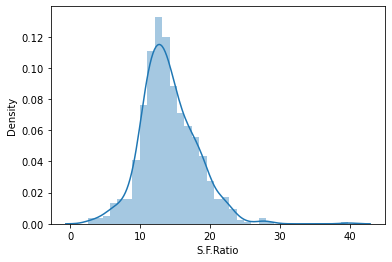

In [92]:
sns.distplot(Edu['S.F.Ratio'])

### Histogram Review for Edu['S.F.Ratio'] Shows -
#### 1) 1 Peak
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-		

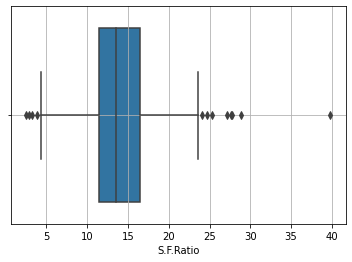

In [93]:
sns.boxplot(x=Edu['S.F.Ratio']) 
plt.grid()

### Edu['S.F.Ratio'] review of Boxplot Suggests that -

#### 1) There are many outliers on bothleft as well as right side
#### 2) Distribution is Little RightSkewed due to longer Right Whisker, though not so significant

## Edu['S.F.Ratio']  Empirical Rule


In [94]:
x_1std= Edu['S.F.Ratio'].mean() + (1 * Edu['S.F.Ratio'].std())
y_1std= Edu['S.F.Ratio'].mean() - (1 * Edu['S.F.Ratio'].std())
x_2std= Edu['S.F.Ratio'].mean() + (2 * Edu['S.F.Ratio'].std())
y_2std= Edu['S.F.Ratio'].mean() - (2 * Edu['S.F.Ratio'].std())
x_3std= Edu['S.F.Ratio'].mean() + (3 * Edu['S.F.Ratio'].std())
y_3std= Edu['S.F.Ratio'].mean() - (3 * Edu['S.F.Ratio'].std())

Sample_size=len(Edu['S.F.Ratio'])

is_between11 = Edu['S.F.Ratio'].between(Edu['S.F.Ratio'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['S.F.Ratio'].between(y_1std,Edu['S.F.Ratio'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['S.F.Ratio'].between(Edu['S.F.Ratio'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['S.F.Ratio'].between(y_2std,Edu['S.F.Ratio'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['S.F.Ratio'].between(Edu['S.F.Ratio'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['S.F.Ratio'].between(y_3std,Edu['S.F.Ratio'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)


Number of Mean + 1 Sigma occurances should be  264.18 where as they are  231
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  337
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  329
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  409
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  347
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  425


### Edu['S.F.Ratio'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed). 
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed). 
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed). 

## Edu['S.F.Ratio']  mean,median and mode

In [95]:
a=Edu['S.F.Ratio'].mean()
b=Edu['S.F.Ratio'].median()
c=Edu['S.F.Ratio'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 14.089703989703986 Median = 13.6 Mode = 12.1


### Edu[ 'S.F.Ratio' ] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Student/faculty ratio within the listed institutes  ranges from   2.50 to  39.80

75% of the institutes have less than  16.50 Students /faculty member 

From above figure, we can say that the Student/faculty ratio across institutes is right skewed which means there are More institutes where students are paid much attention as the number of Students / Faculty member is less.

Average Student/faculty ratio is 14.09 which is slightly higher than the median value   13.60 indicating that the ditribution is right tailed, though the gap is marginal.

## Edu['perc.alumni']   5 Number Analysis

In [96]:
Edu_univariant_detailed.loc['perc.alumni']

count       777.00
mean         22.74
std          12.39
min           0.00
25%          13.00
50%          21.00
75%          31.00
max          64.00
CV            0.54
Q1 - Min     13.00
Max - 75%    33.00
Q2 - Min     21.00
Max - 50%    43.00
Q2 - Q1       8.00
Q3 - Q2      10.00
Name: perc.alumni, dtype: float64

### Edu['perc.alumni'] review of 5 number Summary Suggests that -

  ##### Disribution is  Right  skewed  -
        (Q1 - Min) which is 13.00 < Max - Q3 which is  33.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 21.00 <  (Max - Q2) which is  43.00
        (Q2 - Q1 ) which is  8.00 < (Q3 - Q2 ) which is 10.00

   ##### Let's review the Histogram as second level of verification to Confirm the Skewness -

<AxesSubplot:xlabel='perc.alumni', ylabel='Density'>

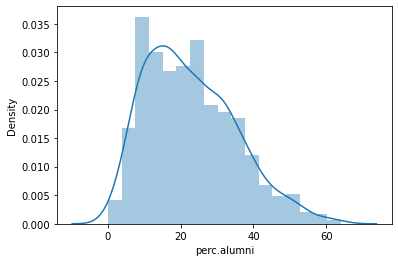

In [97]:
sns.distplot(Edu['perc.alumni'])

### Histogram Review for Edu['perc.alumni'] Shows -
#### 1) 1 Peak
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-		


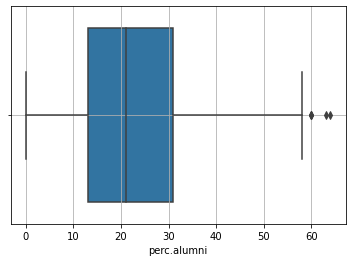

In [98]:
sns.boxplot(x=Edu['perc.alumni']) 
plt.grid()

### Edu['perc.alumni'] review of Boxplot Suggests that -

#### 1) There are Few outliers on as right side
#### 2) Distribution is RightSkewed due to longer Right Whisker.

## Edu['perc.alumni']  Empirical Rule

In [99]:
x_1std= Edu['perc.alumni'].mean() + (1 * Edu['perc.alumni'].std())
y_1std= Edu['perc.alumni'].mean() - (1 * Edu['perc.alumni'].std())
x_2std= Edu['perc.alumni'].mean() + (2 * Edu['perc.alumni'].std())
y_2std= Edu['perc.alumni'].mean() - (2 * Edu['perc.alumni'].std())
x_3std= Edu['perc.alumni'].mean() + (3 * Edu['perc.alumni'].std())
y_3std= Edu['perc.alumni'].mean() - (3 * Edu['perc.alumni'].std())

Sample_size=len(Edu['perc.alumni'])

is_between11 = Edu['perc.alumni'].between(Edu['perc.alumni'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['perc.alumni'].between(y_1std,Edu['perc.alumni'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['perc.alumni'].between(Edu['perc.alumni'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['perc.alumni'].between(y_2std,Edu['perc.alumni'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['perc.alumni'].between(Edu['perc.alumni'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['perc.alumni'].between(y_3std,Edu['perc.alumni'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  264.18 where as they are  239
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  271
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  331
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  414
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  358
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  414


### Edu[' perc.alumni'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed). 
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed). 
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed). 

##  Edu['	perc.alumni']  mean,median and mode

In [100]:
a=Edu['perc.alumni'].mean()
b=Edu['perc.alumni'].median()
c=Edu['perc.alumni'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 22.743886743886744 Median = 21.0 Mode = 10.0


### Edu[ 'perc.alumni' ] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

Percentage of alumni who donate within the listed institutes  ranges from   0.00 to   64.00

75% of the institutes receive donation from less than  31.00% of their Alums 

From above figure, we can say that the Percentage of alumni who donate across institutes is right skewed which means there are less institutes where Percentage of alumni who donate is more.

Average Percentage of alumni who donate  is  22.74 which is slightly higher than the median value 21.00 indicating that the ditribution is right tailed, though the gap is marginal.

## Edu['Expend']   5 Number Analysis

In [101]:
Edu_univariant_detailed.loc['Expend']

count         777.00
mean         9660.17
std          5221.77
min          3186.00
25%          6751.00
50%          8377.00
75%         10830.00
max         56233.00
CV              0.54
Q1 - Min     3565.00
Max - 75%   45403.00
Q2 - Min     5191.00
Max - 50%   47856.00
Q2 - Q1      1626.00
Q3 - Q2      2453.00
Name: Expend, dtype: float64

### Edu['Expend'] review of 5 number Summary Suggests that -

  ##### Disribution is  Right  skewed  -
        (Q1 - Min) which is 3565.00 < Max - Q3 which is  45403.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is 5191.00 <  (Max - Q2) which is  47856.00
        (Q2 - Q1 ) which is  1626.00 < (Q3 - Q2 ) which is 2453.00

##### Let's review the Histogram as second level of verification to Confirm the Skewness -   		


<AxesSubplot:xlabel='Expend', ylabel='Density'>

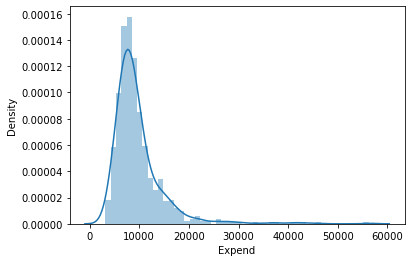

In [102]:
sns.distplot(Edu['Expend'])


### Histogram Review for Edu['Expend'] Shows -
#### 1) 1 Peak
#### 2) Right Skewness
#### 3) It doesnt Show a perfect 'Bell Curve'

##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-

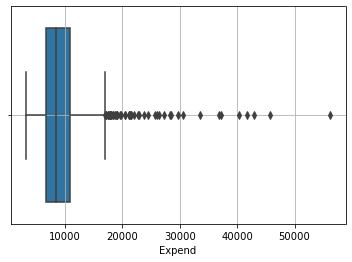

In [103]:
sns.boxplot(x=Edu['Expend']) 
plt.grid()

### Edu['Expend'] review of Boxplot Suggests that -

#### 1) There are many outliers on right side
#### 2) Distribution is RightSkewed due to longer Right Whisker

## Edu['Expend']  Empirical Rule


In [104]:
x_1std= Edu['Expend'].mean() + (1 * Edu['Expend'].std())
y_1std= Edu['Expend'].mean() - (1 * Edu['Expend'].std())
x_2std= Edu['Expend'].mean() + (2 * Edu['Expend'].std())
y_2std= Edu['Expend'].mean() - (2 * Edu['Expend'].std())
x_3std= Edu['Expend'].mean() + (3 * Edu['Expend'].std())
y_3std= Edu['Expend'].mean() - (3 * Edu['Expend'].std())

Sample_size=len(Edu['Expend'])

is_between11 = Edu['Expend'].between(Edu['Expend'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['Expend'].between(y_1std,Edu['Expend'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['Expend'].between(Edu['Expend'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['Expend'].between(y_2std,Edu['Expend'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['Expend'].between(Edu['Expend'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['Expend'].between(y_3std,Edu['Expend'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  264.18 where as they are  185
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  494
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  234
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  515
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  246
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  515


### Edu['Expend'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is assymetrical (Right Skewed). 
#### 1) '2 standard deviation' from Mean is assymetrical (Right Skewed). 
#### 1) '3 standard deviation' from Mean is assymetrical (Right Skewed). 

##  Edu['Expend']  mean,median and mode

In [105]:
a=Edu['Expend'].mean()
b=Edu['Expend'].median()
c=Edu['Expend'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 9660.17117117117 Median = 8377.0 Mode = 7941.666666666667


### Edu[ 'Expend' ] review of Mean, Median and Mode suggests that -

#### In this case Mean > Median > Mode hence the distribution is Right Skewed

#### Insights:

The Instructional expenditure per student  ranges from   3186.00 to   56233.00

75% of the institutes spend less than  10830.00 as Instructional expenditure per student 

From above figure, we can say that The Instructional expenditure per student is right skewed which means there are very few institutes where The Instructional expenditure per student is more.

Average Percentage of The Instructional expenditure per student is  9660.17 which is slightly higher than the median value 8377.00 indicating that the ditribution is right tailed, though the gap is marginal.

## Edu['Grad.Rate']   5 Number Analysis

In [106]:
Edu_univariant_detailed.loc['Grad.Rate']

count       777.00
mean         65.46
std          17.18
min          10.00
25%          53.00
50%          65.00
75%          78.00
max         118.00
CV            0.26
Q1 - Min     43.00
Max - 75%    40.00
Q2 - Min     55.00
Max - 50%    53.00
Q2 - Q1      12.00
Q3 - Q2      13.00
Name: Grad.Rate, dtype: float64

### Edu['Grad.Rate'] review of 5 number Summary Suggests that -

  ##### Disribution is  Left  skewed  -
        (Q1 - Min) which is 43.00 > Max - Q3 which is  40.00
  ##### Following points  support the symmetry -
        (Q2 - Min ) which is  55.00 >  (Max - Q2) which is  53.00
        (Q2 - Q1 ) which is  12.00 > (Q3 - Q2 ) which is 13.00
        
   ###### Gap is very low so this can be considered approximate normal

<AxesSubplot:xlabel='Grad.Rate', ylabel='Density'>

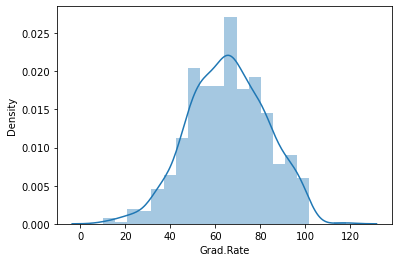

In [107]:
sns.distplot(Edu['Grad.Rate'])


### Histogram Review for Edu['Grad.Rate'] Shows -
#### 1) 1 Peak
#### 2) A very little Right Skewness almost normal
#### 3) It does  Show a near perfect 'Bell Curve'

##### Let's review the BoxPlot to Confirm the Skewness  and to check if there are any outliers-

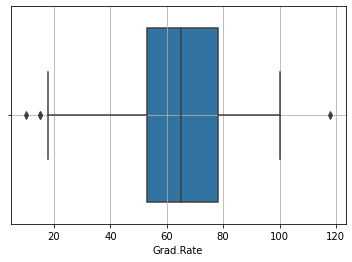

In [108]:
sns.boxplot(x=Edu['Grad.Rate']) 
plt.grid()

### Edu['Grad.Rate'] review of Boxplot Suggests that -

#### 1) There are  handful of outliers on each  side
#### 2) Distribution appears little LeftSkewed due to longer left Whisker however outliers on both the sides seem to centralize the distribution making it close to Normal.

## Edu['Grad.Rate']  Empirical Rule


In [109]:
x_1std= Edu['Grad.Rate'].mean() + (1 * Edu['Grad.Rate'].std())
y_1std= Edu['Grad.Rate'].mean() - (1 * Edu['Grad.Rate'].std())
x_2std= Edu['Grad.Rate'].mean() + (2 * Edu['Grad.Rate'].std())
y_2std= Edu['Grad.Rate'].mean() - (2 * Edu['Grad.Rate'].std())
x_3std= Edu['Grad.Rate'].mean() + (3 * Edu['Grad.Rate'].std())
y_3std= Edu['Grad.Rate'].mean() - (3 * Edu['Grad.Rate'].std())

Sample_size=len(Edu['Grad.Rate'])

is_between11 = Edu['Grad.Rate'].between(Edu['Grad.Rate'].mean(),x_1std, inclusive=False )
Level11=len(Edu[is_between11])
is_between12 = Edu['Grad.Rate'].between(y_1std,Edu['Grad.Rate'].mean(), inclusive=False )
Level12=len(Edu[is_between12]) 

is_between21 = Edu['Grad.Rate'].between(Edu['Grad.Rate'].mean(),x_2std, inclusive=False )
Level21=len(Edu[is_between21])
is_between22 = Edu['Grad.Rate'].between(y_2std,Edu['Grad.Rate'].mean(), inclusive=False )
Level22=len(Edu[is_between22])

is_between31 = Edu['Grad.Rate'].between(Edu['Grad.Rate'].mean(),x_3std, inclusive=False )
Level31=len(Edu[is_between31])
is_between32 = Edu['Grad.Rate'].between(y_3std,Edu['Grad.Rate'].mean(), inclusive=False )
Level32=len(Edu[is_between32])

print('Number of Mean + 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level11)
print('Number of Mean - 1 Sigma occurances should be ', round((Sample_size * .68/2),3) , 'where as they are ',  Level12)
print('Number of Mean + 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level21)
print('Number of Mean - 2 Sigma occurances should be ', round((Sample_size * .95/2),3) , 'where as they are ',  Level22)
print('Number of Mean + 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level31)
print('Number of Mean - 3 Sigma occurances should be ', round((Sample_size * .997/2),3) , 'where as they are ',  Level32)

Number of Mean + 1 Sigma occurances should be  264.18 where as they are  248
Number of Mean - 1 Sigma occurances should be  264.18 where as they are  264
Number of Mean + 2 Sigma occurances should be  369.075 where as they are  375
Number of Mean - 2 Sigma occurances should be  369.075 where as they are  372
Number of Mean + 3 Sigma occurances should be  387.334 where as they are  385
Number of Mean - 3 Sigma occurances should be  387.334 where as they are  390


### Edu['Grad.Rate'] review of Empirical Rule suggest that -

#### 1) '1 standard deviation' from Mean is near Normaal. 
#### 1) '2 standard deviation' from Mean is near Normaal. 
#### 1) '3 standard deviation' from Mean is near Normaal. 

##  Edu['Grad.Rate']  mean,median and mode

In [110]:
a=Edu['Grad.Rate'].mean()
b=Edu['Grad.Rate'].median()
c=Edu['Grad.Rate'].mode().mean()
print('Mean =', a,'Median =',b,'Mode =',c)

Mean = 65.46332046332046 Median = 65.0 Mode = 72.0


### Edu[ 'Grad.Rate' ] review of Mean, Median and Mode suggests that -

#### In this case Mean = Median < Mode hence the distribution is Near Normal

#### Insights:

The Graduation rate across institutes  / Universities  ranges from   10.00% to   118.00

75% of the institutes have graduation rate less than  78.00 % as Instructional expenditure per student 

From above figure, we can say that The The Graduation rate per institutes  / Universities is normally distributed

Average The Graduation rate across institutes  / Universities is  65.46 which is almost equal to the median value 65.00 indicating that the ditribution is near normal.

####  Bivariate Analysis

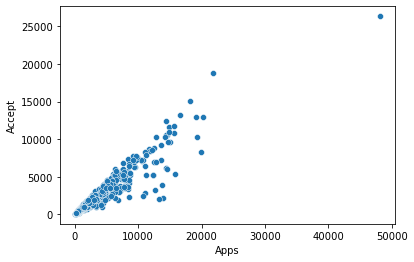

In [111]:
sns.scatterplot(x='Apps', y='Accept', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

####  Ratio of Accepted Applications is fairly linear, towards the Mean

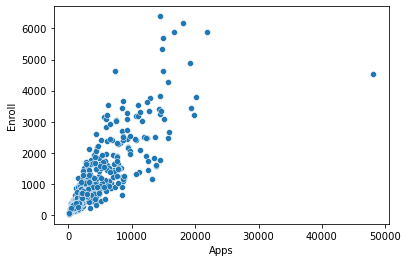

In [112]:
sns.scatterplot(x='Apps', y='Enroll', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

### Unirsities / Institutes that have received less application have enrolled less students

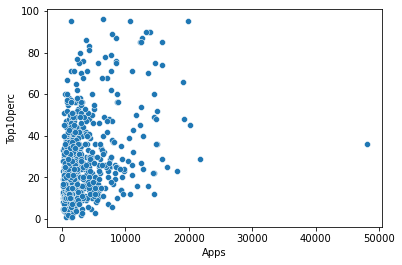

In [113]:
sns.scatterplot(x='Apps', y='Top10perc', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

### Unirsities / Institutes that have received less application have more Percentage of new students from top 10% of Higher Secondary class

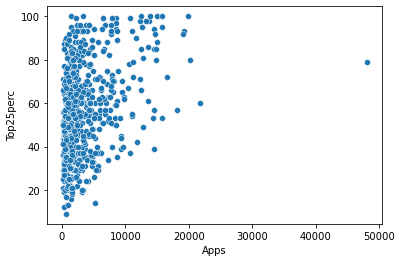

In [114]:
sns.scatterplot(x='Apps', y='Top25perc', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

### Unirsities / Institutes that have received less application have more Percentage of new students from top 25% of Higher Secondary class

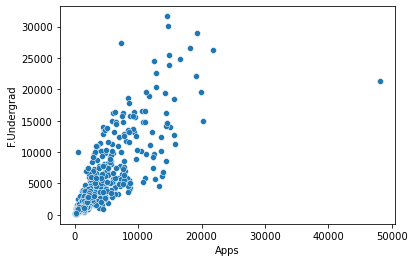

In [115]:
sns.scatterplot(x='Apps', y='F.Undergrad', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

### Unirsities / Institutes that have received less application have less Number of full-time undergraduate students

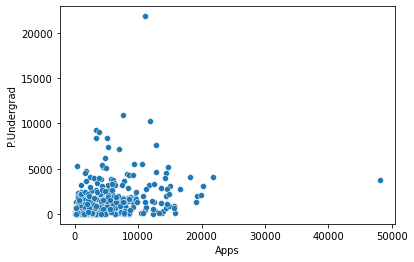

In [116]:
sns.scatterplot(x='Apps', y='P.Undergrad', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

### Universities / Institutes that have received less application have less Number of part-time undergraduate students

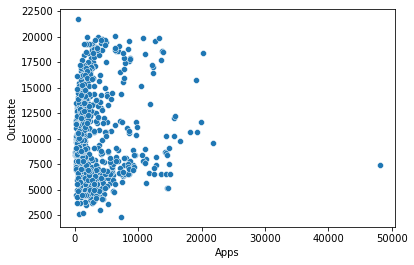

In [117]:
sns.scatterplot(x='Apps', y='Outstate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

### Universities / Institutes that have received less application have more Number of students for whom the particular college or university is Out-of-state tuition

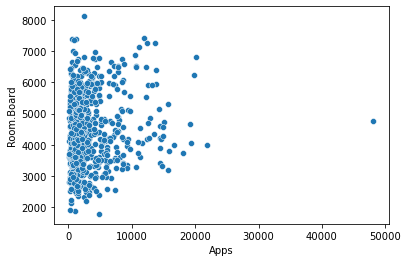

In [118]:
sns.scatterplot(x='Apps', y='Room.Board', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

### Universities / Institutes that have received less application have more Cost of Room and board

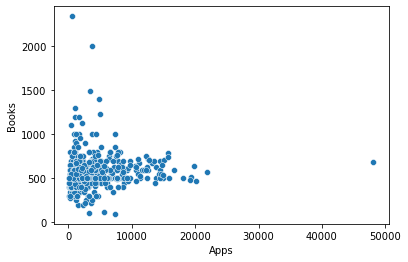

In [119]:
sns.scatterplot(x='Apps', y='Books', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

### Cost of Books is generally same across the Universities/ Institutes

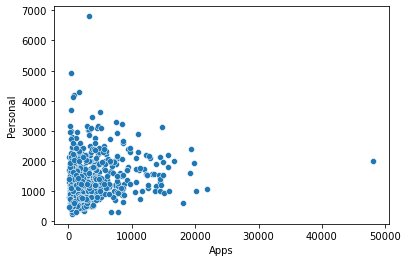

In [120]:
sns.scatterplot(x='Apps', y='Personal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

### Cost of Personal expenses is generally same across the Universities/ Institutes

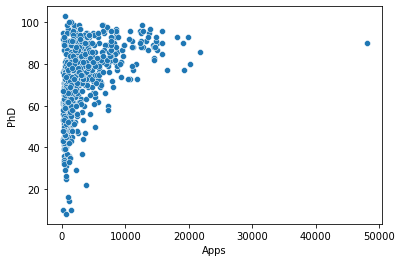

In [121]:
sns.scatterplot(x='Apps', y='PhD', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

### There are Good Number of Faculty Members with PhD qualification

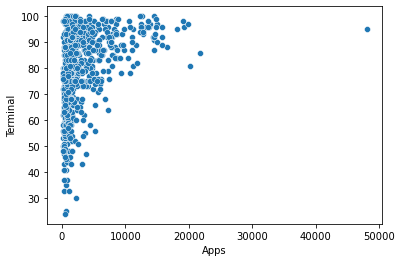

In [122]:
sns.scatterplot(x='Apps', y='Terminal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

### There are Good Number of Faculty Members with Terminal qualification

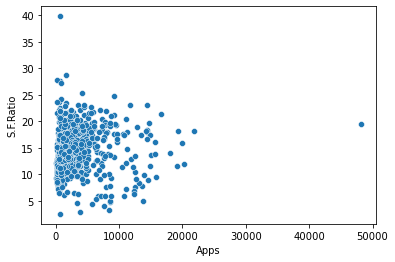

In [123]:
sns.scatterplot(x='Apps', y='S.F.Ratio', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

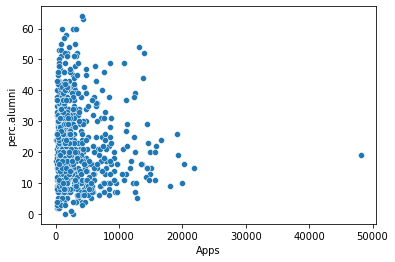

In [124]:
sns.scatterplot(x='Apps', y='perc.alumni', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

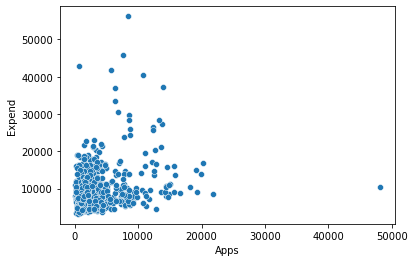

In [125]:
sns.scatterplot(x='Apps', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

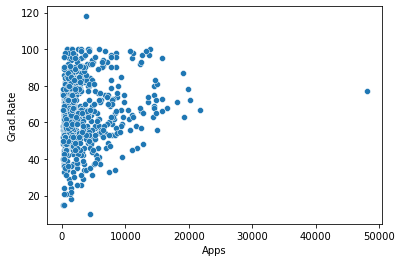

In [126]:
sns.scatterplot(x='Apps', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

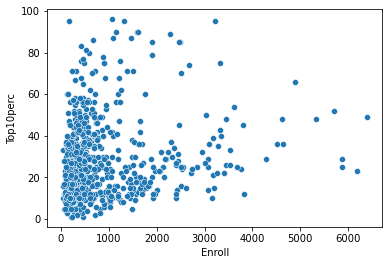

In [127]:
sns.scatterplot(x='Enroll', y='Top10perc', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

###  Percentage of ENROLLMENT of new students from top 10% of Higher Secondary class is more within the Universities that offferred less Enrollment.

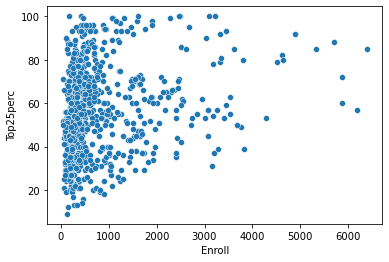

In [128]:
sns.scatterplot(x='Enroll', y='Top25perc', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

##  Percentage of ENROLLMENT of new students from top 25% of Higher Secondary class is more within the Universities that offferred less Enrollment.

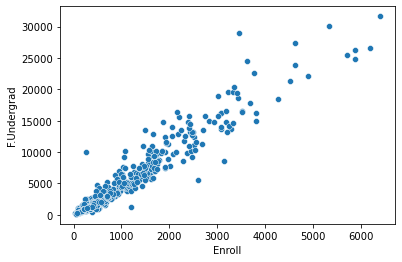

In [129]:
sns.scatterplot(x='Enroll', y='F.Undergrad', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

##  Number of full-time undergraduate students is proportionate to the Enrollments across universities i.e. linear

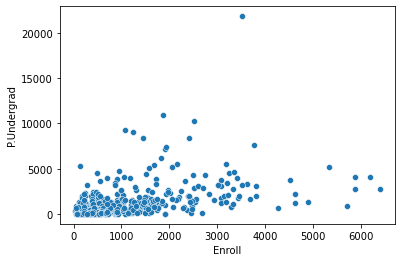

In [130]:
sns.scatterplot(x='Enroll', y='P.Undergrad', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

##  Number of part-time undergraduate students is also less in the universities Enrolling less students and the number is in the similar range too.

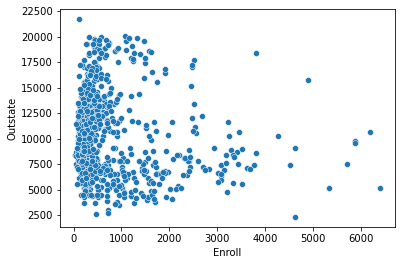

In [131]:
sns.scatterplot(x='Enroll', y='Outstate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

##  Number of students for whom the particular college or university is Out-of-state tuition is  Evenly spread an within the college or university that offer Less Enrollments however as the enrollments increase we the spread turns uneven.

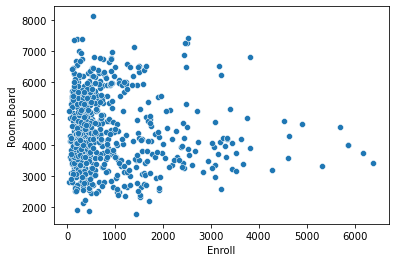

In [132]:
sns.scatterplot(x='Enroll', y='Room.Board', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

##  Cost of Room and board is  Evenly spread an within the college or university that offer Less Enrollments however as the enrollments increase we see this cost spread turns uneven.

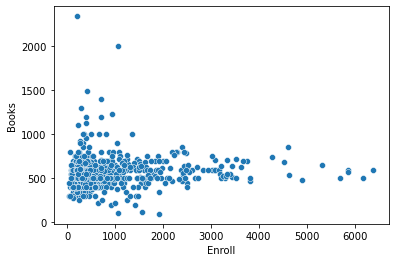

In [133]:
sns.scatterplot(x='Enroll', y='Books', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

##  Cost of Books is Generally within 250-750 across irrespective of number of Enrollments

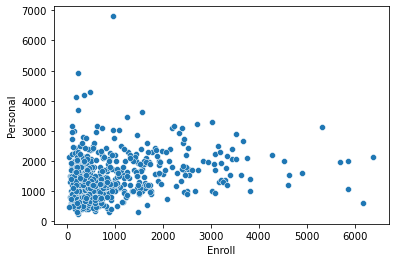

In [134]:
sns.scatterplot(x='Enroll', y='Personal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

##  Estimated personal spending for a student is Generally within 250-2000across irrespective of number of Enrollments which means this Estimate is apparently location based.

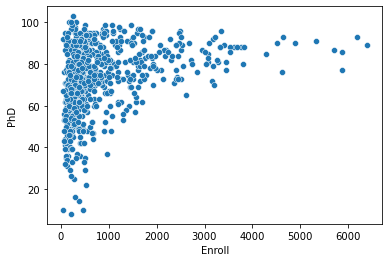

In [135]:
sns.scatterplot(x='Enroll', y='PhD', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

##  Percentage of faculties with Ph.D.’s is Generally higher irrespective of Enrollments.

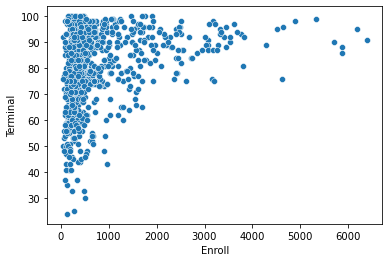

In [136]:
sns.scatterplot(x='Enroll', y='Terminal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

##  Percentage of faculties with Terminal Degrees is Generally higher irrespective of Enrollments.

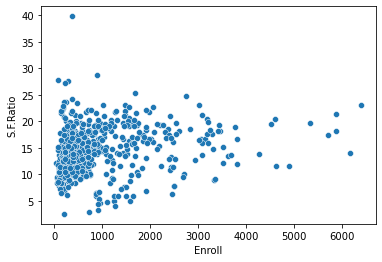

In [137]:
sns.scatterplot(x='Enroll', y='S.F.Ratio', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

##  Percentage of faculties with Terminal Degrees is Generally higher irrespective of Enrollments.

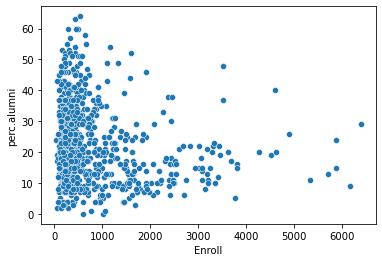

In [138]:
sns.scatterplot(x='Enroll', y='perc.alumni', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

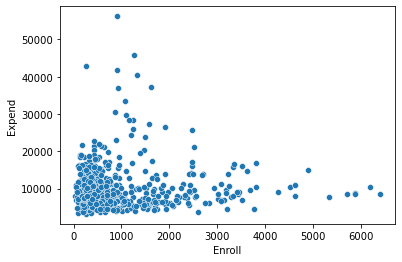

In [139]:
sns.scatterplot(x='Enroll', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

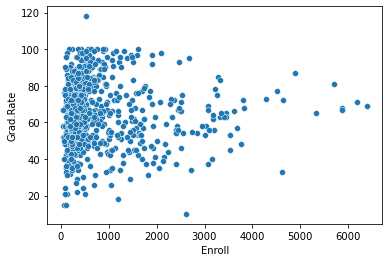

In [140]:
sns.scatterplot(x='Enroll', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

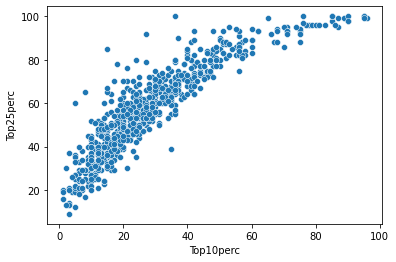

In [141]:
sns.scatterplot(x='Top10perc', y='Top25perc', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

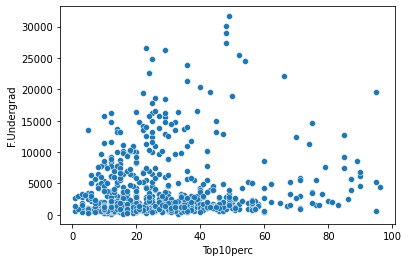

In [142]:
sns.scatterplot(x='Top10perc', y='F.Undergrad', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

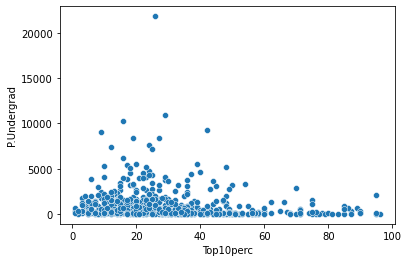

In [143]:
sns.scatterplot(x='Top10perc', y='P.Undergrad', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

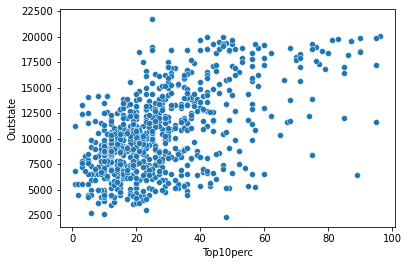

In [144]:
sns.scatterplot(x='Top10perc', y='Outstate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

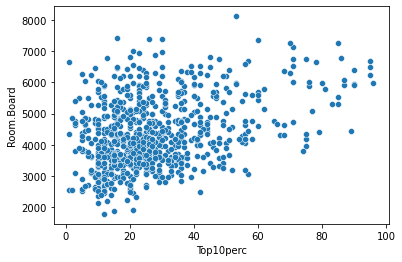

In [145]:
sns.scatterplot(x='Top10perc', y='Room.Board', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

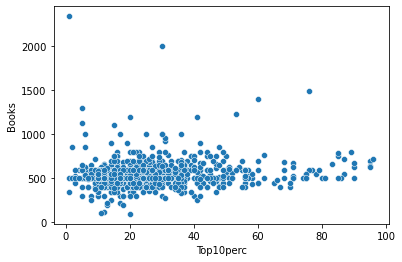

In [146]:
sns.scatterplot(x='Top10perc', y='Books', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

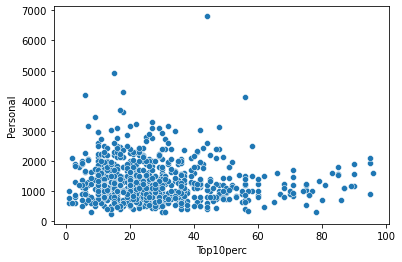

In [147]:
sns.scatterplot(x='Top10perc', y='Personal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

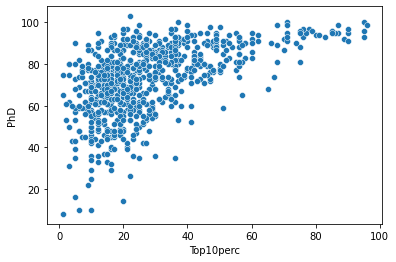

In [148]:
sns.scatterplot(x='Top10perc', y='PhD', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

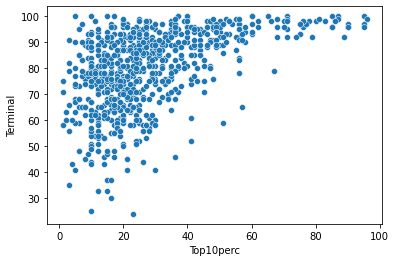

In [149]:
sns.scatterplot(x='Top10perc', y='Terminal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

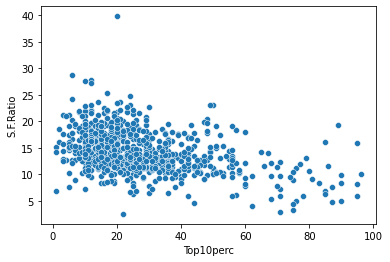

In [150]:
sns.scatterplot(x='Top10perc', y='S.F.Ratio', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

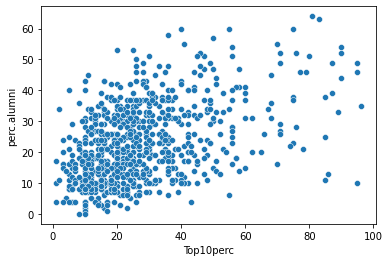

In [151]:
sns.scatterplot(x='Top10perc', y='perc.alumni', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

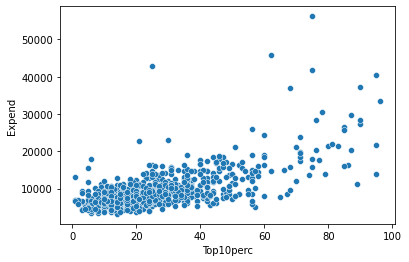

In [152]:
sns.scatterplot(x='Top10perc', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

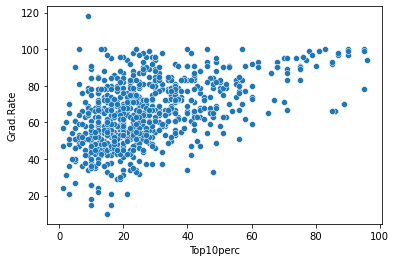

In [153]:
sns.scatterplot(x='Top10perc', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

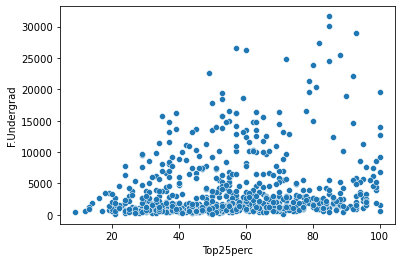

In [154]:
sns.scatterplot(x='Top25perc', y='F.Undergrad', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

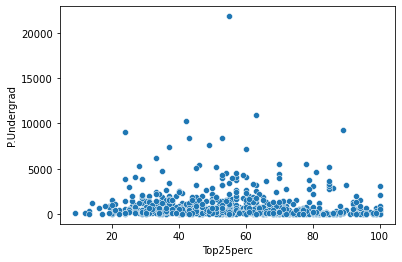

In [155]:
sns.scatterplot(x='Top25perc', y='P.Undergrad', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

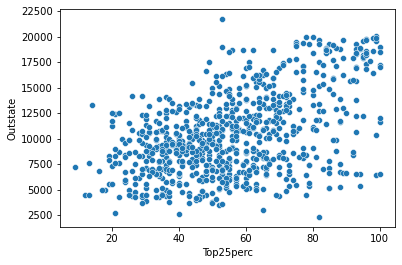

In [156]:
sns.scatterplot(x='Top25perc', y='Outstate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

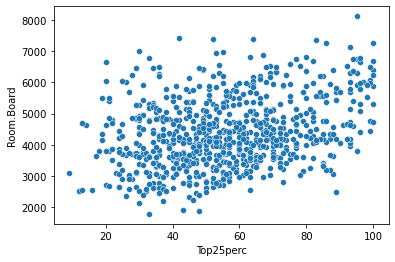

In [157]:
sns.scatterplot(x='Top25perc', y='Room.Board', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

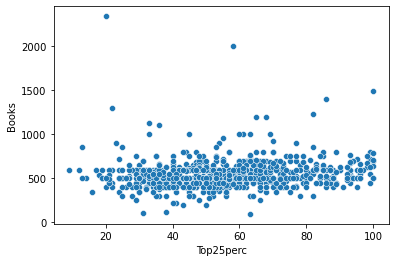

In [158]:
sns.scatterplot(x='Top25perc', y='Books', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

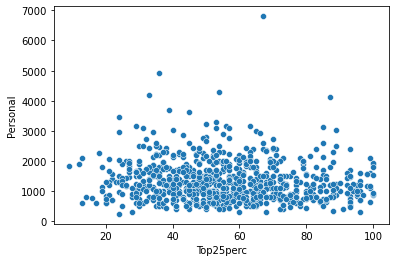

In [159]:
sns.scatterplot(x='Top25perc', y='Personal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

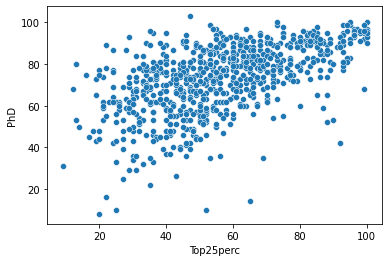

In [160]:
sns.scatterplot(x='Top25perc', y='PhD', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

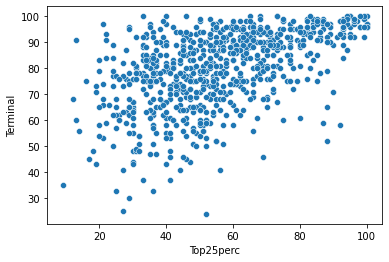

In [161]:
sns.scatterplot(x='Top25perc', y='Terminal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

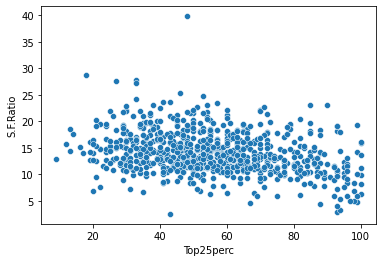

In [162]:
sns.scatterplot(x='Top25perc', y='S.F.Ratio', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

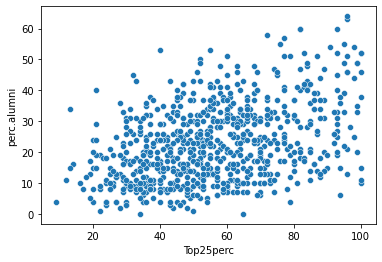

In [163]:
sns.scatterplot(x='Top25perc', y='perc.alumni', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

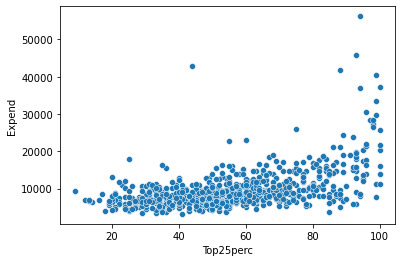

In [164]:
sns.scatterplot(x='Top25perc', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

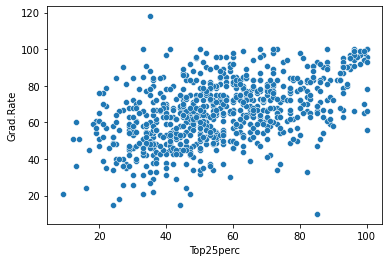

In [165]:
sns.scatterplot(x='Top25perc', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

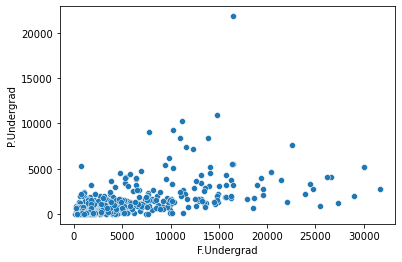

In [166]:
sns.scatterplot(x='F.Undergrad', y='P.Undergrad', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

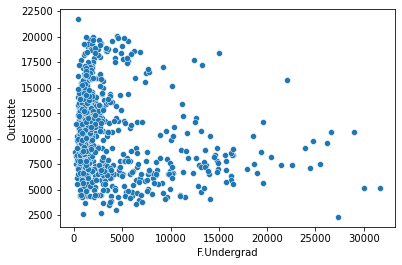

In [167]:
sns.scatterplot(x='F.Undergrad', y='Outstate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

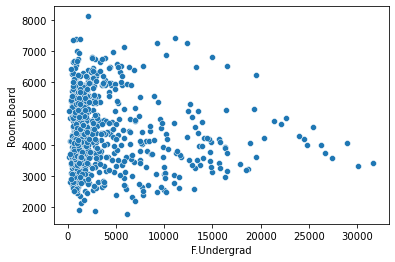

In [168]:
sns.scatterplot(x='F.Undergrad', y='Room.Board', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

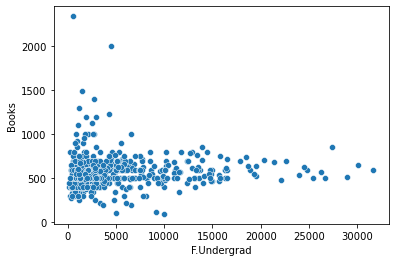

In [169]:
sns.scatterplot(x='F.Undergrad', y='Books', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

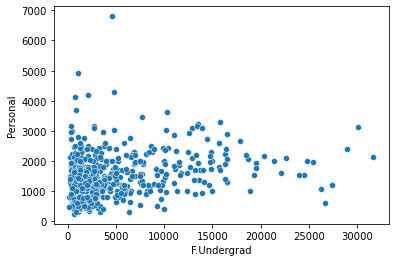

In [170]:
sns.scatterplot(x='F.Undergrad', y='Personal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

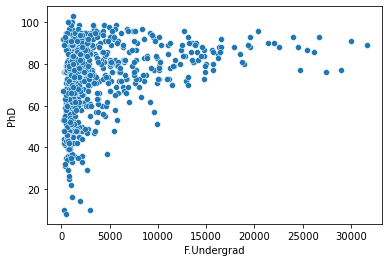

In [171]:
sns.scatterplot(x='F.Undergrad', y='PhD', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

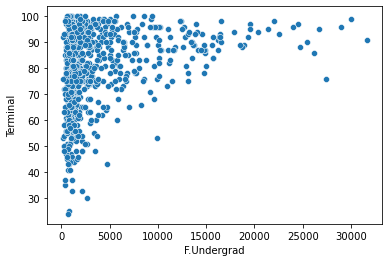

In [172]:
sns.scatterplot(x='F.Undergrad', y='Terminal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

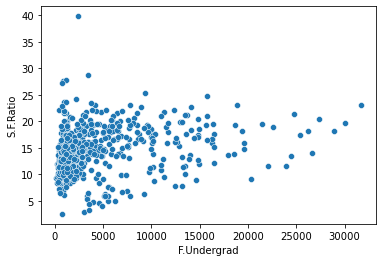

In [173]:
sns.scatterplot(x='F.Undergrad', y='S.F.Ratio', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

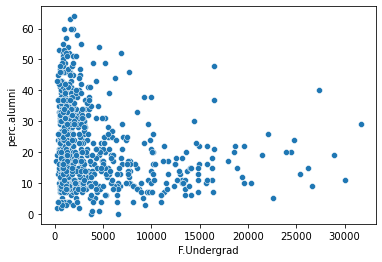

In [174]:
sns.scatterplot(x='F.Undergrad', y='perc.alumni', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

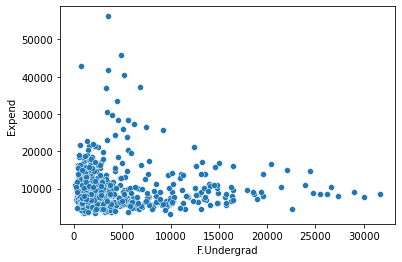

In [175]:
sns.scatterplot(x='F.Undergrad', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

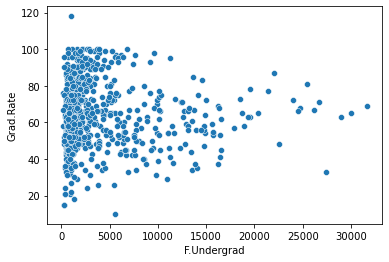

In [176]:
sns.scatterplot(x='F.Undergrad', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

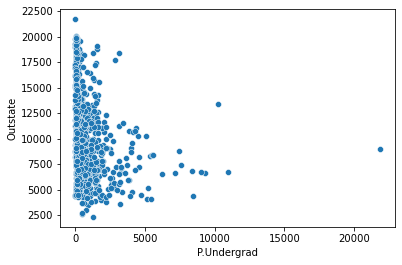

In [177]:
sns.scatterplot(x='P.Undergrad', y='Outstate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

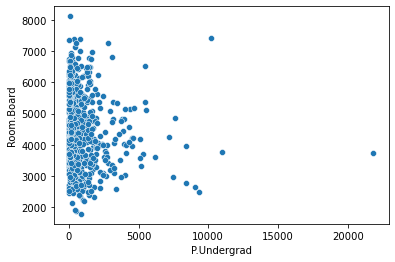

In [178]:
sns.scatterplot(x='P.Undergrad', y='Room.Board', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

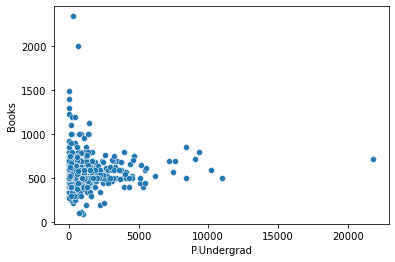

In [179]:
sns.scatterplot(x='P.Undergrad', y='Books', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

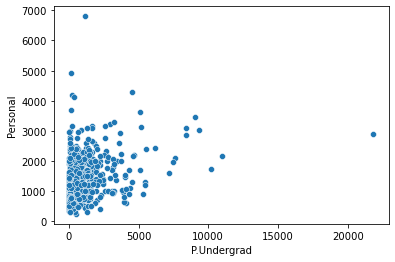

In [180]:
sns.scatterplot(x='P.Undergrad', y='Personal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

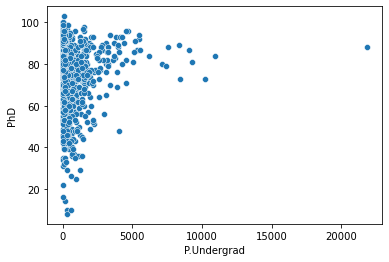

In [181]:
sns.scatterplot(x='P.Undergrad', y='PhD', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

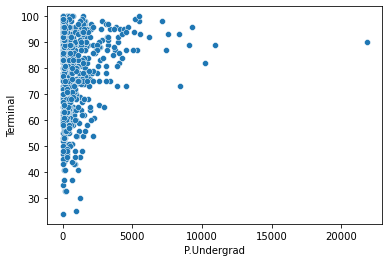

In [182]:
sns.scatterplot(x='P.Undergrad', y='Terminal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

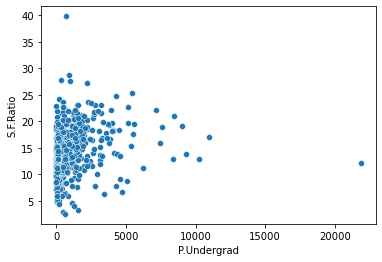

In [183]:
sns.scatterplot(x='P.Undergrad', y='S.F.Ratio', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

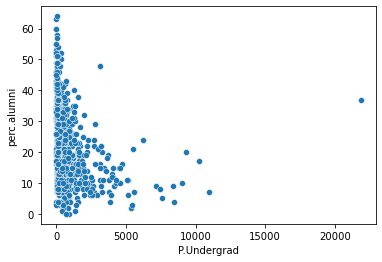

In [184]:
sns.scatterplot(x='P.Undergrad', y='perc.alumni', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

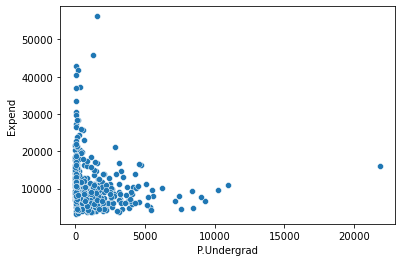

In [185]:
sns.scatterplot(x='P.Undergrad', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

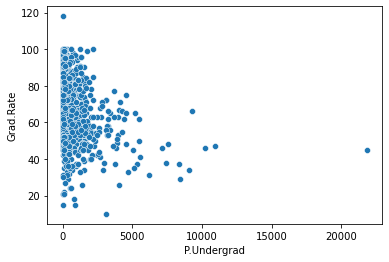

In [186]:
sns.scatterplot(x='P.Undergrad', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

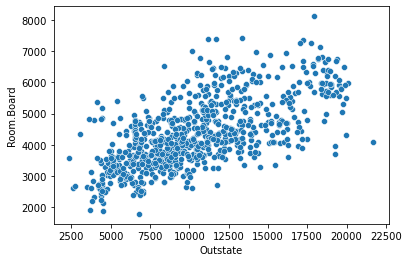

In [187]:
sns.scatterplot(x='Outstate', y='Room.Board', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

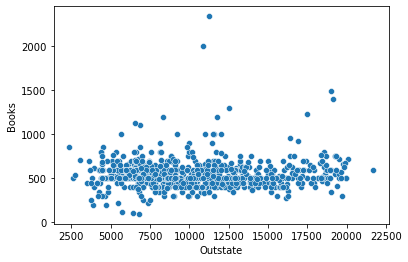

In [188]:
sns.scatterplot(x='Outstate', y='Books', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

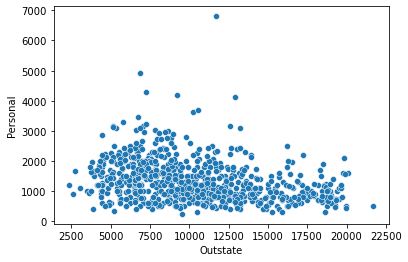

In [189]:
sns.scatterplot(x='Outstate', y='Personal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

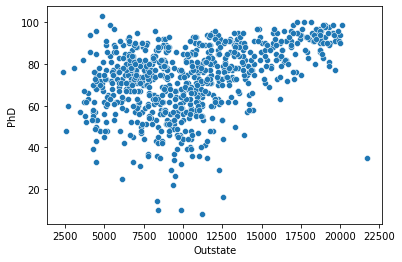

In [190]:
sns.scatterplot(x='Outstate', y='PhD', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

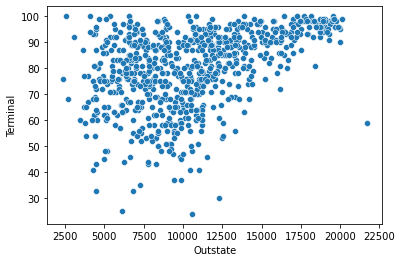

In [191]:
sns.scatterplot(x='Outstate', y='Terminal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

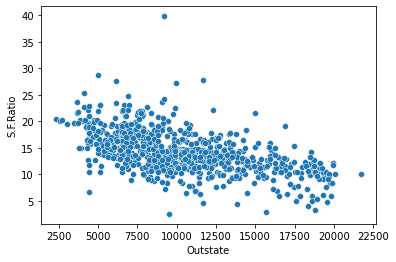

In [192]:
sns.scatterplot(x='Outstate', y='S.F.Ratio', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

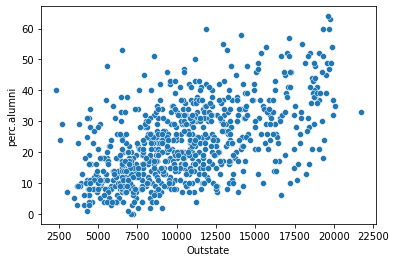

In [193]:
sns.scatterplot(x='Outstate', y='perc.alumni', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

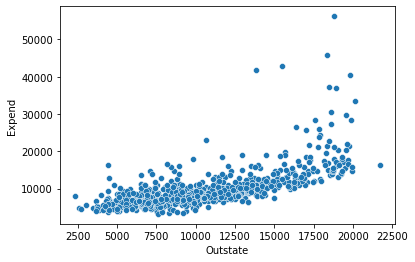

In [194]:
sns.scatterplot(x='Outstate', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

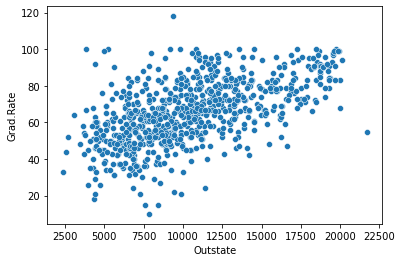

In [195]:
sns.scatterplot(x='Outstate', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

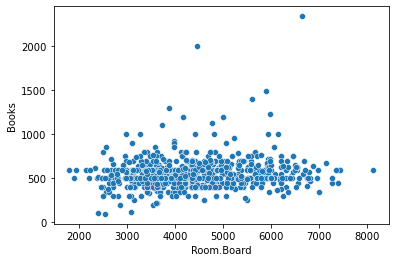

In [196]:
sns.scatterplot(x='Room.Board', y='Books', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

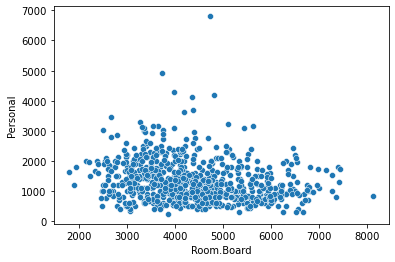

In [197]:
sns.scatterplot(x='Room.Board', y='Personal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

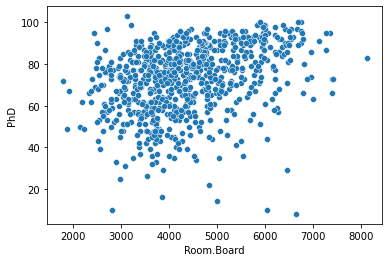

In [198]:
sns.scatterplot(x='Room.Board', y='PhD', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

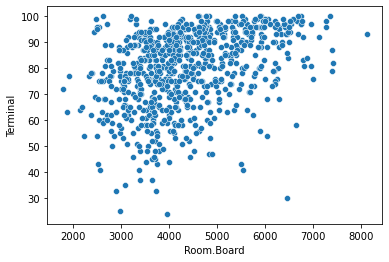

In [199]:
sns.scatterplot(x='Room.Board', y='Terminal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

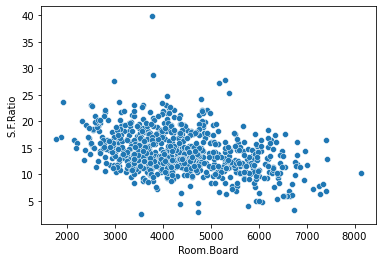

In [200]:
sns.scatterplot(x='Room.Board', y='S.F.Ratio', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

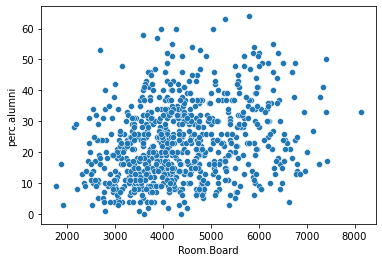

In [201]:
sns.scatterplot(x='Room.Board', y='perc.alumni', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

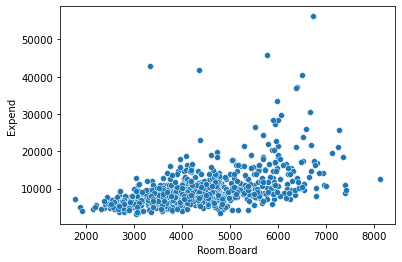

In [202]:
sns.scatterplot(x='Room.Board', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

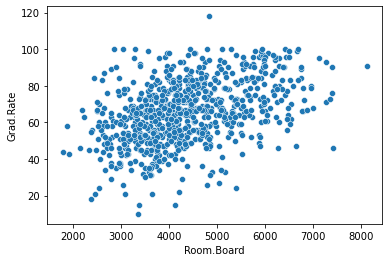

In [203]:
sns.scatterplot(x='Room.Board', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

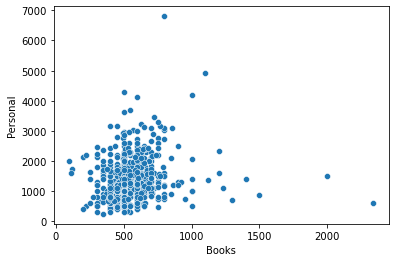

In [204]:
sns.scatterplot(x='Books', y='Personal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

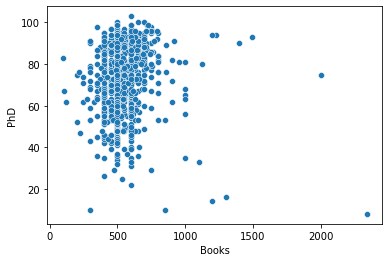

In [205]:
sns.scatterplot(x='Books', y='PhD', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

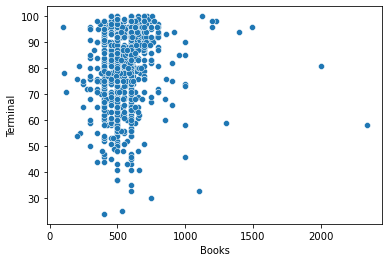

In [206]:
sns.scatterplot(x='Books', y='Terminal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

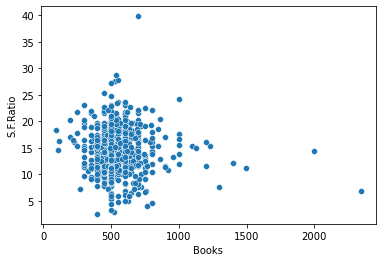

In [207]:
sns.scatterplot(x='Books', y='S.F.Ratio', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

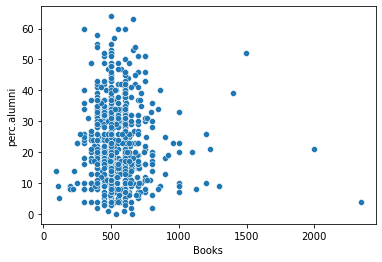

In [208]:
sns.scatterplot(x='Books', y='perc.alumni', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

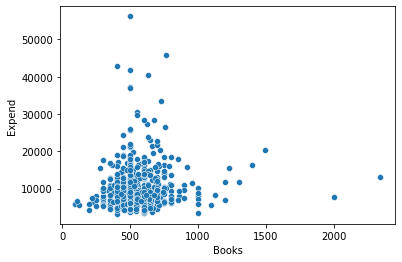

In [209]:
sns.scatterplot(x='Books', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

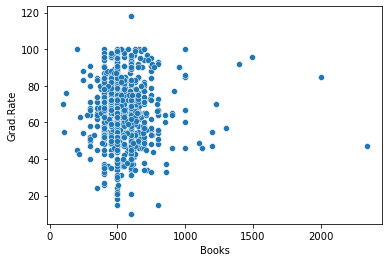

In [210]:
sns.scatterplot(x='Books', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

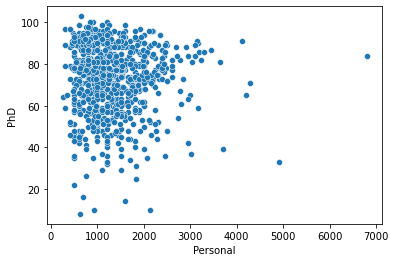

In [211]:
sns.scatterplot(x='Personal', y='PhD', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

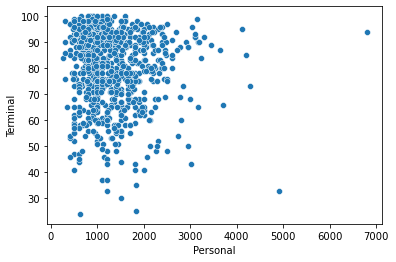

In [212]:
sns.scatterplot(x='Personal', y='Terminal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

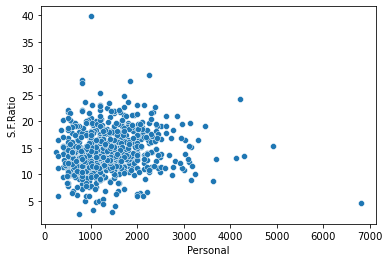

In [213]:
sns.scatterplot(x='Personal', y='S.F.Ratio', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

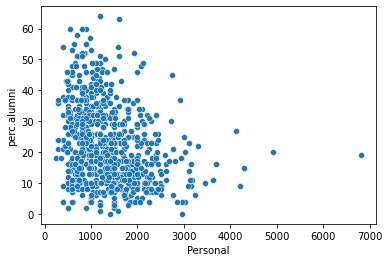

In [214]:
sns.scatterplot(x='Personal', y='perc.alumni', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

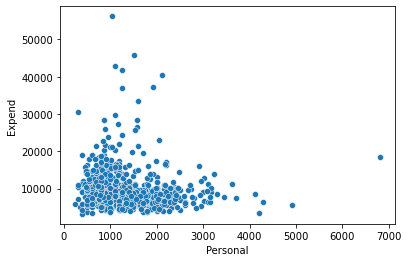

In [215]:
sns.scatterplot(x='Personal', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

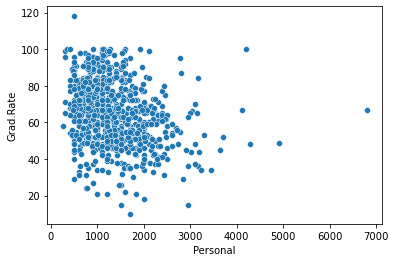

In [216]:
sns.scatterplot(x='Personal', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

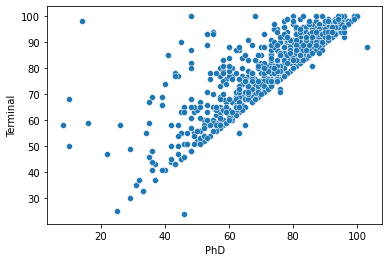

In [217]:
sns.scatterplot(x='PhD', y='Terminal', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

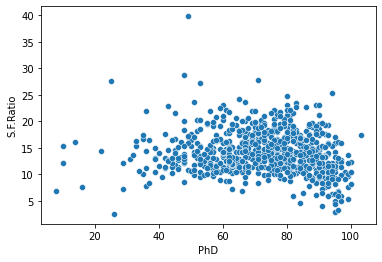

In [218]:
sns.scatterplot(x='PhD', y='S.F.Ratio', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

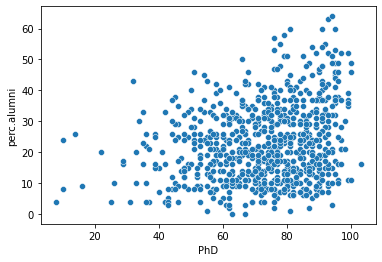

In [219]:
sns.scatterplot(x='PhD', y='perc.alumni', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

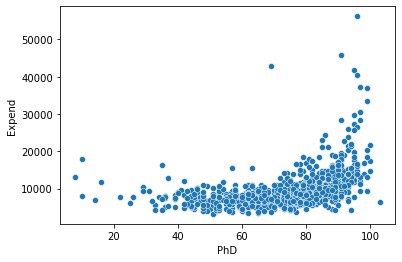

In [220]:
sns.scatterplot(x='PhD', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

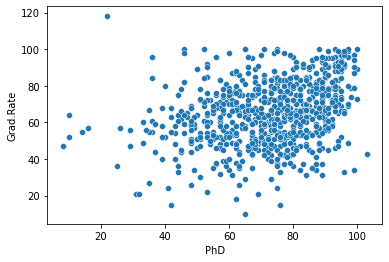

In [221]:
sns.scatterplot(x='PhD', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

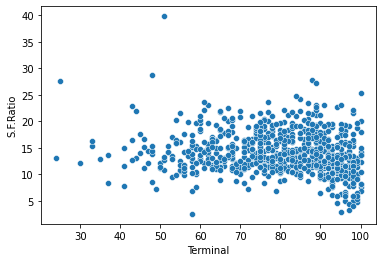

In [222]:
sns.scatterplot(x='Terminal', y='S.F.Ratio', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

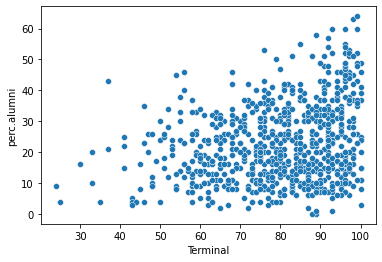

In [223]:
sns.scatterplot(x='Terminal', y='perc.alumni', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

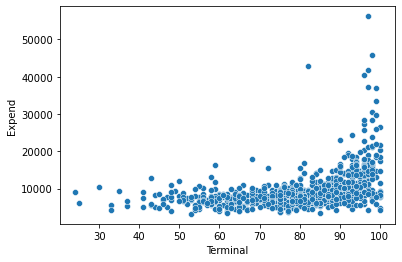

In [224]:
sns.scatterplot(x='Terminal', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

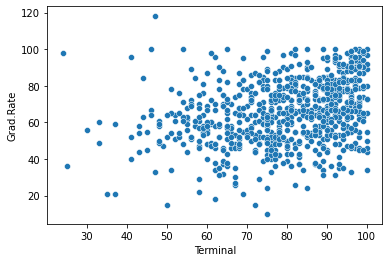

In [225]:
sns.scatterplot(x='Terminal', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

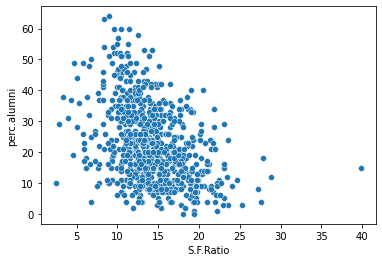

In [226]:
sns.scatterplot(x='S.F.Ratio', y='perc.alumni', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

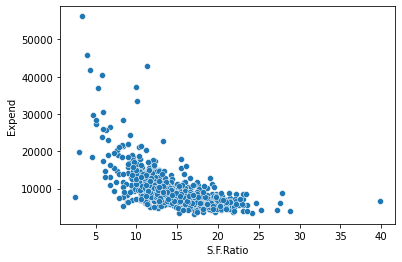

In [227]:
sns.scatterplot(x='S.F.Ratio', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

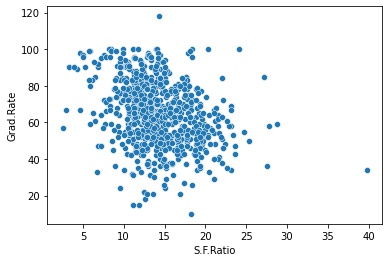

In [228]:
sns.scatterplot(x='S.F.Ratio', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

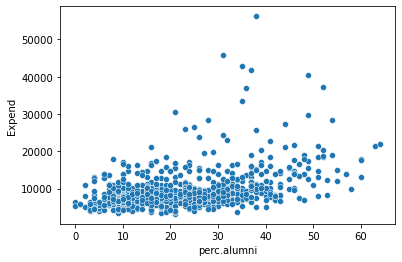

In [229]:
sns.scatterplot(x='perc.alumni', y='Expend', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

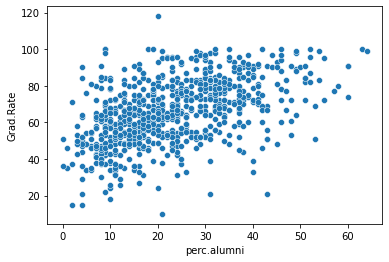

In [230]:
sns.scatterplot(x='perc.alumni', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

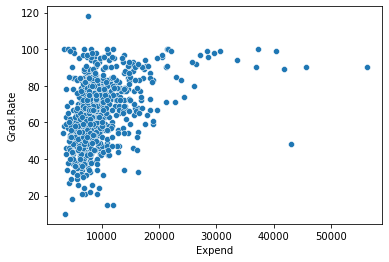

In [231]:
sns.scatterplot(x='Expend', y='Grad.Rate', data=Edu)      
plt.ticklabel_format(style='plain', axis='x')

sns.pairplot(Edu)
plt.show()

In [232]:
Edu.corr()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.00    0.94    0.85       0.34       0.35         0.81   
Accept       0.94    1.00    0.91       0.19       0.25         0.87   
Enroll       0.85    0.91    1.00       0.18       0.23         0.96   
Top10perc    0.34    0.19    0.18       1.00       0.89         0.14   
Top25perc    0.35    0.25    0.23       0.89       1.00         0.20   
F.Undergrad  0.81    0.87    0.96       0.14       0.20         1.00   
P.Undergrad  0.40    0.44    0.51      -0.11      -0.05         0.57   
Outstate     0.05   -0.03   -0.16       0.56       0.49        -0.22   
Room.Board   0.16    0.09   -0.04       0.37       0.33        -0.07   
Books        0.13    0.11    0.11       0.12       0.12         0.12   
Personal     0.18    0.20    0.28      -0.09      -0.08         0.32   
PhD          0.39    0.36    0.33       0.53       0.55         0.32   
Terminal     0.37    0.34    0.31       0.49       0.52         0.30   
S.F.Ratio    0.10    0.18    0.24      -0.38      -0.29         0.28   
perc.alumni -0.09   -0.16   -0.18       0.46       0.42        -0.23   
Expend       0.26    0.12    0.06       0.66       0.53         0.02   
Grad.Rate    0.15    0.07   -0.02       0.49       0.48        -0.08   

             P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  \
Apps                0.40      0.05        0.16   0.13      0.18  0.39   
Accept              0.44     -0.03        0.09   0.11      0.20  0.36   
Enroll              0.51     -0.16       -0.04   0.11      0.28  0.33   
Top10perc          -0.11      0.56        0.37   0.12     -0.09  0.53   
Top25perc          -0.05      0.49        0.33   0.12     -0.08  0.55   
F.Undergrad         0.57     -0.22       -0.07   0.12      0.32  0.32   
P.Undergrad         1.00     -0.25       -0.06   0.08      0.32  0.15   
Outstate           -0.25      1.00        0.65   0.04     -0.30  0.38   
Room.Board         -0.06      0.65        1.00   0.13     -0.20  0.33   
Books               0.08      0.04        0.13   1.00      0.18  0.03   
Personal            0.32     -0.30       -0.20   0.18      1.00 -0.01   
PhD                 0.15      0.38        0.33   0.03     -0.01  1.00   
Terminal            0.14      0.41        0.37   0.10     -0.03  0.85   
S.F.Ratio           0.23     -0.55       -0.36  -0.03      0.14 -0.13   
perc.alumni        -0.28      0.57        0.27  -0.04     -0.29  0.25   
Expend             -0.08      0.67        0.50   0.11     -0.10  0.43   
Grad.Rate          -0.26      0.57        0.42   0.00     -0.27  0.31   

             Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Apps             0.37       0.10        -0.09    0.26       0.15  
Accept           0.34       0.18        -0.16    0.12       0.07  
Enroll           0.31       0.24        -0.18    0.06      -0.02  
Top10perc        0.49      -0.38         0.46    0.66       0.49  
Top25perc        0.52      -0.29         0.42    0.53       0.48  
F.Undergrad      0.30       0.28        -0.23    0.02      -0.08  
P.Undergrad      0.14       0.23        -0.28   -0.08      -0.26  
Outstate         0.41      -0.55         0.57    0.67       0.57  
Room.Board       0.37      -0.36         0.27    0.50       0.42  
Books            0.10      -0.03        -0.04    0.11       0.00  
Personal        -0.03       0.14        -0.29   -0.10      -0.27  
PhD              0.85      -0.13         0.25    0.43       0.31  
Terminal         1.00      -0.16         0.27    0.44       0.29  
S.F.Ratio       -0.16       1.00        -0.40   -0.58      -0.31  
perc.alumni      0.27      -0.40         1.00    0.42       0.49  
Expend           0.44      -0.58         0.42    1.00       0.39  
Grad.Rate        0.29      -0.31         0.49    0.39       1.00

In [233]:
corr= Edu.corr(method='pearson')

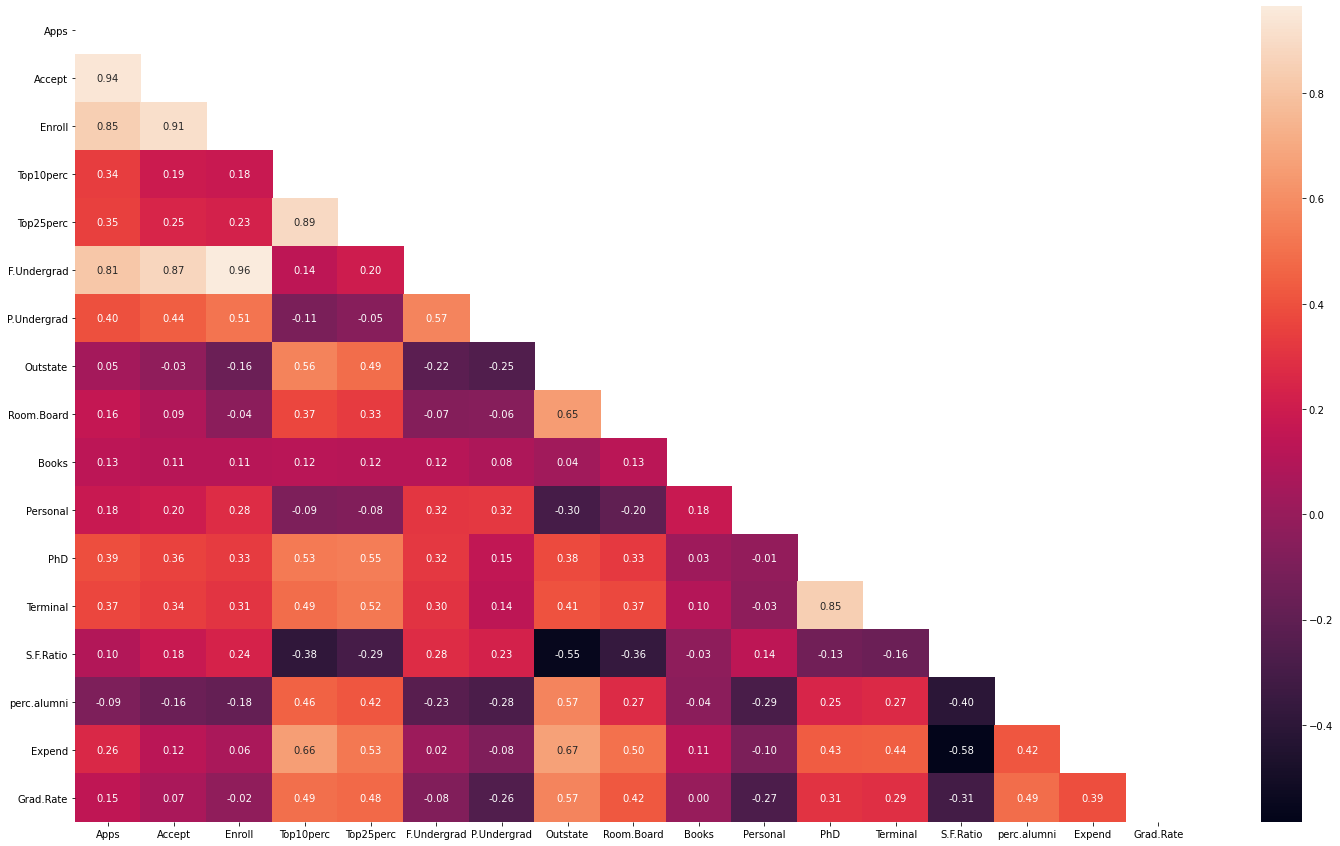

In [234]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(Edu.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

#### 2.2. Is scaling necessary for PCA in this case? Give justification and perform scaling.

PCA projects calculates a new projection based on variance/Variability (Std Deviation) of the  variable in consideration. This means variables with higher Std Dev will have higher weightage. In the normalized data where we have 'Zero' as mean and 'One' as Std deviation we will have same weight and the PCA calculates relevent axis to consider.

Secondly the unit of measurement of the variables includes (Numbers, Currency, Percentage, Ratio) getting a lot of difference within their magnitude

To Summarize, Reason that we should scale the data is 

* In the unscaled data std Deviation varies from 4 to 5000.
* In the unscaled data Mean varies from 14 to 10000.
* Variable and their varied Measurement of Units

    Variable	    Unit
      Apps	        Number
      Accept        Number
      Enroll	    Number
      Top10perc  	Percentage
      Top25perc 	Percentage
      F.Undergrad	Number
      P.Undergrad	Number    
      Outstate	    Number
      Room.Board	Currency
      Books	        Currency
      Personal	    Currency
      PhD	        Percentage
      Terminal	    Percentage
      S.F.Ratio	    Ratio
      perc.alumni	Percentage
      Expend	    Currency
      Grad.Rate	    Percentage

In [235]:
Edu.describe()

Apps   Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
count   777.00   777.00  777.00     777.00     777.00       777.00   
mean   3001.64  2018.80  779.97      27.56      55.80      3699.91   
std    3870.20  2451.11  929.18      17.64      19.80      4850.42   
min      81.00    72.00   35.00       1.00       9.00       139.00   
25%     776.00   604.00  242.00      15.00      41.00       992.00   
50%    1558.00  1110.00  434.00      23.00      54.00      1707.00   
75%    3624.00  2424.00  902.00      35.00      69.00      4005.00   
max   48094.00 26330.00 6392.00      96.00     100.00     31643.00   

       P.Undergrad  Outstate  Room.Board   Books  Personal    PhD  Terminal  \
count       777.00    777.00      777.00  777.00    777.00 777.00    777.00   
mean        855.30  10440.67     4357.53  549.38   1340.64  72.66     79.70   
std        1522.43   4023.02     1096.70  165.11    677.07  16.33     14.72   
min           1.00   2340.00     1780.00   96.00    250.00   8.00     24.00   
25%          95.00   7320.00     3597.00  470.00    850.00  62.00     71.00   
50%         353.00   9990.00     4200.00  500.00   1200.00  75.00     82.00   
75%         967.00  12925.00     5050.00  600.00   1700.00  85.00     92.00   
max       21836.00  21700.00     8124.00 2340.00   6800.00 103.00    100.00   

       S.F.Ratio  perc.alumni   Expend  Grad.Rate  
count     777.00       777.00   777.00     777.00  
mean       14.09        22.74  9660.17      65.46  
std         3.96        12.39  5221.77      17.18  
min         2.50         0.00  3186.00      10.00  
25%        11.50        13.00  6751.00      53.00  
50%        13.60        21.00  8377.00      65.00  
75%        16.50        31.00 10830.00      78.00  
max        39.80        64.00 56233.00     118.00

In [236]:
from scipy.stats import zscore
Edu_num = Edu.select_dtypes(include = ['float64', 'int64'])
Edu_cat=Edu.select_dtypes(include = ['object'])
Edu_num_scaled=Edu_num.apply(zscore)
Edu_num_scaled.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0 -0.35   -0.32   -0.06      -0.26      -0.19        -0.17        -0.21   
1 -0.21   -0.04   -0.29      -0.66      -1.35        -0.21         0.24   
2 -0.41   -0.38   -0.48      -0.32      -0.29        -0.55        -0.50   
3 -0.67   -0.68   -0.69       1.84       1.68        -0.66        -0.52   
4 -0.73   -0.76   -0.78      -0.66      -0.60        -0.71         0.01   

   Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0     -0.75       -0.96  -0.60      1.27 -0.16     -0.12       1.01   
1      0.46        1.91   1.22      0.24 -2.68     -3.38      -0.48   
2      0.20       -0.55  -0.91     -0.26 -1.20     -0.93      -0.30   
3      0.63        1.00  -0.60     -0.69  1.19      1.18      -1.62   
4     -0.72       -0.22   1.52      0.24  0.20     -0.52      -0.55   

   perc.alumni  Expend  Grad.Rate  
0        -0.87   -0.50      -0.32  
1        -0.54    0.17      -0.55  
2         0.59   -0.18      -0.67  
3         1.15    1.79      -0.38  
4        -1.68    0.24      -2.94

In [347]:
Edu_num_scaled.describe()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
count 777.00  777.00  777.00     777.00     777.00       777.00       777.00   
mean    0.00    0.00   -0.00      -0.00      -0.00        -0.00        -0.00   
std     1.00    1.00    1.00       1.00       1.00         1.00         1.00   
min    -0.76   -0.79   -0.80      -1.51      -2.36        -0.73        -0.56   
25%    -0.58   -0.58   -0.58      -0.71      -0.75        -0.56        -0.50   
50%    -0.37   -0.37   -0.37      -0.26      -0.09        -0.41        -0.33   
75%     0.16    0.17    0.13       0.42       0.67         0.06         0.07   
max    11.66    9.92    6.04       3.88       2.23         5.76        13.79   

       Outstate  Room.Board  Books  Personal    PhD  Terminal  S.F.Ratio  \
count    777.00      777.00 777.00    777.00 777.00    777.00     777.00   
mean       0.00        0.00  -0.00      0.00   0.00     -0.00      -0.00   
std        1.00        1.00   1.00      1.00   1.00      1.00       1.00   
min       -2.01       -2.35  -2.75     -1.61  -3.96     -3.79      -2.93   
25%       -0.78       -0.69  -0.48     -0.73  -0.65     -0.59      -0.65   
50%       -0.11       -0.14  -0.30     -0.21   0.14      0.16      -0.12   
75%        0.62        0.63   0.31      0.53   0.76      0.84       0.61   
max        2.80        3.44  10.85      8.07   1.86      1.38       6.50   

       perc.alumni  Expend  Grad.Rate  
count       777.00  777.00     777.00  
mean         -0.00    0.00       0.00  
std           1.00    1.00       1.00  
min          -1.84   -1.24      -3.23  
25%          -0.79   -0.56      -0.73  
50%          -0.14   -0.25      -0.03  
75%           0.67    0.22       0.73  
max           3.33    8.92       3.06

In [237]:
Edu_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    float64
 5   F.Undergrad  777 non-null    float64
 6   P.Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room.Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad.Rate    777 non-null    float64
dtypes: float64(17)
memory usage: 103.3 KB


#### 2.3. Comment on the comparison between the covariance and the correlation matrices from this data [on scaled data].

In [349]:
# Step 1- Create the covariance Matrix
cov_matrix = np.cov(Edu_num.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.49784595e+07  8.94985981e+06  3.04525599e+06  2.31327731e+04
   2.69526635e+04  1.52897025e+07  2.34662015e+06  7.80970356e+05
   7.00072872e+05  8.47037526e+04  4.68346833e+05  2.46894337e+04
   2.10530676e+04  1.46506058e+03 -4.32712238e+03  5.24617110e+06
   9.75642164e+03]
 [ 8.94985981e+06  6.00795970e+06  2.07626776e+06  8.32112487e+03
   1.20134048e+04  1.03935824e+07  1.64666972e+06 -2.53962285e+05
   2.44347147e+05  4.59428079e+04  3.33556631e+05  1.42382015e+04
   1.21820938e+04  1.70983819e+03 -4.85948702e+03  1.59627169e+06
   2.83416292e+03]
 [ 3.04525599e+06  2.07626776e+06  8.63368392e+05  2.97158341e+03
   4.17259244e+03  4.34752988e+06  7.25790674e+05 -5.81188483e+05
  -4.09970592e+04  1.72911997e+04  1.76737970e+05  5.02896117e+03
   4.21708603e+03  8.72684773e+02 -2.08169379e+03  3.11345431e+05
  -3.56587977e+02]
 [ 2.31327731e+04  8.32112487e+03  2.97158341e+03  3.11182456e+02
   3.11630480e+02  1.20891137e+04 -2.82947498e+03  3.99071798e+

In [351]:
df_cov_matrix=pd.DataFrame(cov_matrix)

In [239]:
# Step2- Create the Correlation Matrix
corr_matrix = np.cov(Edu_num_scaled.T)
print('Correlation Matrix \n%s', corr_matrix)

Correlation Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.0809144

In [360]:
df_corr_matrix=pd.DataFrame(corr_matrix)

In [361]:
pd.concat([df_cov_matrix, df_corr_matrix],axis=0, sort=False)

0           1          2        3        4           5   \
0  14978459.53  8949859.81 3045255.99 23132.77 26952.66 15289702.47   
1   8949859.81  6007959.70 2076267.76  8321.12 12013.40 10393582.44   
2   3045255.99  2076267.76  863368.39  2971.58  4172.59  4347529.88   
3     23132.77     8321.12    2971.58   311.18   311.63    12089.11   
4     26952.66    12013.40    4172.59   311.63   392.23    19158.95   
5  15289702.47 10393582.44 4347529.88 12089.11 19158.95 23526579.33   
6   2346620.15  1646669.72  725790.67 -2829.47 -1615.41  4212910.09   
7    780970.36  -253962.29 -581188.48 39907.18 38992.43 -4209843.04   
8    700072.87   244347.15  -40997.06  7186.71  7199.90  -366458.22   
9     84703.75    45942.81   17291.20   346.18   377.76    92535.76   
10   468346.83   333556.63  176737.97 -1114.55 -1083.61  1041709.09   
11    24689.43    14238.20    5028.96   153.18   176.52    25211.78   
12    21053.07    12182.09    4217.09   127.55   153.00    21424.24   
13     1465.06     1709.84     872.68   -26.87   -23.10     5370.21   
14    -4327.12    -4859.49   -2081.69    99.57   102.55   -13791.93   
15  5246171.10  1596271.69  311345.43 60879.31 54546.48   472403.96   
16     9756.42     2834.16    -356.59   149.99   162.37    -6563.31   
0         1.00        0.94       0.85     0.34     0.35        0.82   
1         0.94        1.00       0.91     0.19     0.25        0.88   
2         0.85        0.91       1.00     0.18     0.23        0.97   
3         0.34        0.19       0.18     1.00     0.89        0.14   
4         0.35        0.25       0.23     0.89     1.00        0.20   
5         0.82        0.88       0.97     0.14     0.20        1.00   
6         0.40        0.44       0.51    -0.11    -0.05        0.57   
7         0.05       -0.03      -0.16     0.56     0.49       -0.22   
8         0.17        0.09      -0.04     0.37     0.33       -0.07   
9         0.13        0.11       0.11     0.12     0.12        0.12   
10        0.18        0.20       0.28    -0.09    -0.08        0.32   
11        0.39        0.36       0.33     0.53     0.55        0.32   
12        0.37        0.34       0.31     0.49     0.53        0.30   
13        0.10        0.18       0.24    -0.39    -0.30        0.28   
14       -0.09       -0.16      -0.18     0.46     0.42       -0.23   
15        0.26        0.12       0.06     0.66     0.53        0.02   
16        0.15        0.07      -0.02     0.50     0.48       -0.08   

            6           7          8        9          10       11       12  \
0   2346620.15   780970.36  700072.87 84703.75  468346.83 24689.43 21053.07   
1   1646669.72  -253962.29  244347.15 45942.81  333556.63 14238.20 12182.09   
2    725790.67  -581188.48  -40997.06 17291.20  176737.97  5028.96  4217.09   
3     -2829.47    39907.18    7186.71   346.18   -1114.55   153.18   127.55   
4     -1615.41    38992.43    7199.90   377.76   -1083.61   176.52   153.00   
5   4212910.09 -4209843.04 -366458.22 92535.76 1041709.09 25211.78 21424.24   
6   2317798.85 -1552704.28 -102391.86 20410.45  329732.43  3706.76  3180.60   
7  -1552704.28 16184661.63 2886597.39 25808.24 -814673.72 25157.52 24164.15   
8   -102391.86  2886597.39 1202743.03 23170.31 -148083.77  5895.03  6047.30   
9     20410.45    25808.24   23170.31 27259.78   20043.03    72.53   242.96   
10   329732.43  -814673.72 -148083.77 20043.03  458425.75  -120.90  -305.15   
11     3706.76    25157.52    5895.03    72.53    -120.90   266.61   204.23   
12     3180.60    24164.15    6047.30   242.96    -305.15   204.23   216.75   
13     1401.30    -8835.25   -1574.21   -20.87     365.42    -8.44    -9.33   
14    -5297.34    28229.55    3701.43   -82.26   -2399.31    50.38    48.73   
15  -664351.15 14133235.71 2873308.48 96912.58 -346097.80 36898.06 33733.46   
16    -6721.06    39479.68    8005.36     3.01   -3132.61    85.56    73.22   
0         0.40        0.05       0.17     0.13       0.18     0.39     0.37   
1         0.44       -0.0

Covariance MAtrix shows how two variables vary together, if they are directly or inversly proportionate. It doesnt show the dependency of one variable on other. since this exercise is done on the uanscaled data it doesn't tell us anything about magnitude. Covariance with the same variable varies between 15 to as high as 23526579.


Correlation MAtrix shows how two variables vary together, if they are directly or inversly proportionate as well as strength of their relationship. since this exercise is done on the Scaled data magnitude becomes insignificant. Correlation with the same variable is always 1.

Negative Co-variance remains negative even within the correlation matrix so scaling doesnt change the edirection but it does tell us how strong is the relationship

#### 2.4. Check the dataset for outliers before and after scaling. What insight do you derive here? [Please do not treat Outliers unless specifically asked to do so]

<AxesSubplot:xlabel='Apps', ylabel='Density'>

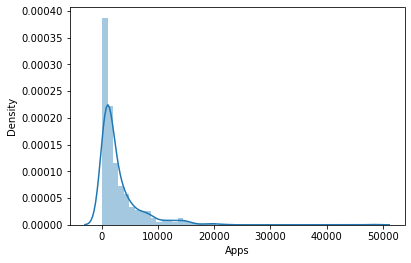

In [240]:
sns.distplot(Edu_num['Apps'])

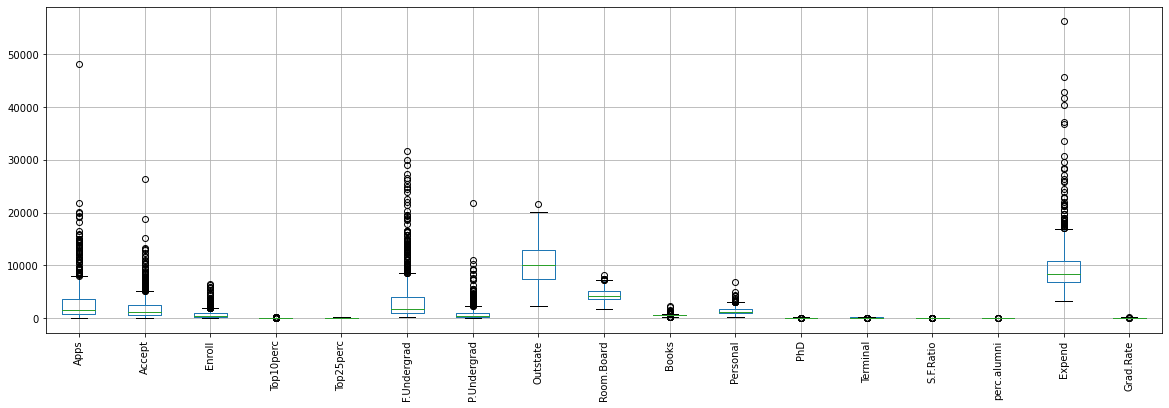

In [241]:
Edu_num.boxplot(figsize=(20,6))
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Apps', ylabel='Density'>

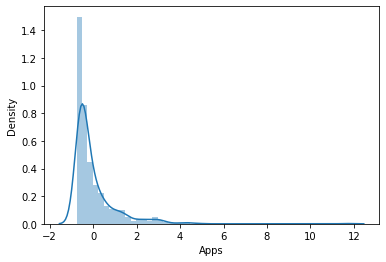

In [242]:
sns.distplot(Edu_num_scaled['Apps'])

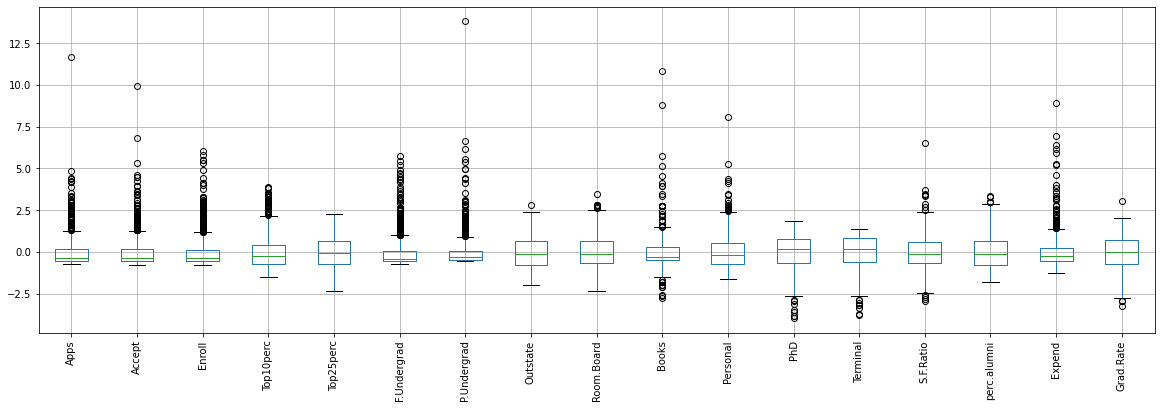

In [243]:
Edu_num_scaled.boxplot(figsize=(20,6))
plt.xticks(rotation=90)
plt.show()

In [381]:
Sort_Apps=np.sort(Edu_num['Apps'])
Count_Apps=Edu_num['Apps'].count()
Q1_Apps=np.percentile(Edu_num['Apps'],25, interpolation = 'midpoint')
Q2_Apps=np.percentile(Edu_num['Apps'],50, interpolation = 'midpoint')
Q3_Apps=np.percentile(Edu_num['Apps'],75, interpolation = 'midpoint')
IQR_Apps=Q3_Apps-Q1_Apps
Low_Apps=Q1_Apps-1.5*IQR_Apps
High_Apps=Q3_Apps+1.5*IQR_Apps
Outlier_Apps=[]
for x in Sort_Apps:
    if (( x>High_Apps) or ( x<Low_Apps)):
        Outlier_Apps.append(x)

Sort_Accept=np.sort(Edu_num['Accept'])
Count_Accept=Edu_num['Accept'].count()
Q1_Accept=np.percentile(Edu_num['Accept'],25, interpolation = 'midpoint')
Q2_Accept=np.percentile(Edu_num['Accept'],50, interpolation = 'midpoint')
Q3_Accept=np.percentile(Edu_num['Accept'],75, interpolation = 'midpoint')
IQR_Accept=Q3_Accept-Q1_Accept
Low_Accept=Q1_Accept-1.5*IQR_Accept
High_Accept=Q3_Accept+1.5*IQR_Accept
Outlier_Accept=[]
for x in Sort_Accept:
    if (( x>High_Accept) or ( x<Low_Accept)):
        Outlier_Accept.append(x)



Sort_Enroll=np.sort(Edu_num['Enroll'])
Count_Enroll=Edu_num['Enroll'].count()
Q1_Enroll=np.percentile(Edu_num['Enroll'],25, interpolation = 'midpoint')
Q2_Enroll=np.percentile(Edu_num['Enroll'],50, interpolation = 'midpoint')
Q3_Enroll=np.percentile(Edu_num['Enroll'],75, interpolation = 'midpoint')
IQR_Enroll=Q3_Enroll-Q1_Enroll
Low_Enroll=Q1_Enroll-1.5*IQR_Enroll
High_Enroll=Q3_Enroll+1.5*IQR_Enroll
Outlier_Enroll=[]
for x in Sort_Enroll:
    if (( x>High_Enroll) or ( x<Low_Enroll)):
        Outlier_Enroll.append(x)


Sort_Top10perc=np.sort(Edu_num['Top10perc'])
Count_Top10perc=Edu_num['Top10perc'].count()
Q1_Top10perc=np.percentile(Edu_num['Top10perc'],25, interpolation = 'midpoint')
Q2_Top10perc=np.percentile(Edu_num['Top10perc'],50, interpolation = 'midpoint')
Q3_Top10perc=np.percentile(Edu_num['Top10perc'],75, interpolation = 'midpoint')
IQR_Top10perc=Q3_Top10perc-Q1_Top10perc
Low_Top10perc=Q1_Top10perc-1.5*IQR_Top10perc
High_Top10perc=Q3_Top10perc+1.5*IQR_Top10perc
Outlier_Top10perc=[]
for x in Sort_Top10perc:
    if (( x>High_Top10perc) or ( x<Low_Top10perc)):
        Outlier_Top10perc.append(x)

Sort_Top25perc=np.sort(Edu_num['Top25perc'])
Count_Top25perc=Edu_num['Top25perc'].count()
Q1_Top25perc=np.percentile(Edu_num['Top25perc'],25, interpolation = 'midpoint')
Q2_Top25perc=np.percentile(Edu_num['Top25perc'],50, interpolation = 'midpoint')
Q3_Top25perc=np.percentile(Edu_num['Top25perc'],75, interpolation = 'midpoint')
IQR_Top25perc=Q3_Top25perc-Q1_Top25perc
Low_Top25perc=Q1_Top25perc-1.5*IQR_Top25perc
High_Top25perc=Q3_Top25perc+1.5*IQR_Top25perc
Outlier_Top25perc=[]
for x in Sort_Top25perc:
    if (( x>High_Top25perc) or ( x<Low_Top25perc)):
        Outlier_Top25perc.append(x)

Sort_F_Undergrad=np.sort(Edu_num['F.Undergrad'])
Count_F_Undergrad=Edu_num['F.Undergrad'].count()
Q1_F_Undergrad=np.percentile(Edu_num['F.Undergrad'],25, interpolation = 'midpoint')
Q2_F_Undergrad=np.percentile(Edu_num['F.Undergrad'],50, interpolation = 'midpoint')
Q3_F_Undergrad=np.percentile(Edu_num['F.Undergrad'],75, interpolation = 'midpoint')
IQR_F_Undergrad=Q3_F_Undergrad-Q1_F_Undergrad
Low_F_Undergrad=Q1_F_Undergrad-1.5*IQR_F_Undergrad
High_F_Undergrad=Q3_F_Undergrad+1.5*IQR_F_Undergrad
Outlier_F_Undergrad=[]
for x in Sort_F_Undergrad:
    if (( x>High_F_Undergrad) or ( x<Low_F_Undergrad)):
        Outlier_F_Undergrad.append(x)

Sort_P_Undergrad=np.sort(Edu_num['P.Undergrad'])
Count_P_Undergrad=Edu_num['P.Undergrad'].count()
Q1_P_Undergrad=np.percentile(Edu_num['P.Undergrad'],25, interpolation = 'midpoint')
Q2_P_Undergrad=np.percentile(Edu_num['P.Undergrad'],50, interpolation = 'midpoint')
Q3_P_Undergrad=np.percentile(Edu_num['P.Undergrad'],75, interpolation = 'midpoint')
IQR_P_Undergrad=Q3_P_Undergrad-Q1_P_Undergrad
Low_P_Undergrad=Q1_P_Undergrad-1.5*IQR_P_Undergrad
High_P_Undergrad=Q3_P_Undergrad+1.5*IQR_P_Undergrad
Outlier_P_Undergrad=[]
for x in Sort_P_Undergrad:
    if (( x>High_P_Undergrad) or ( x<Low_P_Undergrad)):
        Outlier_P_Undergrad.append(x)

Sort_Outstate=np.sort(Edu_num['Outstate'])
Count_Outstate=Edu_num['Outstate'].count()
Q1_Outstate=np.percentile(Edu_num['Outstate'],25, interpolation = 'midpoint')
Q2_Outstate=np.percentile(Edu_num['Outstate'],50, interpolation = 'midpoint')
Q3_Outstate=np.percentile(Edu_num['Outstate'],75, interpolation = 'midpoint')
IQR_Outstate=Q3_Outstate-Q1_Outstate
Low_Outstate=Q1_Outstate-1.5*IQR_Outstate
High_Outstate=Q3_Outstate+1.5*IQR_Outstate
Outlier_Outstate=[]
for x in Sort_Outstate:
    if (( x>High_Outstate) or ( x<Low_Outstate)):
        Outlier_Outstate.append(x)

Sort_Room_Board=np.sort(Edu_num['Room.Board'])
Count_Room_Board=Edu_num['Room.Board'].count()
Q1_Room_Board=np.percentile(Edu_num['Room.Board'],25, interpolation = 'midpoint')
Q2_Room_Board=np.percentile(Edu_num['Room.Board'],50, interpolation = 'midpoint')
Q3_Room_Board=np.percentile(Edu_num['Room.Board'],75, interpolation = 'midpoint')
IQR_Room_Board=Q3_Room_Board-Q1_Room_Board
Low_Room_Board=Q1_Room_Board-1.5*IQR_Room_Board
High_Room_Board=Q3_Room_Board+1.5*IQR_Room_Board
Outlier_Room_Board=[]
for x in Sort_Room_Board:
    if (( x>High_Room_Board) or ( x<Low_Room_Board)):
        Outlier_Room_Board.append(x)

Sort_Books=np.sort(Edu_num['Books'])
Count_Books=Edu_num['Books'].count()
Q1_Books=np.percentile(Edu_num['Books'],25, interpolation = 'midpoint')
Q2_Books=np.percentile(Edu_num['Books'],50, interpolation = 'midpoint')
Q3_Books=np.percentile(Edu_num['Books'],75, interpolation = 'midpoint')
IQR_Books=Q3_Books-Q1_Books
Low_Books=Q1_Books-1.5*IQR_Books
High_Books=Q3_Books+1.5*IQR_Books
Outlier_Books=[]
for x in Sort_Books:
    if (( x>High_Books) or ( x<Low_Books)):
        Outlier_Books.append(x)

Sort_Personal=np.sort(Edu_num['Personal'])
Count_Personal=Edu_num['Personal'].count()
Q1_Personal=np.percentile(Edu_num['Personal'],25, interpolation = 'midpoint')
Q2_Personal=np.percentile(Edu_num['Personal'],50, interpolation = 'midpoint')
Q3_Personal=np.percentile(Edu_num['Personal'],75, interpolation = 'midpoint')
IQR_Personal=Q3_Personal-Q1_Personal
Low_Personal=Q1_Personal-1.5*IQR_Personal
High_Personal=Q3_Personal+1.5*IQR_Personal
Outlier_Personal=[]
for x in Sort_Personal:
    if (( x>High_Personal) or ( x<Low_Personal)):
        Outlier_Personal.append(x)

Sort_PhD=np.sort(Edu_num['PhD'])
Count_PhD=Edu_num['PhD'].count()
Q1_PhD=np.percentile(Edu_num['PhD'],25, interpolation = 'midpoint')
Q2_PhD=np.percentile(Edu_num['PhD'],50, interpolation = 'midpoint')
Q3_PhD=np.percentile(Edu_num['PhD'],75, interpolation = 'midpoint')
IQR_PhD=Q3_PhD-Q1_PhD
Low_PhD=Q1_PhD-1.5*IQR_PhD
High_PhD=Q3_PhD+1.5*IQR_PhD
Outlier_PhD=[]
for x in Sort_PhD:
    if (( x>High_PhD) or ( x<Low_PhD)):
        Outlier_PhD.append(x)

Sort_Terminal=np.sort(Edu_num['Terminal'])
Count_Terminal=Edu_num['Terminal'].count()
Q1_Terminal=np.percentile(Edu_num['Terminal'],25, interpolation = 'midpoint')
Q2_Terminal=np.percentile(Edu_num['Terminal'],50, interpolation = 'midpoint')
Q3_Terminal=np.percentile(Edu_num['Terminal'],75, interpolation = 'midpoint')
IQR_Terminal=Q3_Terminal-Q1_Terminal
Low_Terminal=Q1_Terminal-1.5*IQR_Terminal
High_Terminal=Q3_Terminal+1.5*IQR_Terminal
Outlier_Terminal=[]
for x in Sort_Terminal:
    if (( x>High_Terminal) or ( x<Low_Terminal)):
        Outlier_Terminal.append(x)

Sort_S_F_Ratio=np.sort(Edu_num['S.F.Ratio'])
Count_S_F_Ratio=Edu_num['S.F.Ratio'].count()
Q1_S_F_Ratio=np.percentile(Edu_num['S.F.Ratio'],25, interpolation = 'midpoint')
Q2_S_F_Ratio=np.percentile(Edu_num['S.F.Ratio'],50, interpolation = 'midpoint')
Q3_S_F_Ratio=np.percentile(Edu_num['S.F.Ratio'],75, interpolation = 'midpoint')
IQR_S_F_Ratio=Q3_S_F_Ratio-Q1_S_F_Ratio
Low_S_F_Ratio=Q1_S_F_Ratio-1.5*IQR_S_F_Ratio
High_S_F_Ratio=Q3_S_F_Ratio+1.5*IQR_S_F_Ratio
Outlier_S_F_Ratio=[]
for x in Sort_S_F_Ratio:
    if (( x>High_S_F_Ratio) or ( x<Low_S_F_Ratio)):
        Outlier_S_F_Ratio.append(x)

Sort_perc_alumni=np.sort(Edu_num['perc.alumni'])
Count_perc_alumni=Edu_num['perc.alumni'].count()
Q1_perc_alumni=np.percentile(Edu_num['perc.alumni'],25, interpolation = 'midpoint')
Q2_perc_alumni=np.percentile(Edu_num['perc.alumni'],50, interpolation = 'midpoint')
Q3_perc_alumni=np.percentile(Edu_num['perc.alumni'],75, interpolation = 'midpoint')
IQR_perc_alumni=Q3_perc_alumni-Q1_perc_alumni
Low_perc_alumni=Q1_perc_alumni-1.5*IQR_perc_alumni
High_perc_alumni=Q3_perc_alumni+1.5*IQR_perc_alumni
Outlier_perc_alumni=[]
for x in Sort_perc_alumni:
    if (( x>High_perc_alumni) or ( x<Low_perc_alumni)):
        Outlier_perc_alumni.append(x)

Sort_Expend=np.sort(Edu_num['Expend'])
Count_Expend=Edu_num['Expend'].count()
Q1_Expend=np.percentile(Edu_num['Expend'],25, interpolation = 'midpoint')
Q2_Expend=np.percentile(Edu_num['Expend'],50, interpolation = 'midpoint')
Q3_Expend=np.percentile(Edu_num['Expend'],75, interpolation = 'midpoint')
IQR_Expend=Q3_Expend-Q1_Expend
Low_Expend=Q1_Expend-1.5*IQR_Expend
High_Expend=Q3_Expend+1.5*IQR_Expend
Outlier_Expend=[]
for x in Sort_Expend:
    if (( x>High_Expend) or ( x<Low_Expend)):
        Outlier_Expend.append(x)

Sort_Grad_Rate=np.sort(Edu_num['Grad.Rate'])
Count_Grad_Rate=Edu_num['Grad.Rate'].count()
Q1_Grad_Rate=np.percentile(Edu_num['Grad.Rate'],25, interpolation = 'midpoint')
Q2_Grad_Rate=np.percentile(Edu_num['Grad.Rate'],50, interpolation = 'midpoint')
Q3_Grad_Rate=np.percentile(Edu_num['Grad.Rate'],75, interpolation = 'midpoint')
IQR_Grad_Rate=Q3_Grad_Rate-Q1_Grad_Rate
Low_Grad_Rate=Q1_Grad_Rate-1.5*IQR_Grad_Rate
High_Grad_Rate=Q3_Grad_Rate+1.5*IQR_Grad_Rate
Outlier_Grad_Rate=[]
for x in Sort_Grad_Rate:
    if (( x>High_Grad_Rate) or ( x<Low_Grad_Rate)):
        Outlier_Grad_Rate.append(x)


print('There are ',len(Outlier_Apps), ' outliers for "Apps" is',round(len(Outlier_Apps) * 100/ Count_Apps,2),'% of total and  which are lower than ' , Low_Apps , ' Or Higher than ', High_Apps)
print('There are ',len(Outlier_Accept), ' outliers for "Accept" is',round(len(Outlier_Accept) * 100/ Count_Accept,2),'% of total and  which are lower than ' , Low_Accept , ' Or Higher than ', High_Accept)
print('There are ',len(Outlier_Enroll), ' outliers for "Enroll" is',round(len(Outlier_Enroll) * 100/ Count_Enroll,2),'% of total and  which are lower than ' , Low_Enroll , ' Or Higher than ', High_Enroll)
print('There are ',len(Outlier_Top10perc), ' outliers for "Top10perc" is',round(len(Outlier_Top10perc) * 100/ Count_Top10perc,2),'% of total and  which are lower than ' , Low_Top10perc , ' Or Higher than ', High_Top10perc)
print('There are ',len(Outlier_Top25perc), ' outliers for "Top25perc" is',round(len(Outlier_Top25perc) * 100/ Count_Top25perc,2),'% of total and  which are lower than ' , Low_Top25perc , ' Or Higher than ', High_Top25perc)
print('There are ',len(Outlier_F_Undergrad), ' outliers for "F_Undergrad" is',round(len(Outlier_F_Undergrad) * 100/ Count_F_Undergrad,2),'% of total and  which are lower than ' , Low_F_Undergrad , ' Or Higher than ', High_F_Undergrad)
print('There are ',len(Outlier_P_Undergrad), ' outliers for "P_Undergrad" is',round(len(Outlier_P_Undergrad) * 100/ Count_P_Undergrad,2),'% of total and  which are lower than ' , Low_P_Undergrad , ' Or Higher than ', High_P_Undergrad)
print('There are ',len(Outlier_Outstate), ' outliers for "Outstate" is',round(len(Outlier_Outstate) * 100/ Count_Outstate,2),'% of total and  which are lower than ' , Low_Outstate , ' Or Higher than ', High_Outstate)
print('There are ',len(Outlier_Room_Board), ' outliers for "Room_Board" is',round(len(Outlier_Room_Board) * 100/ Count_Room_Board,2),'% of total and  which are lower than ' , Low_Room_Board , ' Or Higher than ', High_Room_Board)
print('There are ',len(Outlier_Books), ' outliers for "Books" is',round(len(Outlier_Books) * 100/ Count_Books,2),'% of total and  which are lower than ' , Low_Books , ' Or Higher than ', High_Books)
print('There are ',len(Outlier_Personal), ' outliers for "Personal" is',round(len(Outlier_Personal) * 100/ Count_Personal,2),'% of total and  which are lower than ' , Low_Personal , ' Or Higher than ', High_Personal)
print('There are ',len(Outlier_PhD), ' outliers for "PhD" is',round(len(Outlier_PhD) * 100/ Count_PhD,2),'% of total and  which are lower than ' , Low_PhD , ' Or Higher than ', High_PhD)
print('There are ',len(Outlier_Terminal), ' outliers for "Terminal" is',round(len(Outlier_Terminal) * 100/ Count_Terminal,2),'% of total and  which are lower than ' , Low_Terminal , ' Or Higher than ', High_Terminal)
print('There are ',len(Outlier_S_F_Ratio), ' outliers for "S_F_Ratio" is',round(len(Outlier_S_F_Ratio) * 100/ Count_S_F_Ratio,2),'% of total and  which are lower than ' , Low_S_F_Ratio , ' Or Higher than ', High_S_F_Ratio)
print('There are ',len(Outlier_perc_alumni), ' outliers for "perc_alumni" is',round(len(Outlier_perc_alumni) * 100/ Count_perc_alumni,2),'% of total and  which are lower than ' , Low_perc_alumni , ' Or Higher than ', High_perc_alumni)
print('There are ',len(Outlier_Expend), ' outliers for "Expend" is',round(len(Outlier_Expend) * 100/ Count_Expend,2),'% of total and  which are lower than ' , Low_Expend , ' Or Higher than ', High_Expend)
print('There are ',len(Outlier_Grad_Rate), ' outliers for "Grad_Rate" is',round(len(Outlier_Grad_Rate) * 100/ Count_Grad_Rate,2),'% of total and  which are lower than ' , Low_Grad_Rate , ' Or Higher than ', High_Grad_Rate)

There are  70  outliers for "Apps" is 9.01 % of total and  which are lower than  -3496.0  Or Higher than  7896.0
There are  73  outliers for "Accept" is 9.4 % of total and  which are lower than  -2126.0  Or Higher than  5154.0
There are  79  outliers for "Enroll" is 10.17 % of total and  which are lower than  -748.0  Or Higher than  1892.0
There are  39  outliers for "Top10perc" is 5.02 % of total and  which are lower than  -15.0  Or Higher than  65.0
There are  0  outliers for "Top25perc" is 0.0 % of total and  which are lower than  -1.0  Or Higher than  111.0
There are  97  outliers for "F_Undergrad" is 12.48 % of total and  which are lower than  -3527.5  Or Higher than  8524.5
There are  67  outliers for "P_Undergrad" is 8.62 % of total and  which are lower than  -1213.0  Or Higher than  2275.0
There are  1  outliers for "Outstate" is 0.13 % of total and  which are lower than  -1087.5  Or Higher than  21332.5
There are  7  outliers for "Room_Board" is 0.9 % of total and  which are l

In [382]:
df1=pd.DataFrame([Outlier_Apps])
df2=pd.DataFrame([Outlier_Accept])
df3=pd.DataFrame([Outlier_Enroll])
df4=pd.DataFrame([Outlier_Top10perc])
df5=pd.DataFrame([Outlier_Top25perc])
df6=pd.DataFrame([Outlier_F_Undergrad])
df7=pd.DataFrame([Outlier_P_Undergrad])
df8=pd.DataFrame([Outlier_Outstate])
df9=pd.DataFrame([Outlier_Room_Board])
df10=pd.DataFrame([Outlier_Apps])
df11=pd.DataFrame([Outlier_Personal])
df12=pd.DataFrame([Outlier_PhD])
df13=pd.DataFrame([Outlier_Terminal])
df14=pd.DataFrame([Outlier_S_F_Ratio])
df15=pd.DataFrame([Outlier_perc_alumni])
df16=pd.DataFrame([Outlier_Expend])
df17=pd.DataFrame([Outlier_Grad_Rate])
Outlier=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17],axis=0,sort=False)
Outlier.index =['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc','F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books','Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend','Grad.Rate']
Outlier.T


Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  8000.00 5200.00 1902.00      66.00        nan      8528.00      2281.00   
1  8065.00 5201.00 1906.00      67.00        nan      8544.00      2339.00   
2  8256.00 5232.00 1910.00      68.00        nan      8596.00      2411.00   
3  8384.00 5254.00 1918.00      68.00        nan      8730.00      2456.00   
4  8399.00 5257.00 1921.00      68.00        nan      8894.00      2458.00   
..     ...     ...     ...        ...        ...          ...          ...   
92     nan     nan     nan        nan        nan     26640.00          nan   
93     nan     nan     nan        nan        nan     27378.00          nan   
94     nan     nan     nan        nan        nan     28938.00          nan   
95     nan     nan     nan        nan        nan     30017.00          nan   
96     nan     nan     nan        nan        nan     31643.00          nan   

    Outstate  Room.Board   Books  Personal   PhD  Terminal  S.F.Ratio  \
0   21700.00     7262.00 8000.00   3000.00  8.00     24.00       2.50   
1        nan     7270.00 8065.00   3020.00 10.00     25.00       2.90   
2        nan     7350.00 8256.00   3028.00 10.00     30.00       3.30   
3        nan     7398.00 8384.00   3093.00 14.00     33.00       3.90   
4        nan     7400.00 8399.00   3100.00 16.00     33.00      24.10   
..       ...         ...     ...       ...   ...       ...        ...   
92       nan         nan     nan       nan   nan       nan        nan   
93       nan         nan     nan       nan   nan       nan        nan   
94       nan         nan     nan       nan   nan       nan        nan   
95       nan         nan     nan       nan   nan       nan        nan   
96       nan         nan     nan       nan   nan       nan        nan   

    perc.alumni   Expend  Grad.Rate  
0         60.00 17007.00      10.00  
1         60.00 17089.00      15.00  
2         60.00 17150.00      15.00  
3         63.00 17449.00     118.00  
4         64.00 17500.00        nan  
..          ...      ...        ...  
92          nan      nan        nan  
93          nan      nan        nan  
94          nan      nan        nan  
95          nan      nan        nan  
96          nan      nan        nan  

[97 rows x 17 columns]

In [383]:
Outlier.to_csv('Outlier.csv', index=True)

In [384]:
Sort_Apps=np.sort(Edu_num_scaled['Apps'])
Count_Apps=Edu_num_scaled['Apps'].count()
Q1_Apps=np.percentile(Edu_num_scaled['Apps'],25, interpolation = 'midpoint')
Q2_Apps=np.percentile(Edu_num_scaled['Apps'],50, interpolation = 'midpoint')
Q3_Apps=np.percentile(Edu_num_scaled['Apps'],75, interpolation = 'midpoint')
IQR_Apps=Q3_Apps-Q1_Apps
Low_Apps=Q1_Apps-1.5*IQR_Apps
High_Apps=Q3_Apps+1.5*IQR_Apps
Outlier_Apps=[]
for x in Sort_Apps:
    if (( x>High_Apps) or ( x<Low_Apps)):
        Outlier_Apps.append(x)

Sort_Accept=np.sort(Edu_num_scaled['Accept'])
Count_Accept=Edu_num_scaled['Accept'].count()
Q1_Accept=np.percentile(Edu_num_scaled['Accept'],25, interpolation = 'midpoint')
Q2_Accept=np.percentile(Edu_num_scaled['Accept'],50, interpolation = 'midpoint')
Q3_Accept=np.percentile(Edu_num_scaled['Accept'],75, interpolation = 'midpoint')
IQR_Accept=Q3_Accept-Q1_Accept
Low_Accept=Q1_Accept-1.5*IQR_Accept
High_Accept=Q3_Accept+1.5*IQR_Accept
Outlier_Accept=[]
for x in Sort_Accept:
    if (( x>High_Accept) or ( x<Low_Accept)):
        Outlier_Accept.append(x)

Sort_Enroll=np.sort(Edu_num_scaled['Enroll'])
Count_Enroll=Edu_num_scaled['Enroll'].count()
Q1_Enroll=np.percentile(Edu_num_scaled['Enroll'],25, interpolation = 'midpoint')
Q2_Enroll=np.percentile(Edu_num_scaled['Enroll'],50, interpolation = 'midpoint')
Q3_Enroll=np.percentile(Edu_num_scaled['Enroll'],75, interpolation = 'midpoint')
IQR_Enroll=Q3_Enroll-Q1_Enroll
Low_Enroll=Q1_Enroll-1.5*IQR_Enroll
High_Enroll=Q3_Enroll+1.5*IQR_Enroll
Outlier_Enroll=[]
for x in Sort_Enroll:
    if (( x>High_Enroll) or ( x<Low_Enroll)):
        Outlier_Enroll.append(x)


Sort_Top10perc=np.sort(Edu_num_scaled['Top10perc'])
Count_Top10perc=Edu_num_scaled['Top10perc'].count()
Q1_Top10perc=np.percentile(Edu_num_scaled['Top10perc'],25, interpolation = 'midpoint')
Q2_Top10perc=np.percentile(Edu_num_scaled['Top10perc'],50, interpolation = 'midpoint')
Q3_Top10perc=np.percentile(Edu_num_scaled['Top10perc'],75, interpolation = 'midpoint')
IQR_Top10perc=Q3_Top10perc-Q1_Top10perc
Low_Top10perc=Q1_Top10perc-1.5*IQR_Top10perc
High_Top10perc=Q3_Top10perc+1.5*IQR_Top10perc
Outlier_Top10perc=[]
for x in Sort_Top10perc:
    if (( x>High_Top10perc) or ( x<Low_Top10perc)):
        Outlier_Top10perc.append(x)

Sort_Top25perc=np.sort(Edu_num_scaled['Top25perc'])
Count_Top25perc=Edu_num_scaled['Top25perc'].count()
Q1_Top25perc=np.percentile(Edu_num_scaled['Top25perc'],25, interpolation = 'midpoint')
Q2_Top25perc=np.percentile(Edu_num_scaled['Top25perc'],50, interpolation = 'midpoint')
Q3_Top25perc=np.percentile(Edu_num_scaled['Top25perc'],75, interpolation = 'midpoint')
IQR_Top25perc=Q3_Top25perc-Q1_Top25perc
Low_Top25perc=Q1_Top25perc-1.5*IQR_Top25perc
High_Top25perc=Q3_Top25perc+1.5*IQR_Top25perc
Outlier_Top25perc=[]
for x in Sort_Top25perc:
    if (( x>High_Top25perc) or ( x<Low_Top25perc)):
        Outlier_Top25perc.append(x)

Sort_F_Undergrad=np.sort(Edu_num_scaled['F.Undergrad'])
Count_F_Undergrad=Edu_num_scaled['F.Undergrad'].count()
Q1_F_Undergrad=np.percentile(Edu_num_scaled['F.Undergrad'],25, interpolation = 'midpoint')
Q2_F_Undergrad=np.percentile(Edu_num_scaled['F.Undergrad'],50, interpolation = 'midpoint')
Q3_F_Undergrad=np.percentile(Edu_num_scaled['F.Undergrad'],75, interpolation = 'midpoint')
IQR_F_Undergrad=Q3_F_Undergrad-Q1_F_Undergrad
Low_F_Undergrad=Q1_F_Undergrad-1.5*IQR_F_Undergrad
High_F_Undergrad=Q3_F_Undergrad+1.5*IQR_F_Undergrad
Outlier_F_Undergrad=[]
for x in Sort_F_Undergrad:
    if (( x>High_F_Undergrad) or ( x<Low_F_Undergrad)):
        Outlier_F_Undergrad.append(x)

Sort_P_Undergrad=np.sort(Edu_num_scaled['P.Undergrad'])
Count_P_Undergrad=Edu_num_scaled['P.Undergrad'].count()
Q1_P_Undergrad=np.percentile(Edu_num_scaled['P.Undergrad'],25, interpolation = 'midpoint')
Q2_P_Undergrad=np.percentile(Edu_num_scaled['P.Undergrad'],50, interpolation = 'midpoint')
Q3_P_Undergrad=np.percentile(Edu_num_scaled['P.Undergrad'],75, interpolation = 'midpoint')
IQR_P_Undergrad=Q3_P_Undergrad-Q1_P_Undergrad
Low_P_Undergrad=Q1_P_Undergrad-1.5*IQR_P_Undergrad
High_P_Undergrad=Q3_P_Undergrad+1.5*IQR_P_Undergrad
Outlier_P_Undergrad=[]
for x in Sort_P_Undergrad:
    if (( x>High_P_Undergrad) or ( x<Low_P_Undergrad)):
        Outlier_P_Undergrad.append(x)

Sort_Outstate=np.sort(Edu_num_scaled['Outstate'])
Count_Outstate=Edu_num_scaled['Outstate'].count()
Q1_Outstate=np.percentile(Edu_num_scaled['Outstate'],25, interpolation = 'midpoint')
Q2_Outstate=np.percentile(Edu_num_scaled['Outstate'],50, interpolation = 'midpoint')
Q3_Outstate=np.percentile(Edu_num_scaled['Outstate'],75, interpolation = 'midpoint')
IQR_Outstate=Q3_Outstate-Q1_Outstate
Low_Outstate=Q1_Outstate-1.5*IQR_Outstate
High_Outstate=Q3_Outstate+1.5*IQR_Outstate
Outlier_Outstate=[]
for x in Sort_Outstate:
    if (( x>High_Outstate) or ( x<Low_Outstate)):
        Outlier_Outstate.append(x)

Sort_Room_Board=np.sort(Edu_num_scaled['Room.Board'])
Count_Room_Board=Edu_num_scaled['Room.Board'].count()
Q1_Room_Board=np.percentile(Edu_num_scaled['Room.Board'],25, interpolation = 'midpoint')
Q2_Room_Board=np.percentile(Edu_num_scaled['Room.Board'],50, interpolation = 'midpoint')
Q3_Room_Board=np.percentile(Edu_num_scaled['Room.Board'],75, interpolation = 'midpoint')
IQR_Room_Board=Q3_Room_Board-Q1_Room_Board
Low_Room_Board=Q1_Room_Board-1.5*IQR_Room_Board
High_Room_Board=Q3_Room_Board+1.5*IQR_Room_Board
Outlier_Room_Board=[]
for x in Sort_Room_Board:
    if (( x>High_Room_Board) or ( x<Low_Room_Board)):
        Outlier_Room_Board.append(x)

Sort_Books=np.sort(Edu_num_scaled['Books'])
Count_Books=Edu_num_scaled['Books'].count()
Q1_Books=np.percentile(Edu_num_scaled['Books'],25, interpolation = 'midpoint')
Q2_Books=np.percentile(Edu_num_scaled['Books'],50, interpolation = 'midpoint')
Q3_Books=np.percentile(Edu_num_scaled['Books'],75, interpolation = 'midpoint')
IQR_Books=Q3_Books-Q1_Books
Low_Books=Q1_Books-1.5*IQR_Books
High_Books=Q3_Books+1.5*IQR_Books
Outlier_Books=[]
for x in Sort_Books:
    if (( x>High_Books) or ( x<Low_Books)):
        Outlier_Books.append(x)

Sort_Personal=np.sort(Edu_num_scaled['Personal'])
Count_Personal=Edu_num_scaled['Personal'].count()
Q1_Personal=np.percentile(Edu_num_scaled['Personal'],25, interpolation = 'midpoint')
Q2_Personal=np.percentile(Edu_num_scaled['Personal'],50, interpolation = 'midpoint')
Q3_Personal=np.percentile(Edu_num_scaled['Personal'],75, interpolation = 'midpoint')
IQR_Personal=Q3_Personal-Q1_Personal
Low_Personal=Q1_Personal-1.5*IQR_Personal
High_Personal=Q3_Personal+1.5*IQR_Personal
Outlier_Personal=[]
for x in Sort_Personal:
    if (( x>High_Personal) or ( x<Low_Personal)):
        Outlier_Personal.append(x)

Sort_PhD=np.sort(Edu_num_scaled['PhD'])
Count_PhD=Edu_num_scaled['PhD'].count()
Q1_PhD=np.percentile(Edu_num_scaled['PhD'],25, interpolation = 'midpoint')
Q2_PhD=np.percentile(Edu_num_scaled['PhD'],50, interpolation = 'midpoint')
Q3_PhD=np.percentile(Edu_num_scaled['PhD'],75, interpolation = 'midpoint')
IQR_PhD=Q3_PhD-Q1_PhD
Low_PhD=Q1_PhD-1.5*IQR_PhD
High_PhD=Q3_PhD+1.5*IQR_PhD
Outlier_PhD=[]
for x in Sort_PhD:
    if (( x>High_PhD) or ( x<Low_PhD)):
        Outlier_PhD.append(x)

Sort_Terminal=np.sort(Edu_num_scaled['Terminal'])
Count_Terminal=Edu_num_scaled['Terminal'].count()
Q1_Terminal=np.percentile(Edu_num_scaled['Terminal'],25, interpolation = 'midpoint')
Q2_Terminal=np.percentile(Edu_num_scaled['Terminal'],50, interpolation = 'midpoint')
Q3_Terminal=np.percentile(Edu_num_scaled['Terminal'],75, interpolation = 'midpoint')
IQR_Terminal=Q3_Terminal-Q1_Terminal
Low_Terminal=Q1_Terminal-1.5*IQR_Terminal
High_Terminal=Q3_Terminal+1.5*IQR_Terminal
Outlier_Terminal=[]
for x in Sort_Terminal:
    if (( x>High_Terminal) or ( x<Low_Terminal)):
        Outlier_Terminal.append(x)

Sort_S_F_Ratio=np.sort(Edu_num_scaled['S.F.Ratio'])
Count_S_F_Ratio=Edu_num_scaled['S.F.Ratio'].count()
Q1_S_F_Ratio=np.percentile(Edu_num_scaled['S.F.Ratio'],25, interpolation = 'midpoint')
Q2_S_F_Ratio=np.percentile(Edu_num_scaled['S.F.Ratio'],50, interpolation = 'midpoint')
Q3_S_F_Ratio=np.percentile(Edu_num_scaled['S.F.Ratio'],75, interpolation = 'midpoint')
IQR_S_F_Ratio=Q3_S_F_Ratio-Q1_S_F_Ratio
Low_S_F_Ratio=Q1_S_F_Ratio-1.5*IQR_S_F_Ratio
High_S_F_Ratio=Q3_S_F_Ratio+1.5*IQR_S_F_Ratio
Outlier_S_F_Ratio=[]
for x in Sort_S_F_Ratio:
    if (( x>High_S_F_Ratio) or ( x<Low_S_F_Ratio)):
        Outlier_S_F_Ratio.append(x)

Sort_perc_alumni=np.sort(Edu_num_scaled['perc.alumni'])
Count_perc_alumni=Edu_num_scaled['perc.alumni'].count()
Q1_perc_alumni=np.percentile(Edu_num_scaled['perc.alumni'],25, interpolation = 'midpoint')
Q2_perc_alumni=np.percentile(Edu_num_scaled['perc.alumni'],50, interpolation = 'midpoint')
Q3_perc_alumni=np.percentile(Edu_num_scaled['perc.alumni'],75, interpolation = 'midpoint')
IQR_perc_alumni=Q3_perc_alumni-Q1_perc_alumni
Low_perc_alumni=Q1_perc_alumni-1.5*IQR_perc_alumni
High_perc_alumni=Q3_perc_alumni+1.5*IQR_perc_alumni
Outlier_perc_alumni=[]
for x in Sort_perc_alumni:
    if (( x>High_perc_alumni) or ( x<Low_perc_alumni)):
        Outlier_perc_alumni.append(x)

Sort_Expend=np.sort(Edu_num_scaled['Expend'])
Count_Expend=Edu_num_scaled['Expend'].count()
Q1_Expend=np.percentile(Edu_num_scaled['Expend'],25, interpolation = 'midpoint')
Q2_Expend=np.percentile(Edu_num_scaled['Expend'],50, interpolation = 'midpoint')
Q3_Expend=np.percentile(Edu_num_scaled['Expend'],75, interpolation = 'midpoint')
IQR_Expend=Q3_Expend-Q1_Expend
Low_Expend=Q1_Expend-1.5*IQR_Expend
High_Expend=Q3_Expend+1.5*IQR_Expend
Outlier_Expend=[]
for x in Sort_Expend:
    if (( x>High_Expend) or ( x<Low_Expend)):
        Outlier_Expend.append(x)

Sort_Grad_Rate=np.sort(Edu_num_scaled['Grad.Rate'])
Count_Grad_Rate=Edu_num_scaled['Grad.Rate'].count()
Q1_Grad_Rate=np.percentile(Edu_num_scaled['Grad.Rate'],25, interpolation = 'midpoint')
Q2_Grad_Rate=np.percentile(Edu_num_scaled['Grad.Rate'],50, interpolation = 'midpoint')
Q3_Grad_Rate=np.percentile(Edu_num_scaled['Grad.Rate'],75, interpolation = 'midpoint')
IQR_Grad_Rate=Q3_Grad_Rate-Q1_Grad_Rate
Low_Grad_Rate=Q1_Grad_Rate-1.5*IQR_Grad_Rate
High_Grad_Rate=Q3_Grad_Rate+1.5*IQR_Grad_Rate
Outlier_Grad_Rate=[]
for x in Sort_Grad_Rate:
    if (( x>High_Grad_Rate) or ( x<Low_Grad_Rate)):
        Outlier_Grad_Rate.append(x)


print('There are ',len(Outlier_Apps), ' outliers for "Apps" is',round(len(Outlier_Apps) * 100/ Count_Apps,2),'% of total and  which are lower than ' , round(Low_Apps,3) , ' Or Higher than ', round(High_Apps,3))
print('There are ',len(Outlier_Accept), ' outliers for "Accept" is',round(len(Outlier_Accept) * 100/ Count_Accept,2),'% of total and  which are lower than ' , round(Low_Accept,3) , ' Or Higher than ', round(High_Accept,3))
print('There are ',len(Outlier_Enroll), ' outliers for "Enroll" is',round(len(Outlier_Enroll) * 100/ Count_Enroll,2),'% of total and  which are lower than ' , round(Low_Enroll,3) , ' Or Higher than ', round(High_Enroll,3))
print('There are ',len(Outlier_Top10perc), ' outliers for "Top10perc" is',round(len(Outlier_Top10perc) * 100/ Count_Top10perc,2),'% of total and  which are lower than ' , round(Low_Top10perc,3) , ' Or Higher than ', round(High_Top10perc,3))
print('There are ',len(Outlier_Top25perc), ' outliers for "Top25perc" is',round(len(Outlier_Top25perc) * 100/ Count_Top25perc,2),'% of total and  which are lower than ' , round(Low_Top25perc,3) , ' Or Higher than ', round(High_Top25perc,3))
print('There are ',len(Outlier_F_Undergrad), ' outliers for "F_Undergrad" is',round(len(Outlier_F_Undergrad) * 100/ Count_F_Undergrad,2),'% of total and  which are lower than ' , round(Low_F_Undergrad,3) , ' Or Higher than ', round(High_F_Undergrad,3))
print('There are ',len(Outlier_P_Undergrad), ' outliers for "P_Undergrad" is',round(len(Outlier_P_Undergrad) * 100/ Count_P_Undergrad,2),'% of total and  which are lower than ' , round(Low_P_Undergrad,3) , ' Or Higher than ', round(High_P_Undergrad,3))
print('There are ',len(Outlier_Outstate), ' outliers for "Outstate" is',round(len(Outlier_Outstate) * 100/ Count_Outstate,2),'% of total and  which are lower than ' , round(Low_Outstate,3) , ' Or Higher than ', round(High_Outstate,3))
print('There are ',len(Outlier_Room_Board), ' outliers for "Room_Board" is',round(len(Outlier_Room_Board) * 100/ Count_Room_Board,2),'% of total and  which are lower than ' , round(Low_Room_Board,3) , ' Or Higher than ', round(High_Room_Board,3))
print('There are ',len(Outlier_Books), ' outliers for "Books" is',round(len(Outlier_Books) * 100/ Count_Books,2),'% of total and  which are lower than ' , round(Low_Books,3) , ' Or Higher than ', round(High_Books,3))
print('There are ',len(Outlier_Personal), ' outliers for "Personal" is',round(len(Outlier_Personal) * 100/ Count_Personal,2),'% of total and  which are lower than ' , round(Low_Personal,3) , ' Or Higher than ', round(High_Personal,3))
print('There are ',len(Outlier_PhD), ' outliers for "PhD" is',round(len(Outlier_PhD) * 100/ Count_PhD,2),'% of total and  which are lower than ' , round(Low_PhD,3) , ' Or Higher than ', round(High_PhD,3))
print('There are ',len(Outlier_Terminal), ' outliers for "Terminal" is',round(len(Outlier_Terminal) * 100/ Count_Terminal,2),'% of total and  which are lower than ' , round(Low_Terminal,3) , ' Or Higher than ', round(High_Terminal,3))
print('There are ',len(Outlier_S_F_Ratio), ' outliers for "S_F_Ratio" is',round(len(Outlier_S_F_Ratio) * 100/ Count_S_F_Ratio,2),'% of total and  which are lower than ' , round(Low_S_F_Ratio,3) , ' Or Higher than ', round(High_S_F_Ratio,3))
print('There are ',len(Outlier_perc_alumni), ' outliers for "perc_alumni" is',round(len(Outlier_perc_alumni) * 100/ Count_perc_alumni,2),'% of total and  which are lower than ' , round(Low_perc_alumni,3) , ' Or Higher than ', round(High_perc_alumni,3))
print('There are ',len(Outlier_Expend), ' outliers for "Expend" is',round(len(Outlier_Expend) * 100/ Count_Expend,2),'% of total and  which are lower than ' , round(Low_Expend,3) , ' Or Higher than ', round(High_Expend,3))
print('There are ',len(Outlier_Grad_Rate), ' outliers for "Grad_Rate" is',round(len(Outlier_Grad_Rate) * 100/ Count_Grad_Rate,2),'% of total and  which are lower than ' , round(Low_Grad_Rate,3) , ' Or Higher than ', round(High_Grad_Rate,3))

There are  70  outliers for "Apps" is 9.01 % of total and  which are lower than  -1.68  Or Higher than  1.265
There are  73  outliers for "Accept" is 9.4 % of total and  which are lower than  -1.692  Or Higher than  1.28
There are  79  outliers for "Enroll" is 10.17 % of total and  which are lower than  -1.645  Or Higher than  1.198
There are  39  outliers for "Top10perc" is 5.02 % of total and  which are lower than  -2.414  Or Higher than  2.124
There are  0  outliers for "Top25perc" is 0.0 % of total and  which are lower than  -2.87  Or Higher than  2.789
There are  97  outliers for "F_Undergrad" is 12.48 % of total and  which are lower than  -1.491  Or Higher than  0.995
There are  67  outliers for "P_Undergrad" is 8.62 % of total and  which are lower than  -1.359  Or Higher than  0.933
There are  1  outliers for "Outstate" is 0.13 % of total and  which are lower than  -2.867  Or Higher than  2.709
There are  7  outliers for "Room_Board" is 0.9 % of total and  which are lower than  

In [385]:
df1=pd.DataFrame([Outlier_Apps])
df2=pd.DataFrame([Outlier_Accept])
df3=pd.DataFrame([Outlier_Enroll])
df4=pd.DataFrame([Outlier_Top10perc])
df5=pd.DataFrame([Outlier_Top25perc])
df6=pd.DataFrame([Outlier_F_Undergrad])
df7=pd.DataFrame([Outlier_P_Undergrad])
df8=pd.DataFrame([Outlier_Outstate])
df9=pd.DataFrame([Outlier_Room_Board])
df10=pd.DataFrame([Outlier_Apps])
df11=pd.DataFrame([Outlier_Personal])
df12=pd.DataFrame([Outlier_PhD])
df13=pd.DataFrame([Outlier_Terminal])
df14=pd.DataFrame([Outlier_S_F_Ratio])
df15=pd.DataFrame([Outlier_perc_alumni])
df16=pd.DataFrame([Outlier_Expend])
df17=pd.DataFrame([Outlier_Grad_Rate])
Outlier_Scaled=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17],axis=0,sort=False)
Outlier_Scaled.index =['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc','F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books','Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend','Grad.Rate']
Outlier_Scaled.T


Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0   1.29    1.30    1.21       2.18        nan         1.00         0.94   
1   1.31    1.30    1.21       2.24        nan         1.00         0.98   
2   1.36    1.31    1.22       2.29        nan         1.01         1.02   
3   1.39    1.32    1.23       2.29        nan         1.04         1.05   
4   1.40    1.32    1.23       2.29        nan         1.07         1.05   
..   ...     ...     ...        ...        ...          ...          ...   
92   nan     nan     nan        nan        nan         4.73          nan   
93   nan     nan     nan        nan        nan         4.88          nan   
94   nan     nan     nan        nan        nan         5.21          nan   
95   nan     nan     nan        nan        nan         5.43          nan   
96   nan     nan     nan        nan        nan         5.76          nan   

    Outstate  Room.Board  Books  Personal   PhD  Terminal  S.F.Ratio  \
0       2.80        2.65   1.29      2.45 -3.96     -3.79      -2.93   
1        nan        2.66   1.31      2.48 -3.84     -3.72      -2.83   
2        nan        2.73   1.36      2.49 -3.84     -3.38      -2.73   
3        nan        2.77   1.39      2.59 -3.59     -3.17      -2.58   
4        nan        2.78   1.40      2.60 -3.47     -3.17       2.53   
..       ...         ...    ...       ...   ...       ...        ...   
92       nan         nan    nan       nan   nan       nan        nan   
93       nan         nan    nan       nan   nan       nan        nan   
94       nan         nan    nan       nan   nan       nan        nan   
95       nan         nan    nan       nan   nan       nan        nan   
96       nan         nan    nan       nan   nan       nan        nan   

    perc.alumni  Expend  Grad.Rate  
0          3.01    1.41      -3.23  
1          3.01    1.42      -2.94  
2          3.01    1.44      -2.94  
3          3.25    1.49       3.06  
4          3.33    1.50        nan  
..          ...     ...        ...  
92          nan     nan        nan  
93          nan     nan        nan  
94          nan     nan        nan  
95          nan     nan        nan  
96          nan     nan        nan  

[97 rows x 17 columns]

In [386]:
Outlier_Scaled.to_csv('Outlier_Scaled.csv', index=True)

#### 2.5. Extract the eigenvalues and eigenvectors.[print both]

In [387]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(corr_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [5.45052162 4.48360686 1.17466761 1.00820573 0.93423123 0.84849117
 0.6057878  0.58787222 0.53061262 0.4043029  0.02302787 0.03672545
 0.31344588 0.08802464 0.1439785  0.16779415 0.22061096]


Eigen Vectors 
 %s [[-2.48765602e-01  3.31598227e-01  6.30921033e-02 -2.81310530e-01
   5.74140964e-03  1.62374420e-02  4.24863486e-02  1.03090398e-01
   9.02270802e-02 -5.25098025e-02  3.58970400e-01 -4.59139498e-01
   4.30462074e-02 -1.33405806e-01  8.06328039e-02 -5.95830975e-01
   2.40709086e-02]
 [-2.07601502e-01  3.72116750e-01  1.01249056e-01 -2.67817346e-01
   5.57860920e-02 -7.53468452e-03  1.29497196e-02  5.62709623e-02
   1.77864814e-01 -4.11400844e-02 -5.43427250e-01  5.18568789e-01
  -5.84055850e-02  1.45497511e-01  3.34674281e-02 -2.92642398e-01
  -1.45102446e-01]
 [-1.76303592e-01  4.03724252e-01  8.29855709e-02 -1.61826771e-01
  -5.56936353e-02  4.25579803e-02  2.76928937e-02 -5.86623552e-02
   1.28560713e-01 -3.44879147e-02  6.09651110e-01  4.04318439e-01
  -6

#### 2.6. Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [415]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

from sklearn.decomposition import PCA
# NOTE - we are generating only 12 PCA dimensions (dimensionality reduction from 17 to 12)
pca = PCA(n_components=9, random_state=123)
df_pca = pca.fit_transform(Edu_num_scaled)
df_pca.transpose() # Component output

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [ 6.38443468e-01,  2.36753302e-01, -2.48276091e-01, ...,
        -1.31749158e+00,  8.33276555e-02,  1.30731260e+00],
       [-8.79386137e-01,  4.69253269e-02,  3.08740489e-01, ...,
        -1.28288447e-01, -5.52585842e-01,  6.27409633e-01],
       [ 9.30839439e-02,  1.11378046e+00, -1.05452246e-01, ...,
         2.12374567e-01,  8.19690348e-02,  7.23561569e-01]])

In [416]:
df_pca.shape

(777, 9)

In [417]:
df_pca

array([[-1.59285540e+00,  7.67333510e-01, -1.01073537e-01, ...,
         6.38443468e-01, -8.79386137e-01,  9.30839439e-02],
       [-2.19240180e+00, -5.78829984e-01,  2.27879812e+00, ...,
         2.36753302e-01,  4.69253269e-02,  1.11378046e+00],
       [-1.43096371e+00, -1.09281889e+00, -4.38092811e-01, ...,
        -2.48276091e-01,  3.08740489e-01, -1.05452246e-01],
       ...,
       [-7.32560596e-01, -7.72352397e-02, -4.05641899e-04, ...,
        -1.31749158e+00, -1.28288447e-01,  2.12374567e-01],
       [ 7.91932735e+00, -2.06832886e+00,  2.07356368e+00, ...,
         8.33276555e-02, -5.52585842e-01,  8.19690348e-02],
       [-4.69508066e-01,  3.66660943e-01, -1.32891515e+00, ...,
         1.30731260e+00,  6.27409633e-01,  7.23561569e-01]])

In [418]:
# Loading of each feature on the components
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

In [419]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234])

In [420]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(Edu_num_scaled))
df_pca_loading.shape

(9, 17)

In [422]:
df_pca_loading.T

0     1     2     3     4     5     6     7     8
Apps         0.25  0.33 -0.06  0.28  0.01 -0.02 -0.04 -0.10 -0.09
Accept       0.21  0.37 -0.10  0.27  0.06  0.01 -0.01 -0.06 -0.18
Enroll       0.18  0.40 -0.08  0.16 -0.06 -0.04 -0.03  0.06 -0.13
Top10perc    0.35 -0.08  0.04 -0.05 -0.40 -0.05 -0.16 -0.12  0.34
Top25perc    0.34 -0.04 -0.02 -0.11 -0.43  0.03 -0.12 -0.10  0.40
F.Undergrad  0.15  0.42 -0.06  0.10 -0.04 -0.04 -0.03  0.08 -0.06
P.Undergrad  0.03  0.32  0.14 -0.16  0.30 -0.19  0.06  0.57  0.56
Outstate     0.29 -0.25  0.05  0.13  0.22 -0.03  0.11  0.01 -0.00
Room.Board   0.25 -0.14  0.15  0.18  0.56  0.16  0.21 -0.22  0.28
Books        0.06  0.06  0.68  0.09 -0.13  0.64 -0.15  0.21 -0.13
Personal    -0.04  0.22  0.50 -0.23 -0.22 -0.33  0.63 -0.23 -0.09
PhD          0.32  0.06 -0.13 -0.53  0.14  0.09 -0.00 -0.08 -0.19
Terminal     0.32  0.05 -0.07 -0.52  0.20  0.15 -0.03 -0.01 -0.25
S.F.Ratio   -0.18  0.25 -0.29 -0.16 -0.08  0.49  0.22 -0.08  0.27
perc.alumni  0.21 -0.25 -0.15  0.02 -0.22 -0.05  0.24  0.68 -0.26
Expend       0.32 -0.13  0.23  0.08  0.08 -0.30 -0.23 -0.05 -0.05
Grad.Rate    0.25 -0.17 -0.21  0.27 -0.11  0.22  0.56 -0.01  0.04

We identify which features have maximum loading across the components.

- We first plot the component loading on a heatmap.

- For each feature, we find the maximum loading value across the components and mark the same with help of rectangular box.

- Features marked with rectangular red box are the one having maximum loading on the respective component. We consider these marked features to decide the context that the component represents

In [424]:
df_pca = pd.DataFrame(df_pca,columns=[ 'pc_Top10perc','pc_F.Undergrad','pc_Books', 'pc_Apps', 'pc_Room.Board','pc_S.F.Ratio','pc_Personal','pc_perc.alumni','pc_P.Undergrad']
)
df_pca.head()

pc_Top10perc  pc_F.Undergrad  pc_Books  pc_Apps  pc_Room.Board  \
0         -1.59            0.77     -0.10    -0.92          -0.74   
1         -2.19           -0.58      2.28     3.59           1.06   
2         -1.43           -1.09     -0.44     0.68          -0.37   
3          2.86           -2.63      0.14    -1.30          -0.18   
4         -2.21            0.02      2.39    -1.11           0.68   

   pc_S.F.Ratio  pc_Personal  pc_perc.alumni  pc_P.Undergrad  
0         -0.30         0.64           -0.88            0.09  
1         -0.18         0.24            0.05            1.11  
2         -0.96        -0.25            0.31           -0.11  
3         -1.06        -1.25           -0.15            0.38  
4          0.00        -2.16           -0.62           -0.16

In [425]:
Edu_new = pd.concat([Edu_cat, df_pca], axis=1)
Edu_new.shape

(777, 10)

#### 2.7. Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [426]:
df_pca.columns

Index(['pc_Top10perc', 'pc_F.Undergrad', 'pc_Books', 'pc_Apps',
       'pc_Room.Board', 'pc_S.F.Ratio', 'pc_Personal', 'pc_perc.alumni',
       'pc_P.Undergrad'],
      dtype='object')

In [427]:
pca.components_[0]

array([ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
        0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
       -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
        0.31890875,  0.25231565])

In [428]:
print('The Linear eq of 1st component: ')
for i in range(0,df_pca.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),df_pca.columns[i]),end=' + ')

The Linear eq of 1st component: 
0.25 * pc_Top10perc + 0.21 * pc_F.Undergrad + 0.18 * pc_Books + 0.35 * pc_Apps + 0.34 * pc_Room.Board + 0.15 * pc_S.F.Ratio + 0.03 * pc_Personal + 0.29 * pc_perc.alumni + 0.25 * pc_P.Undergrad + 

#### 2.8. Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [430]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 32.0206282   58.36084263  65.26175919  71.18474841  76.67315352
  81.65785448  85.21672597  88.67034731  91.78758099  94.16277251
  96.00419883  97.30024023  98.28599436  99.13183669  99.64896227
  99.86471628 100.        ]


In [431]:
var_exp

[32.02062819886917,
 26.340214436112465,
 6.9009165542224995,
 5.92298922292629,
 5.488405110358474,
 4.984700954557443,
 3.5588714917466535,
 3.4536213369992588,
 3.117233679821718,
 2.3751915258937997,
 1.8414263209386863,
 1.2960414001235325,
 0.9857541228001159,
 0.8458423350830024,
 0.5171255833731925,
 0.21575401007275902,
 0.135283716100948]

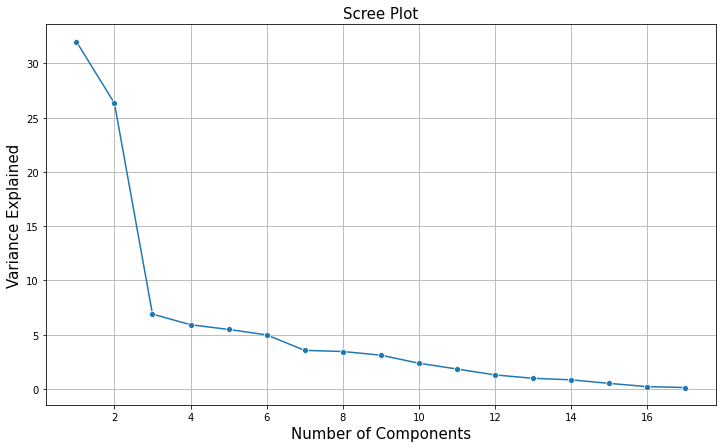

In [432]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

#### 2.9. Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

'Names', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'
       

In [433]:
# tot = sum(eig_vals)
# var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
# cum_var_exp = np.cumsum(var_exp)
# print("Cumulative Variance Explained", cum_var_exp)

####  Cumulative Variance Explained 
PC0 -- 32.0206282   
PC1 -- 58.36084263  
PC2 -- 65.26175919  
PC3 -- 71.18474841  
PC4 -- 76.67315352
PC5 -- 81.65785448  
PC6 -- 85.21672597  
PC7 -- 88.67034731  
### PC8 -- 91.78758099  
PC9 -- 94.16277251
PC10 -- 96.00419883  
PC11 -- 97.30024023  
PC12 -- 98.28599436  
PC13 -- 99.13183669  
PC14 -- 99.64896227
PC15 -- 99.86471628 
PC16 -- 100.


In [434]:
df_pca_loading.T

0     1     2     3     4     5     6     7     8
Apps         0.25  0.33 -0.06  0.28  0.01 -0.02 -0.04 -0.10 -0.09
Accept       0.21  0.37 -0.10  0.27  0.06  0.01 -0.01 -0.06 -0.18
Enroll       0.18  0.40 -0.08  0.16 -0.06 -0.04 -0.03  0.06 -0.13
Top10perc    0.35 -0.08  0.04 -0.05 -0.40 -0.05 -0.16 -0.12  0.34
Top25perc    0.34 -0.04 -0.02 -0.11 -0.43  0.03 -0.12 -0.10  0.40
F.Undergrad  0.15  0.42 -0.06  0.10 -0.04 -0.04 -0.03  0.08 -0.06
P.Undergrad  0.03  0.32  0.14 -0.16  0.30 -0.19  0.06  0.57  0.56
Outstate     0.29 -0.25  0.05  0.13  0.22 -0.03  0.11  0.01 -0.00
Room.Board   0.25 -0.14  0.15  0.18  0.56  0.16  0.21 -0.22  0.28
Books        0.06  0.06  0.68  0.09 -0.13  0.64 -0.15  0.21 -0.13
Personal    -0.04  0.22  0.50 -0.23 -0.22 -0.33  0.63 -0.23 -0.09
PhD          0.32  0.06 -0.13 -0.53  0.14  0.09 -0.00 -0.08 -0.19
Terminal     0.32  0.05 -0.07 -0.52  0.20  0.15 -0.03 -0.01 -0.25
S.F.Ratio   -0.18  0.25 -0.29 -0.16 -0.08  0.49  0.22 -0.08  0.27
perc.alumni  0.21 -0.25 -0.15  0.02 -0.22 -0.05  0.24  0.68 -0.26
Expend       0.32 -0.13  0.23  0.08  0.08 -0.30 -0.23 -0.05 -0.05
Grad.Rate    0.25 -0.17 -0.21  0.27 -0.11  0.22  0.56 -0.01  0.04

Weightage Range Covered through the selection is -0.53 and .68 for all the 17 variables
92% of Cumulative Variance Explained  within the 10 out of 17 PCs that we can take ahead.
None of the components selected have less than 1 variance explained

Following variables have the most weightage within each of the selected components, their business significance is as follows- 

Top10perc - Reflects on the Quality of Intake
F.Undergrad	- Number of Positions in Fulltime UG
Books	- Cost of Books
Apps	- Number of Applications received is critical  parameter to evaluate the College/ University
Room.Board	- cost of Room / Board
S.F.Ratio	- An important parameter that Applicant check before applying
Personal    - An important parameter that Applicant consider before applying
perc.alumni	- This reflects on the past performance of the College/ University and it helps reduce cost of operation and thus to the students,  An important parameter that Applicant consider before applying
P.Undergrad	- Number of Positions in parttime UG